In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
raw_data = pd.read_csv("Cars_Datasets.csv",sep=";")
raw_data.head()


Marque      Modèle  Année-Modèle        Kilométrage Type de carburant  \
0        Fiat       Punto          2007  200 000 - 249 999            Diesel   
1       Dacia  Dokker Van          2013  400 000 - 449 999            Diesel   
2       Dacia      Dokker          2014  160 000 - 169 999            Diesel   
3  Volkswagen     Touareg          2005          0 - 4 999            Diesel   
4      Toyota       Prado          2007  200 000 - 249 999            Diesel   

   Puissance fiscale Boite de vitesses Première main       État   Prix  
0                  5          Manuelle           Non   Très bon  60000  
1                  6          Manuelle           Non  Excellent  70000  
2                  6          Manuelle           NaN   Très bon  90000  
3                 10       Automatique           Oui  Excellent  90000  
4                 12          Manuelle           Non  Excellent  97000

In [3]:
raw_data.columns

Index(['Marque', 'Modèle', 'Année-Modèle', 'Kilométrage', 'Type de carburant',
       'Puissance fiscale', 'Boite de vitesses', 'Première main', 'État',
       'Prix'],
      dtype='object')

In [5]:
raw_data.isna().sum()

Marque                  0
Modèle                  0
Année-Modèle            0
Kilométrage             0
Type de carburant       0
Puissance fiscale       0
Boite de vitesses       0
Première main        6209
État                 6678
Prix                    0
dtype: int64

In [3]:
target=raw_data['Prix']
target.describe()
target.dtype


dtype('int64')

In [4]:
df_without_target = raw_data.iloc[:,:-1]
df_without_target


Marque      Modèle  Année-Modèle        Kilométrage  \
0            Fiat       Punto          2007  200 000 - 249 999   
1           Dacia  Dokker Van          2013  400 000 - 449 999   
2           Dacia      Dokker          2014  160 000 - 169 999   
3      Volkswagen     Touareg          2005          0 - 4 999   
4          Toyota       Prado          2007  200 000 - 249 999   
...           ...         ...           ...                ...   
24771        mini      cabrio          2011    70 000 - 74 999   
24772        mini      cooper          2007  190 000 - 199 999   
24773        mini         one          2006    10 000 - 14 999   
24774        mini      cooper          2010  140 000 - 149 999   
24775        mini      cooper          2008  180 000 - 189 999   

      Type de carburant  Puissance fiscale Boite de vitesses Première main  \
0                Diesel                  5          Manuelle           Non   
1                Diesel                  6          Manuelle           Non   
2                Diesel                  6          Manuelle           NaN   
3                Diesel                 10       Automatique           Oui   
4                Diesel                 12          Manuelle           Non   
...                 ...                ...               ...           ...   
24771           Essence                  9          Manuelle           Oui   
24772           Essence                  9          Manuelle           Non   
24773           Essence                  8          Manuelle           Non   
24774           Essence                  9       Automatique           NaN   
24775           Essence                  9          Manuelle           Non   

            État  
0       Très bon  
1      Excellent  
2       Très bon  
3      Excellent  
4      Excellent  
...          ...  
24771  Excellent  
24772   Très bon  
24773        NaN  
24774   Très bon  
24775   Très bon  

[24776 rows x 9 columns]

In [8]:
categories_cols =[]
numericals_cols =[]
for col in df_without_target.columns:
    if df_without_target[col].dtype =='object':
        categories_cols.append(col)
    else :
        numericals_cols.append(col)

categories_cols


['Marque',
 'Modèle',
 'Kilométrage',
 'Type de carburant',
 'Boite de vitesses',
 'Première main',
 'État']

In [8]:
raw_data.isna().sum()/raw_data.shape[0]

Marque               0.000000
Modèle               0.000000
Année-Modèle         0.000000
Kilométrage          0.000000
Type de carburant    0.000000
Puissance fiscale    0.000000
Boite de vitesses    0.000000
Première main        0.250605
État                 0.269535
Prix                 0.000000
dtype: float64

In [9]:
df_without_target.isna().sum()/df_without_target.shape[0]

Marque               0.000000
Modèle               0.000000
Année-Modèle         0.000000
Kilométrage          0.000000
Type de carburant    0.000000
Puissance fiscale    0.000000
Boite de vitesses    0.000000
Première main        0.250605
État                 0.269535
dtype: float64

In [10]:
#The mising data. 
df_without_target.isnull().sum()/df_without_target.shape[0]

Marque               0.000000
Modèle               0.000000
Année-Modèle         0.000000
Kilométrage          0.000000
Type de carburant    0.000000
Puissance fiscale    0.000000
Boite de vitesses    0.000000
Première main        0.250605
État                 0.269535
dtype: float64

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Marque             24776 non-null  object
 1   Modèle             24776 non-null  object
 2   Année-Modèle       24776 non-null  int64 
 3   Kilométrage        24776 non-null  object
 4   Type de carburant  24776 non-null  object
 5   Puissance fiscale  24776 non-null  int64 
 6   Boite de vitesses  24776 non-null  object
 7   Première main      18567 non-null  object
 8   État               18098 non-null  object
 9   Prix               24776 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.9+ MB


In [12]:
raw_data.shape

(24776, 10)

In [5]:
# drop  all rows with missing values
#df_without_target.dropna(inplace=True)
#df_without_target.shape

In [6]:
raw_data.columns


Index(['Marque', 'Modèle', 'Année-Modèle', 'Kilométrage', 'Type de carburant',
       'Puissance fiscale', 'Boite de vitesses', 'Première main', 'État',
       'Prix'],
      dtype='object')

In [7]:
df_without_target.columns

Index(['Marque', 'Modèle', 'Année-Modèle', 'Kilométrage', 'Type de carburant',
       'Puissance fiscale', 'Boite de vitesses', 'Première main', 'État'],
      dtype='object')

In [8]:
# display the labels in  categories variables
for col in df_without_target.select_dtypes('object'):
    print(f'{col:-<20}  {df_without_target[col].unique()}')
    

Marque--------------  ['Fiat' 'Dacia' 'Volkswagen' 'Toyota' 'Peugeot' 'Renault' 'Ford'
 'Land Rover' 'Citroen' 'Audi' 'Mercedes-Benz' 'Hyundai' 'Opel' 'Suzuki'
 'Skoda' 'Nissan' 'Alfa Romeo' 'Seat' 'Kia' 'BMW' 'Chevrolet' 'Jeep'
 'mini']
Modèle--------------  ['Punto' 'Dokker Van' 'Dokker' 'Touareg' 'Prado' 'Tiguan' '308' 'Clio'
 '208' 'GOLF 7' 'Kangoo' 'Kuga' 'Range Rover Sport' 'Berlingo' 'Logan Mcv'
 'A3' 'Focus' '301' '220' 'Polo' 'i 30' 'Astra' 'Grand Vitara' 'Fiesta'
 'H-1' 'Talisman' 'GOLF 6' 'Bora' 'Octavia' 'C3' 'Qashqai' 'Classe C'
 '159' 'Partner' 'ix 35' 'Classe CLK' 'A4' 'Ibiza' 'PASSAT CC' 'GOLF 4'
 'C4' '2008' 'Land Cruiser' '500' 'Megane 3' 'Duster' 'Logan' 'VERSO'
 'Megane 4' 'Elantra' 'Sandero' 'GOLF 5' '206+' 'Tepee' 'Scenic' 'Master'
 'Q5' '206' 'Range Rover Evoque' 'RAV 4' 'i 10' 'Hilux' 'Captur' 'Corolla'
 'Sorento' 'Serie 5' 'C-Max' 'Doblo' 'Ka' '508' 'Classe E' 'Symbol' 'X1'
 'Classe A' 'Jetta' '500L' 'Yaris' 'Captiva' 'Carens' 'Mito' 'Laguna'
 'Ranger' 'Classe 

In [9]:
df_without_target['Kilométrage']

0        200 000 - 249 999
1        400 000 - 449 999
2        160 000 - 169 999
3                0 - 4 999
4        200 000 - 249 999
               ...        
24771      70 000 - 74 999
24772    190 000 - 199 999
24773      10 000 - 14 999
24774    140 000 - 149 999
24775    180 000 - 189 999
Name: Kilométrage, Length: 24776, dtype: object

In [10]:
# Splitting the Kilométrage column into min and max columns
df_without_target[['min_kilometrage', 'max_kilometrage']] = df_without_target['Kilométrage'].str.split(' - ', expand=True)

# Remove any non-digit characters (including spaces and commas) and convert to integer
df_without_target['min_kilometrage'] = df_without_target['min_kilometrage'].str.replace(r'[\D]', '', regex=True).astype(int)
df_without_target['max_kilometrage'] = df_without_target['max_kilometrage'].str.replace(r'[\D]', '', regex=True).astype(int)

# Display the DataFrame with new columns
df_without_target



Marque      Modèle  Année-Modèle        Kilométrage  \
0            Fiat       Punto          2007  200 000 - 249 999   
1           Dacia  Dokker Van          2013  400 000 - 449 999   
2           Dacia      Dokker          2014  160 000 - 169 999   
3      Volkswagen     Touareg          2005          0 - 4 999   
4          Toyota       Prado          2007  200 000 - 249 999   
...           ...         ...           ...                ...   
24771        mini      cabrio          2011    70 000 - 74 999   
24772        mini      cooper          2007  190 000 - 199 999   
24773        mini         one          2006    10 000 - 14 999   
24774        mini      cooper          2010  140 000 - 149 999   
24775        mini      cooper          2008  180 000 - 189 999   

      Type de carburant  Puissance fiscale Boite de vitesses Première main  \
0                Diesel                  5          Manuelle           Non   
1                Diesel                  6          Manuelle           Non   
2                Diesel                  6          Manuelle           NaN   
3                Diesel                 10       Automatique           Oui   
4                Diesel                 12          Manuelle           Non   
...                 ...                ...               ...           ...   
24771           Essence                  9          Manuelle           Oui   
24772           Essence                  9          Manuelle           Non   
24773           Essence                  8          Manuelle           Non   
24774           Essence                  9       Automatique           NaN   
24775           Essence                  9          Manuelle           Non   

            État  min_kilometrage  max_kilometrage  
0       Très bon           200000           249999  
1      Excellent           400000           449999  
2       Très bon           160000           169999  
3      Excellent                0             4999  
4      Excellent           200000           249999  
...          ...              ...              ...  
24771  Excellent            70000            74999  
24772   Très bon           190000           199999  
24773        NaN            10000            14999  
24774   Très bon           140000           149999  
24775   Très bon           180000           189999  

[24776 rows x 11 columns]

In [11]:
subset=df_without_target.drop('Kilométrage',axis=1)
subset

Marque      Modèle  Année-Modèle Type de carburant  \
0            Fiat       Punto          2007            Diesel   
1           Dacia  Dokker Van          2013            Diesel   
2           Dacia      Dokker          2014            Diesel   
3      Volkswagen     Touareg          2005            Diesel   
4          Toyota       Prado          2007            Diesel   
...           ...         ...           ...               ...   
24771        mini      cabrio          2011           Essence   
24772        mini      cooper          2007           Essence   
24773        mini         one          2006           Essence   
24774        mini      cooper          2010           Essence   
24775        mini      cooper          2008           Essence   

       Puissance fiscale Boite de vitesses Première main       État  \
0                      5          Manuelle           Non   Très bon   
1                      6          Manuelle           Non  Excellent   
2                      6          Manuelle           NaN   Très bon   
3                     10       Automatique           Oui  Excellent   
4                     12          Manuelle           Non  Excellent   
...                  ...               ...           ...        ...   
24771                  9          Manuelle           Oui  Excellent   
24772                  9          Manuelle           Non   Très bon   
24773                  8          Manuelle           Non        NaN   
24774                  9       Automatique           NaN   Très bon   
24775                  9          Manuelle           Non   Très bon   

       min_kilometrage  max_kilometrage  
0               200000           249999  
1               400000           449999  
2               160000           169999  
3                    0             4999  
4               200000           249999  
...                ...              ...  
24771            70000            74999  
24772           190000           199999  
24773            10000            14999  
24774           140000           149999  
24775           180000           189999  

[24776 rows x 10 columns]

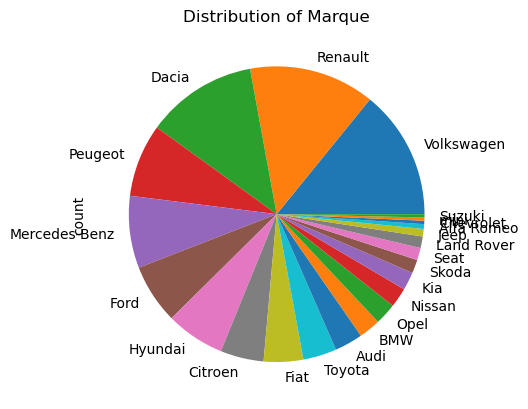

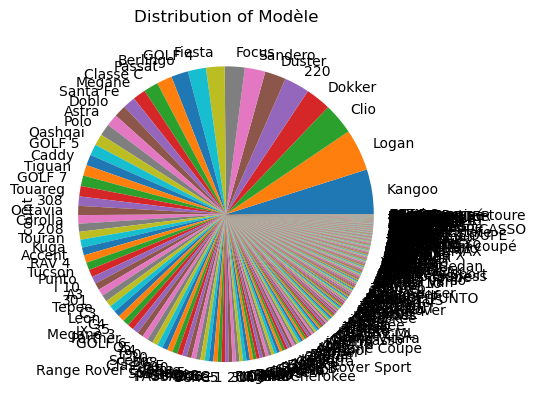

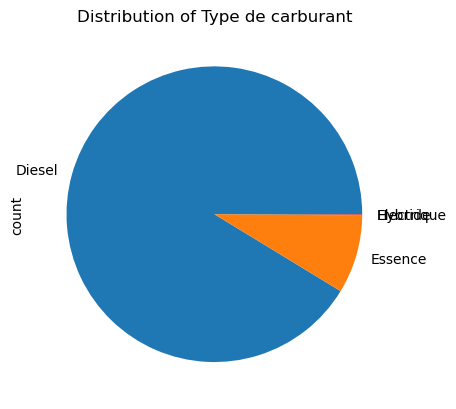

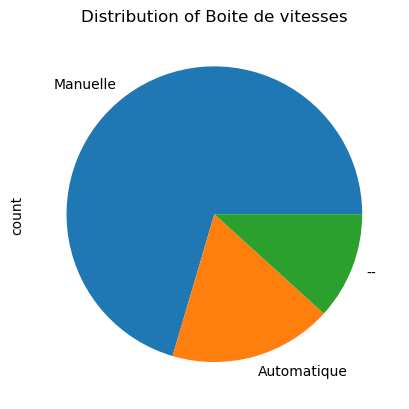

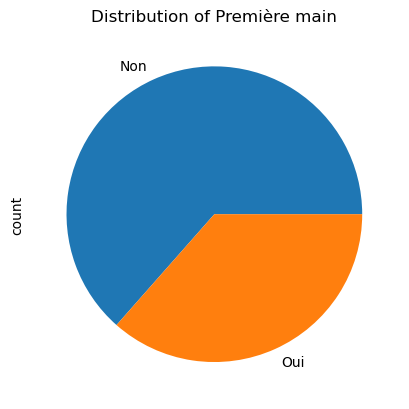

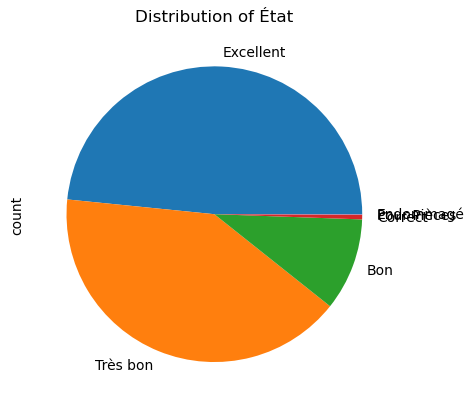

In [12]:
# viz the  categories variables
for col in subset.select_dtypes('object'):
    
    plt.figure()
    subset[col].value_counts().plot.pie()
    plt.title(f'Distribution of {col}')
    plt.show()


In [13]:
subset.describe()

Année-Modèle  Puissance fiscale  min_kilometrage  max_kilometrage
count  24776.000000       24776.000000     24776.000000     24776.000000
mean    2011.844244           7.193938    124918.267678    141152.132063
std        5.462925           1.574124     82334.053998     96141.126720
min     1990.000000           5.000000         0.000000      4999.000000
25%     2008.000000           6.000000     60000.000000     64999.000000
50%     2013.000000           7.000000    120000.000000    129999.000000
75%     2016.000000           8.000000    190000.000000    199999.000000
max     2022.000000          14.000000    450000.000000    499999.000000

* **observations :**  there is outliers in column Puissance fiscale and min_kilometrage and max_kilometrage

<Axes: >

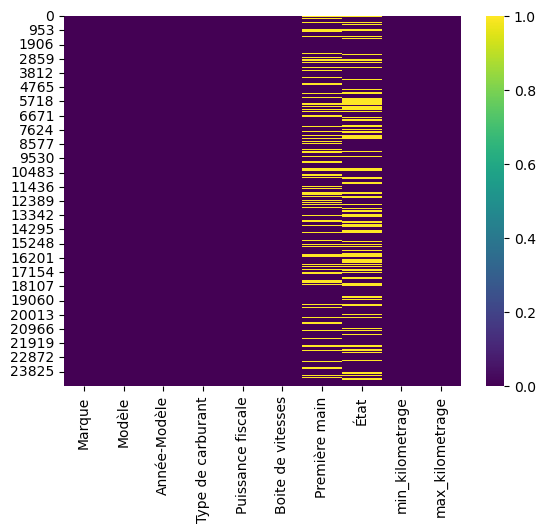

In [14]:
plt.figure()
sns.heatmap(subset.isna(), cmap='viridis')


In [15]:
subset.isna().sum()

Marque                  0
Modèle                  0
Année-Modèle            0
Type de carburant       0
Puissance fiscale       0
Boite de vitesses       0
Première main        6209
État                 6678
min_kilometrage         0
max_kilometrage         0
dtype: int64

In [16]:
target.describe()

count    2.477600e+04
mean     2.169588e+05
std      6.749569e+06
min      6.000000e+04
25%      7.500000e+04
50%      1.000000e+05
75%      1.400000e+05
max      6.120372e+08
Name: Prix, dtype: float64

**observation** : there is outliers in the target

In [17]:
subset.columns

Index(['Marque', 'Modèle', 'Année-Modèle', 'Type de carburant',
       'Puissance fiscale', 'Boite de vitesses', 'Première main', 'État',
       'min_kilometrage', 'max_kilometrage'],
      dtype='object')

In [18]:
subset.head()

Marque      Modèle  Année-Modèle Type de carburant  Puissance fiscale  \
0        Fiat       Punto          2007            Diesel                  5   
1       Dacia  Dokker Van          2013            Diesel                  6   
2       Dacia      Dokker          2014            Diesel                  6   
3  Volkswagen     Touareg          2005            Diesel                 10   
4      Toyota       Prado          2007            Diesel                 12   

  Boite de vitesses Première main       État  min_kilometrage  max_kilometrage  
0          Manuelle           Non   Très bon           200000           249999  
1          Manuelle           Non  Excellent           400000           449999  
2          Manuelle           NaN   Très bon           160000           169999  
3       Automatique           Oui  Excellent                0             4999  
4          Manuelle           Non  Excellent           200000           249999

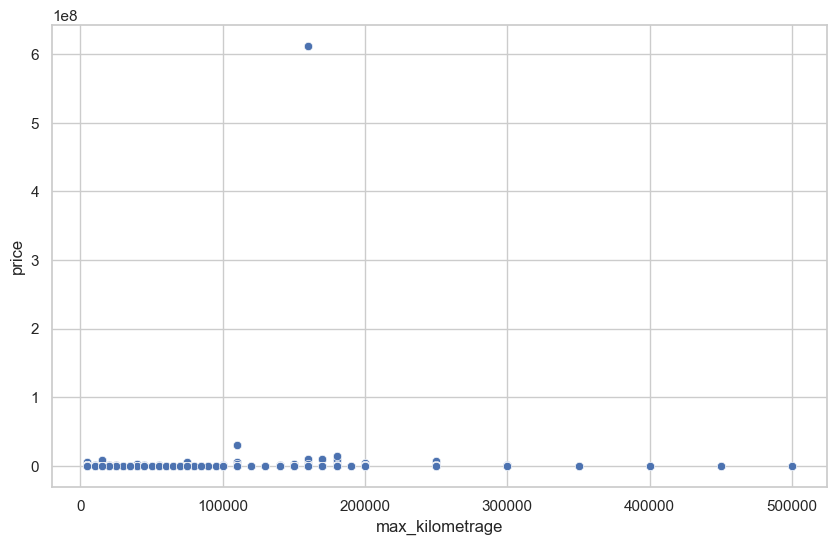

In [19]:
#Scatter Plot: price vs. max_kilometrage
# Set style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset, x='max_kilometrage', y=target)

plt.xlabel('max_kilometrage')
plt.ylabel('price')
plt.show()

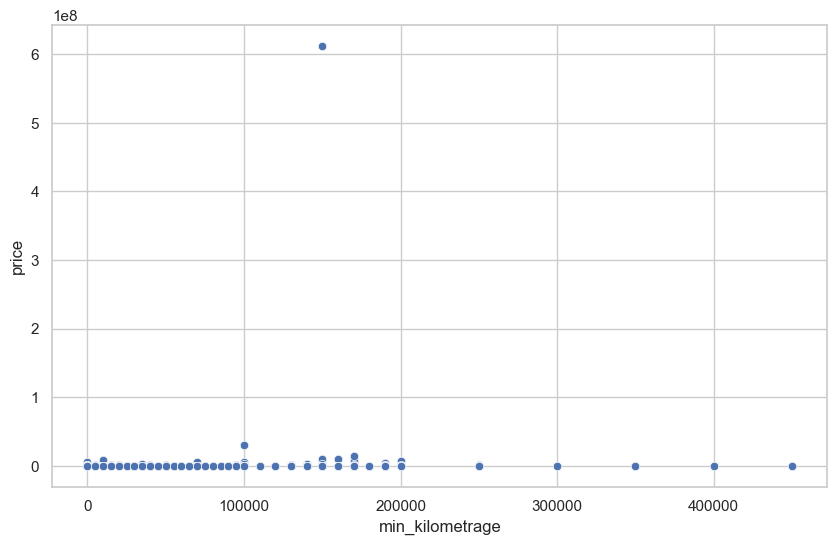

In [20]:
#Scatter Plot: price vs. min_kilometrage
# Set style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset, x='min_kilometrage', y=target)

plt.xlabel('min_kilometrage')
plt.ylabel('price')
plt.show()

In [21]:
subset['Type de carburant'].unique()

array(['Diesel', 'Essence', 'Hybride', 'Electrique'], dtype=object)

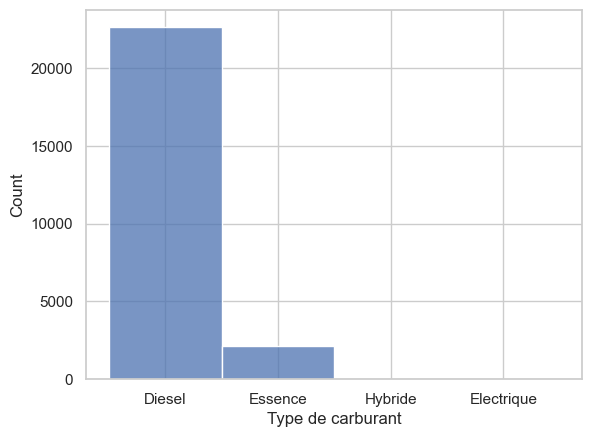

In [22]:
plt.figure()
sns.histplot(data = subset ,x='Type de carburant')

plt.show()

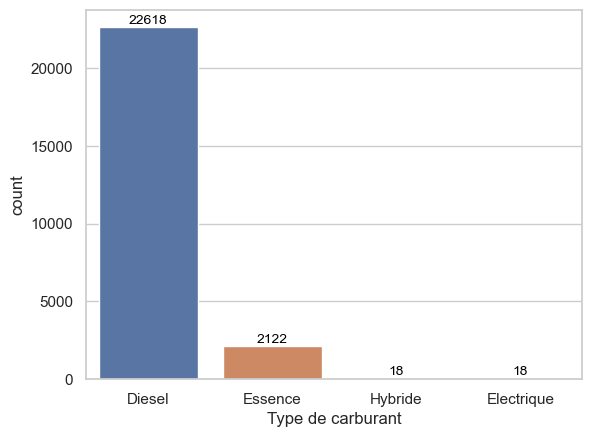

In [23]:

plt.figure()
sns.countplot(data=subset, x='Type de carburant')

# Add frequency labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

 dans avito  les voitures de Disel plus que les autres .
 

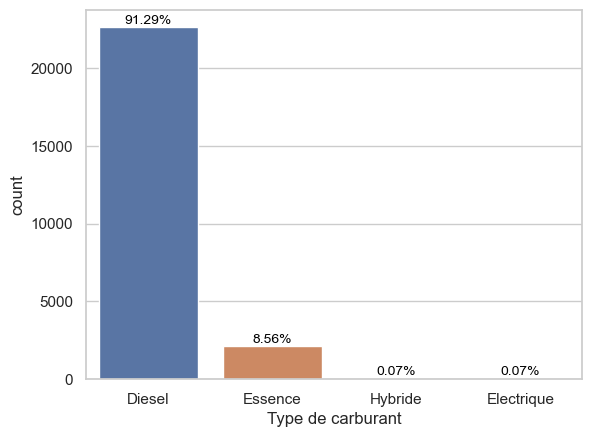

In [24]:
plt.figure()
# Calculate relative frequencies
total_count = len(subset)
counts = subset['Type de carburant'].value_counts()
relative_frequencies = counts / total_count

# Create countplot
sns.countplot(data=subset, x='Type de carburant')

# Add frequency labels to the bars
for i, p in enumerate(plt.gca().patches):
    frequency = relative_frequencies[i]
    plt.gca().annotate(f'{frequency:.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

In [25]:
relative_frequencies

Type de carburant
Diesel        0.912900
Essence       0.085647
Hybride       0.000727
Electrique    0.000727
Name: count, dtype: float64

In [26]:
subset['Type de carburant'].value_counts()

Type de carburant
Diesel        22618
Essence        2122
Hybride          18
Electrique       18
Name: count, dtype: int64

In [27]:
subset['Type de carburant'].describe()

count      24776
unique         4
top       Diesel
freq       22618
Name: Type de carburant, dtype: object

Disel is very famous type de carbunat  maybe the client prefer the diesel maybe this type is very cheap

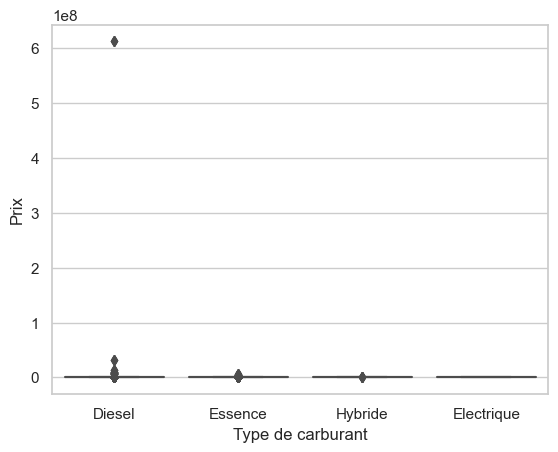

In [28]:
plt.figure()
sns.boxplot(data = subset ,x='Type de carburant',y=target)

plt.show()

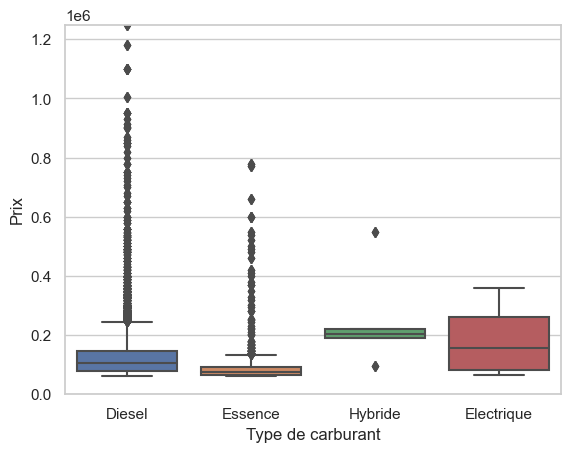

In [29]:
plt.figure()
sns.boxplot(data = subset ,x='Type de carburant',y=target)
plt.ylim(0.0,1.25e6)
plt.show()

price of the type Electrique is expensive on average compared of the other types ,
the outlieres  exists alot in Diesel  and Essence

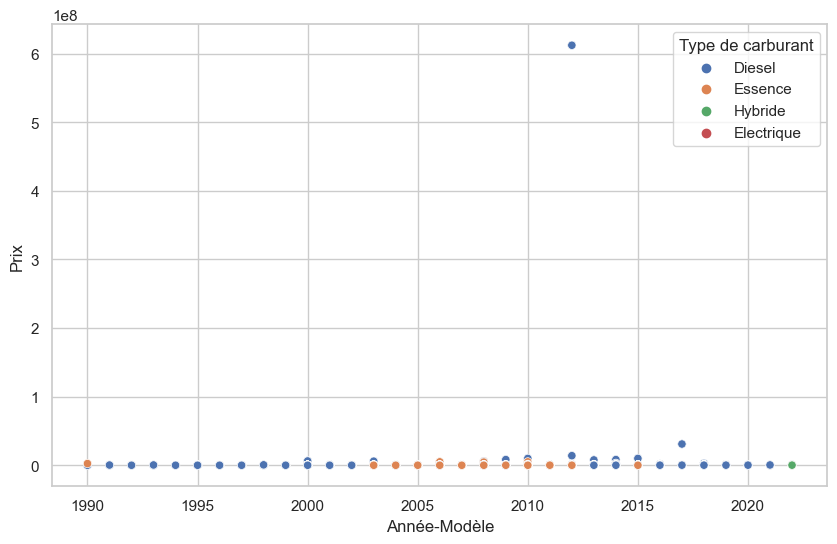

In [30]:
# Set style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data = subset ,x='Année-Modèle',y=target,hue='Type de carburant')

plt.legend(title='Type de carburant')
plt.show()

In [ ]:

'''from matplotlib.patches import Patch

# Define custom color palette
custom_palette = {'Diesel': 'skyblue', 'Essence': 'salmon', 'Hybride': 'limegreen', 'Electrique': 'gold'}

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=raw_data, x=raw_data['Prix'], hue=raw_data['Type de carburant'], palette=custom_palette, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price by Type de carburant')

# Get legend handles and labels
legend_handles = [Patch(facecolor=color, edgecolor='k') for color in custom_palette.values()]
legend_labels = list(custom_palette.keys())

# Add custom labels to the legend
plt.legend(handles=legend_handles, labels=legend_labels)

plt.xlim(0, 0.8e6)
plt.show()'''


C:\Users\Hind\AppData\Local\Temp\ipykernel_12568\165452638.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Prix'])


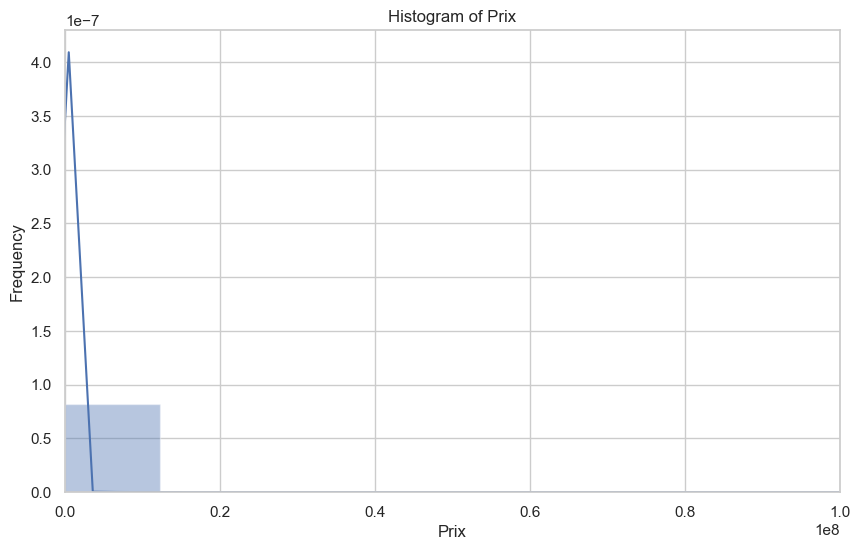

In [32]:
# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.distplot(raw_data['Prix'])
plt.title('Histogram of Prix')
plt.xlabel('Prix')
plt.ylabel('Frequency')
plt.xlim(0, 1e8) 
plt.show()

In [37]:
raw_data['Prix'].min()

60000

In [38]:
raw_data.columns

Index(['Marque', 'Modèle', 'Année-Modèle', 'Kilométrage', 'Type de carburant',
       'Puissance fiscale', 'Boite de vitesses', 'Première main', 'État',
       'Prix'],
      dtype='object')

In [39]:
raw_data.isna().sum()

Marque                  0
Modèle                  0
Année-Modèle            0
Kilométrage             0
Type de carburant       0
Puissance fiscale       0
Boite de vitesses       0
Première main        6209
État                 6678
Prix                    0
dtype: int64

In [40]:
clean_raw_data = raw_data
clean_raw_data

Marque      Modèle  Année-Modèle        Kilométrage  \
0            Fiat       Punto          2007  200 000 - 249 999   
1           Dacia  Dokker Van          2013  400 000 - 449 999   
2           Dacia      Dokker          2014  160 000 - 169 999   
3      Volkswagen     Touareg          2005          0 - 4 999   
4          Toyota       Prado          2007  200 000 - 249 999   
...           ...         ...           ...                ...   
24771        mini      cabrio          2011    70 000 - 74 999   
24772        mini      cooper          2007  190 000 - 199 999   
24773        mini         one          2006    10 000 - 14 999   
24774        mini      cooper          2010  140 000 - 149 999   
24775        mini      cooper          2008  180 000 - 189 999   

      Type de carburant  Puissance fiscale Boite de vitesses Première main  \
0                Diesel                  5          Manuelle           Non   
1                Diesel                  6          Manuelle           Non   
2                Diesel                  6          Manuelle           NaN   
3                Diesel                 10       Automatique           Oui   
4                Diesel                 12          Manuelle           Non   
...                 ...                ...               ...           ...   
24771           Essence                  9          Manuelle           Oui   
24772           Essence                  9          Manuelle           Non   
24773           Essence                  8          Manuelle           Non   
24774           Essence                  9       Automatique           NaN   
24775           Essence                  9          Manuelle           Non   

            État    Prix  
0       Très bon   60000  
1      Excellent   70000  
2       Très bon   90000  
3      Excellent   90000  
4      Excellent   97000  
...          ...     ...  
24771  Excellent  180000  
24772   Très bon   63000  
24773        NaN   60000  
24774   Très bon   85000  
24775   Très bon   84000  

[24776 rows x 10 columns]

In [41]:
clean_raw_data.isna().sum()

Marque                  0
Modèle                  0
Année-Modèle            0
Kilométrage             0
Type de carburant       0
Puissance fiscale       0
Boite de vitesses       0
Première main        6209
État                 6678
Prix                    0
dtype: int64

In [11]:
clean_raw_data['Kilométrage']

0        200 000 - 249 999
1        400 000 - 449 999
2        160 000 - 169 999
3                0 - 4 999
4        200 000 - 249 999
               ...        
24771      70 000 - 74 999
24772    190 000 - 199 999
24773      10 000 - 14 999
24774    140 000 - 149 999
24775    180 000 - 189 999
Name: Kilométrage, Length: 24776, dtype: object

In [42]:
# Splitting the Kilométrage column into min and max columns
clean_raw_data[['min_kilometrage', 'max_kilometrage']] =clean_raw_data['Kilométrage'].str.split(' - ', expand=True)

# Remove any non-digit characters (including spaces and commas) and convert to integer
clean_raw_data['min_kilometrage'] = clean_raw_data['min_kilometrage'].str.replace(r'[\D]', '', regex=True).astype(int)
clean_raw_data['max_kilometrage'] = clean_raw_data['max_kilometrage'].str.replace(r'[\D]', '', regex=True).astype(int)

# Display the DataFrame with new columns
clean_raw_data


Marque      Modèle  Année-Modèle        Kilométrage  \
0            Fiat       Punto          2007  200 000 - 249 999   
1           Dacia  Dokker Van          2013  400 000 - 449 999   
2           Dacia      Dokker          2014  160 000 - 169 999   
3      Volkswagen     Touareg          2005          0 - 4 999   
4          Toyota       Prado          2007  200 000 - 249 999   
...           ...         ...           ...                ...   
24771        mini      cabrio          2011    70 000 - 74 999   
24772        mini      cooper          2007  190 000 - 199 999   
24773        mini         one          2006    10 000 - 14 999   
24774        mini      cooper          2010  140 000 - 149 999   
24775        mini      cooper          2008  180 000 - 189 999   

      Type de carburant  Puissance fiscale Boite de vitesses Première main  \
0                Diesel                  5          Manuelle           Non   
1                Diesel                  6          Manuelle           Non   
2                Diesel                  6          Manuelle           NaN   
3                Diesel                 10       Automatique           Oui   
4                Diesel                 12          Manuelle           Non   
...                 ...                ...               ...           ...   
24771           Essence                  9          Manuelle           Oui   
24772           Essence                  9          Manuelle           Non   
24773           Essence                  8          Manuelle           Non   
24774           Essence                  9       Automatique           NaN   
24775           Essence                  9          Manuelle           Non   

            État    Prix  min_kilometrage  max_kilometrage  
0       Très bon   60000           200000           249999  
1      Excellent   70000           400000           449999  
2       Très bon   90000           160000           169999  
3      Excellent   90000                0             4999  
4      Excellent   97000           200000           249999  
...          ...     ...              ...              ...  
24771  Excellent  180000            70000            74999  
24772   Très bon   63000           190000           199999  
24773        NaN   60000            10000            14999  
24774   Très bon   85000           140000           149999  
24775   Très bon   84000           180000           189999  

[24776 rows x 12 columns]

In [43]:
clean_raw_data= clean_raw_data.drop('Kilométrage',axis=1)


In [44]:
clean_raw_data

Marque      Modèle  Année-Modèle Type de carburant  \
0            Fiat       Punto          2007            Diesel   
1           Dacia  Dokker Van          2013            Diesel   
2           Dacia      Dokker          2014            Diesel   
3      Volkswagen     Touareg          2005            Diesel   
4          Toyota       Prado          2007            Diesel   
...           ...         ...           ...               ...   
24771        mini      cabrio          2011           Essence   
24772        mini      cooper          2007           Essence   
24773        mini         one          2006           Essence   
24774        mini      cooper          2010           Essence   
24775        mini      cooper          2008           Essence   

       Puissance fiscale Boite de vitesses Première main       État    Prix  \
0                      5          Manuelle           Non   Très bon   60000   
1                      6          Manuelle           Non  Excellent   70000   
2                      6          Manuelle           NaN   Très bon   90000   
3                     10       Automatique           Oui  Excellent   90000   
4                     12          Manuelle           Non  Excellent   97000   
...                  ...               ...           ...        ...     ...   
24771                  9          Manuelle           Oui  Excellent  180000   
24772                  9          Manuelle           Non   Très bon   63000   
24773                  8          Manuelle           Non        NaN   60000   
24774                  9       Automatique           NaN   Très bon   85000   
24775                  9          Manuelle           Non   Très bon   84000   

       min_kilometrage  max_kilometrage  
0               200000           249999  
1               400000           449999  
2               160000           169999  
3                    0             4999  
4               200000           249999  
...                ...              ...  
24771            70000            74999  
24772           190000           199999  
24773            10000            14999  
24774           140000           149999  
24775           180000           189999  

[24776 rows x 11 columns]

In [45]:
# Filter data by Type de carburant
Diesel_prix = clean_raw_data[clean_raw_data['Type de carburant'] == 'Diesel']['Prix']
Essence_prix = clean_raw_data[clean_raw_data['Type de carburant'] == 'Essence']['Prix']


Diesel_prix
Essence_prix

14       105000
50        84000
52        67000
65       145000
81        62000
          ...  
24771    180000
24772     63000
24773     60000
24774     85000
24775     84000
Name: Prix, Length: 2122, dtype: int64

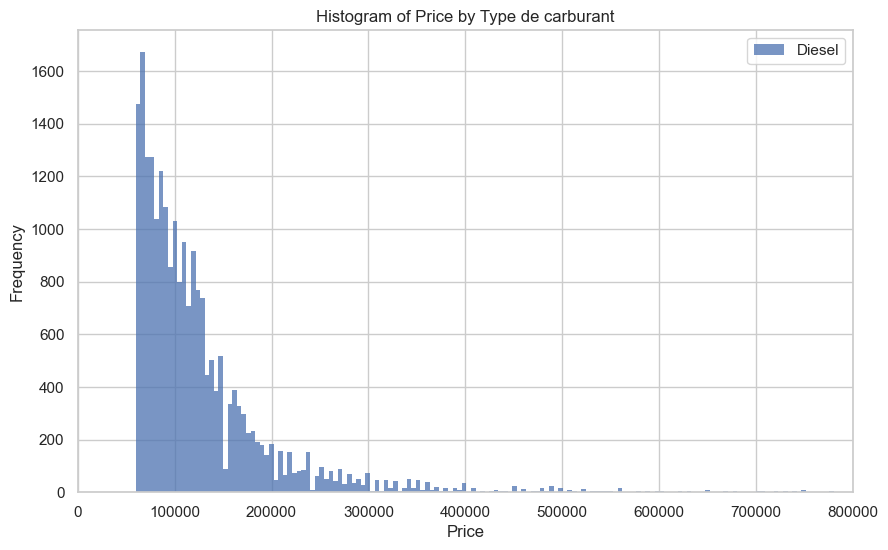

In [46]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=Diesel_prix, label='Diesel')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price by Type de carburant')
# Add custom labels to the legend
plt.legend()
plt.xlim(0, 0.8e6)
plt.show()

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=Essence_prix, label='Essence')
plt.xlabel('Price')
plt.ylabel('Counts')
plt.title('Histogram of Price by Essence')


# Add custom labels to the legend
plt.legend()

plt.xlim(0, 0.8e6)
plt.show()

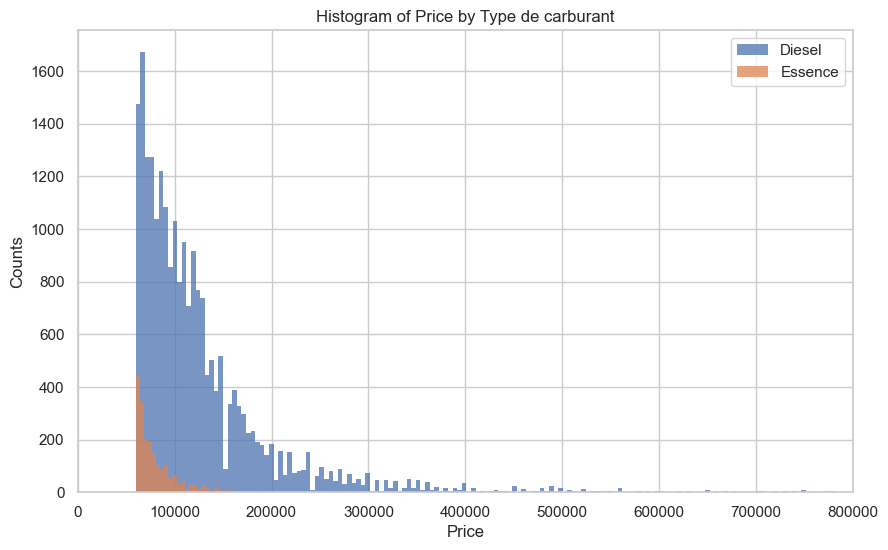

In [47]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=Diesel_prix, label='Diesel')
sns.histplot(data=Essence_prix, label='Essence')

plt.xlabel('Price')
plt.ylabel('Counts')
plt.title('Histogram of Price by Type de carburant')



# Add custom labels to the legend
plt.legend()

plt.xlim(0, 0.8e6)
plt.show()

the prices of Diesel cars is higher than the 'Essence'

In [18]:
# On doit comparer le min et max kilometrage par rapport au type carbounat

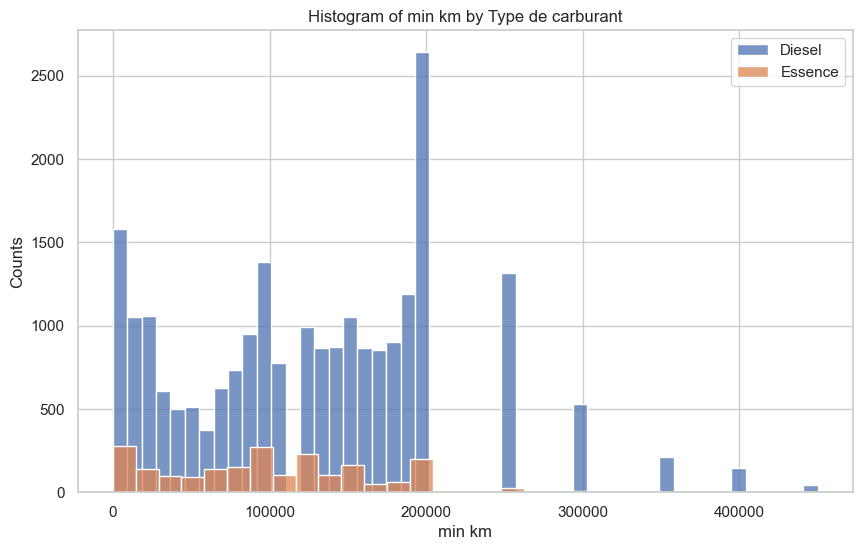

In [48]:
# Filter data by Type de carburant
Diesel_min_km= clean_raw_data[clean_raw_data['Type de carburant'] == 'Diesel']['min_kilometrage']
Essence_min_km = clean_raw_data[clean_raw_data['Type de carburant'] == 'Essence']['min_kilometrage']

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=Diesel_min_km, label='Diesel')
sns.histplot(data=Essence_min_km, label='Essence')

plt.xlabel('min km')
plt.ylabel('Counts')
plt.title('Histogram of min km by Type de carburant')



# Add custom labels to the legend
plt.legend()

#plt.xlim(0, 0.8e6)
plt.show()

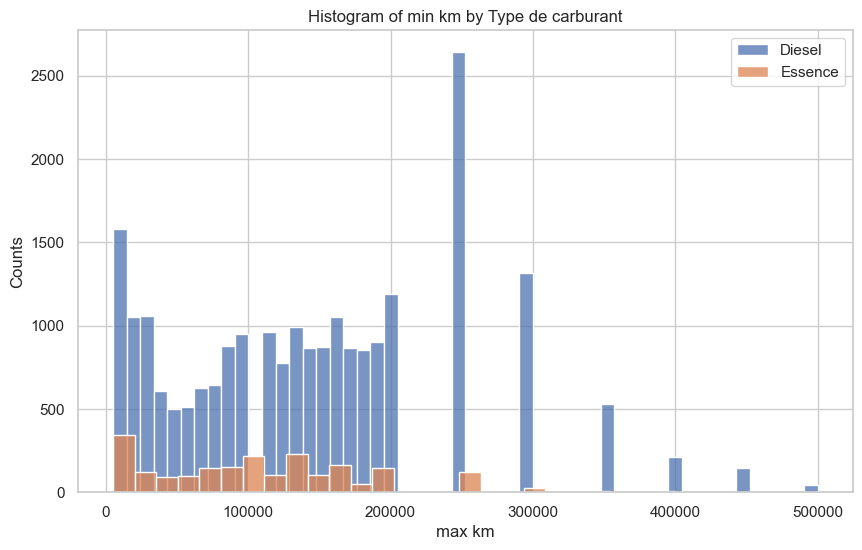

In [49]:
# Filter data by Type de carburant
Diesel_max_km= clean_raw_data[clean_raw_data['Type de carburant'] == 'Diesel']['max_kilometrage']
Essence_max_km = clean_raw_data[clean_raw_data['Type de carburant'] == 'Essence']['max_kilometrage']

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=Diesel_max_km, label='Diesel')
sns.histplot(data=Essence_max_km, label='Essence')

plt.xlabel('max km')
plt.ylabel('Counts')
plt.title('Histogram of min km by Type de carburant')



# Add custom labels to the legend
plt.legend()

#plt.xlim(0, 0.8e6)
plt.show()

Diesel has more max km than Essence

In [24]:
#maybe the min or max km is affected in the price


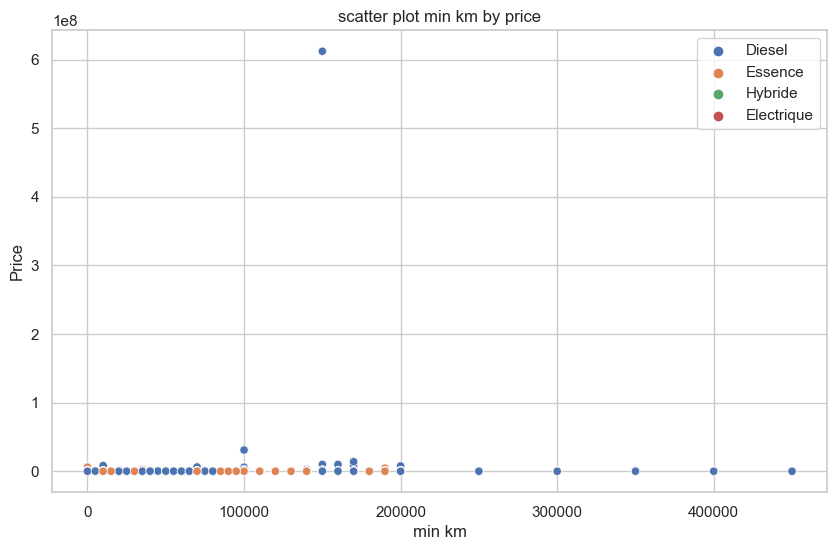

In [57]:

# Plot histogram
plt.figure(figsize=(10, 6))

sns.scatterplot(data=clean_raw_data, x='min_kilometrage',y='Prix',hue='Type de carburant')

plt.xlabel('min km')
plt.ylabel('Price')
plt.title('scatter plot min km by price')



# Add custom labels to the legend
plt.legend()

#plt.xlim(0, 0.8e6)
plt.show()

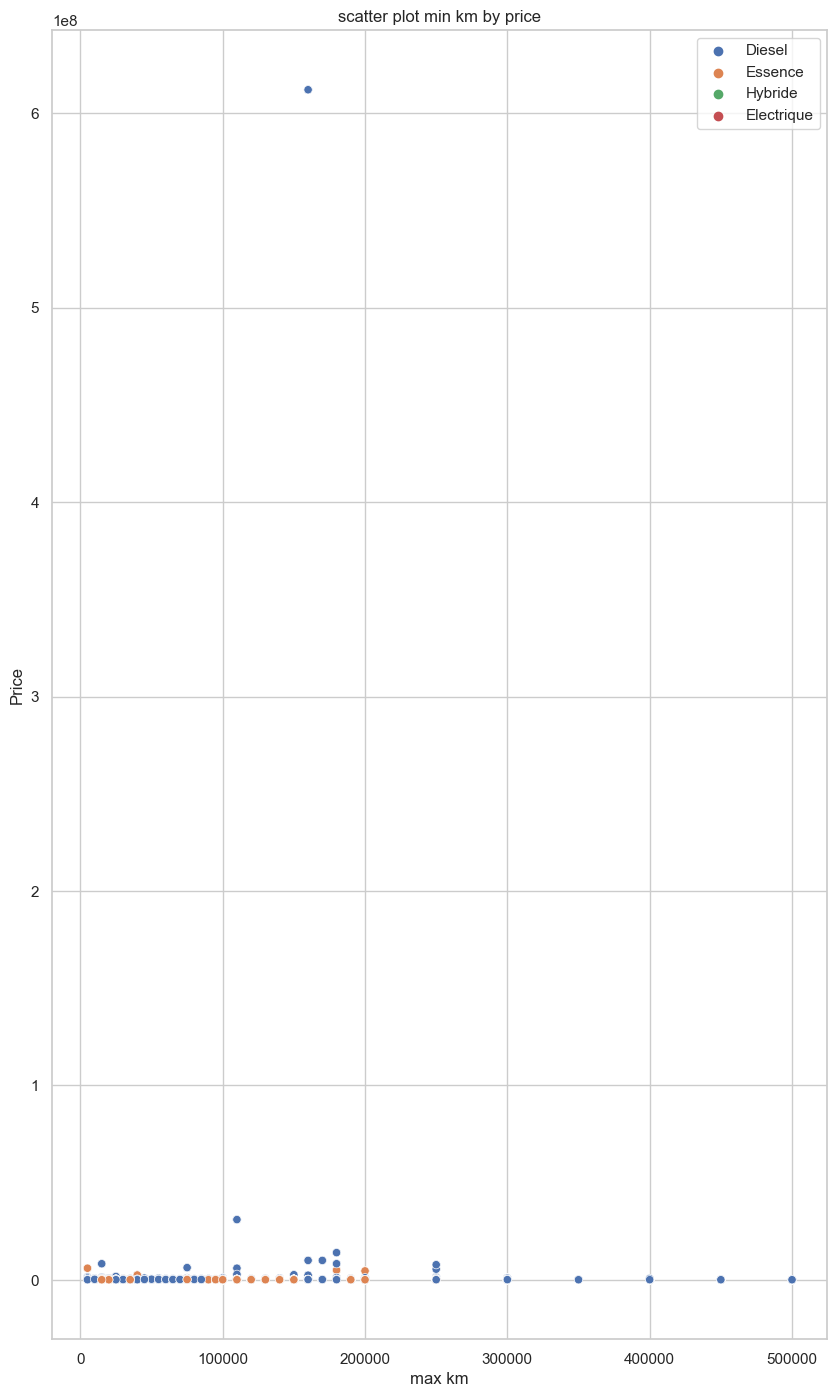

In [56]:
# Plot histogram
plt.figure(figsize=(10, 17))

sns.scatterplot(data=clean_raw_data, x='max_kilometrage',y='Prix',hue='Type de carburant')

plt.xlabel('max km')
plt.ylabel('Price')
plt.title('scatter plot min km by price')



# Add custom labels to the legend
plt.legend()

#plt.xlim(0, 0.8e6)
plt.show()

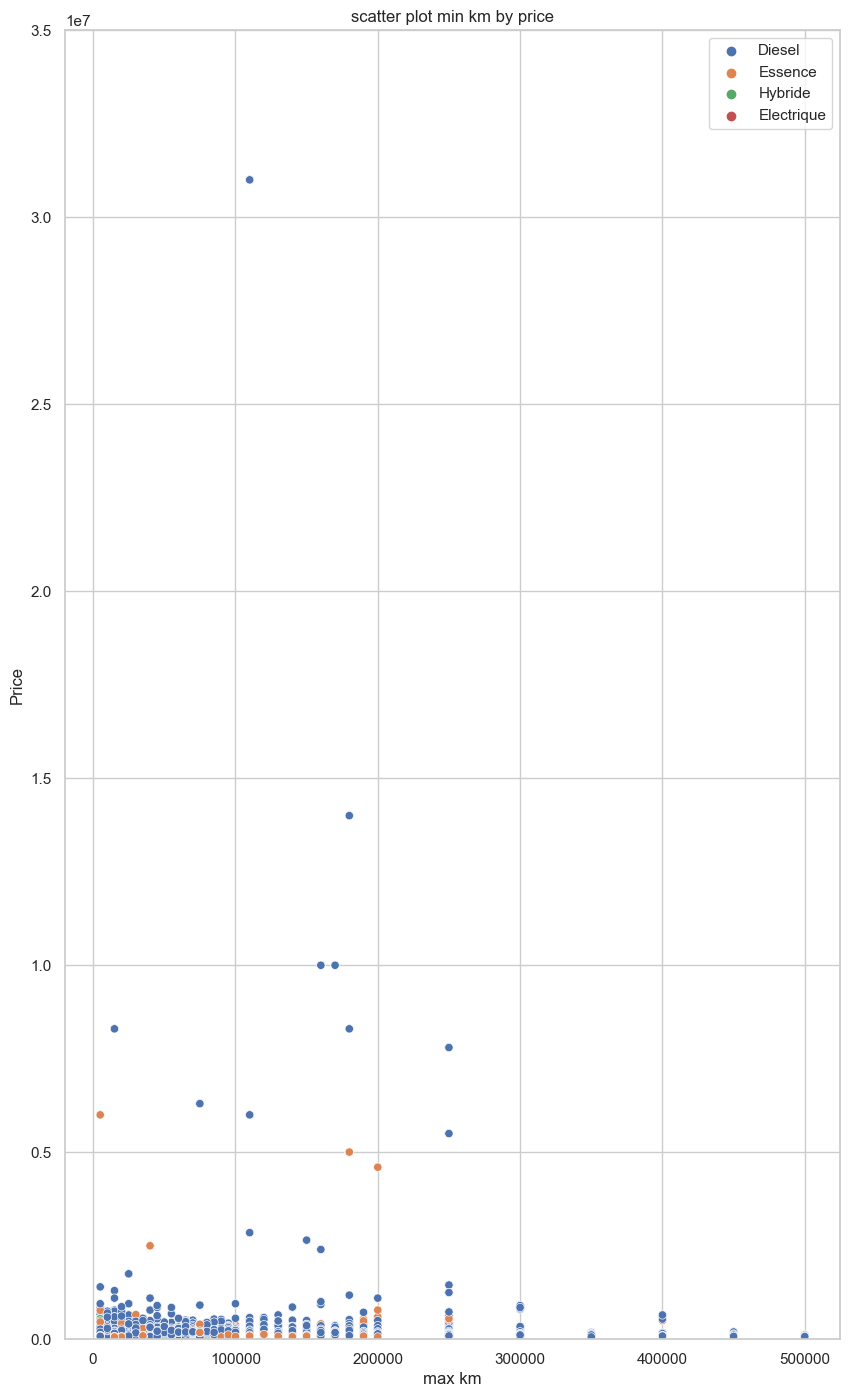

In [55]:
# Plot histogram
plt.figure(figsize=(10, 17))

sns.scatterplot(data=clean_raw_data, x='max_kilometrage',y='Prix',hue='Type de carburant')

plt.xlabel('max km')
plt.ylabel('Price')
plt.title('scatter plot min km by price')



# Add custom labels to the legend
plt.legend()
plt.ylim(-1,0.35e8)
#plt.xlim(0, 0.8e6)
plt.show()

there is a leanaire relation between the price and the max_km

In [54]:
clean_raw_data.columns

Index(['Marque', 'Modèle', 'Année-Modèle', 'Type de carburant',
       'Puissance fiscale', 'Boite de vitesses', 'Première main', 'État',
       'Prix', 'min_kilometrage', 'max_kilometrage'],
      dtype='object')

In [53]:
clean_raw_data['Modèle'].value_counts()

Modèle
Kangoo           1213
Logan            1128
Clio              849
Dokker            687
220               684
                 ... 
AX                  3
Serie 2 coupé       3
C3 Aircross         3
GOLF 3              3
507                 3
Name: count, Length: 369, dtype: int64

In [52]:
clean_raw_data['Marque'].value_counts()

Marque
Volkswagen       3503
Renault          3406
Dacia            3009
Peugeot          1977
Mercedes-Benz    1953
Ford             1617
Hyundai          1593
Citroen          1174
Fiat             1070
Toyota            908
Audi              763
BMW               588
Opel              584
Nissan            532
Kia               491
Skoda             365
Seat              333
Land Rover        312
Jeep              202
Alfa Romeo        130
Chevrolet          91
mini               88
Suzuki             87
Name: count, dtype: int64

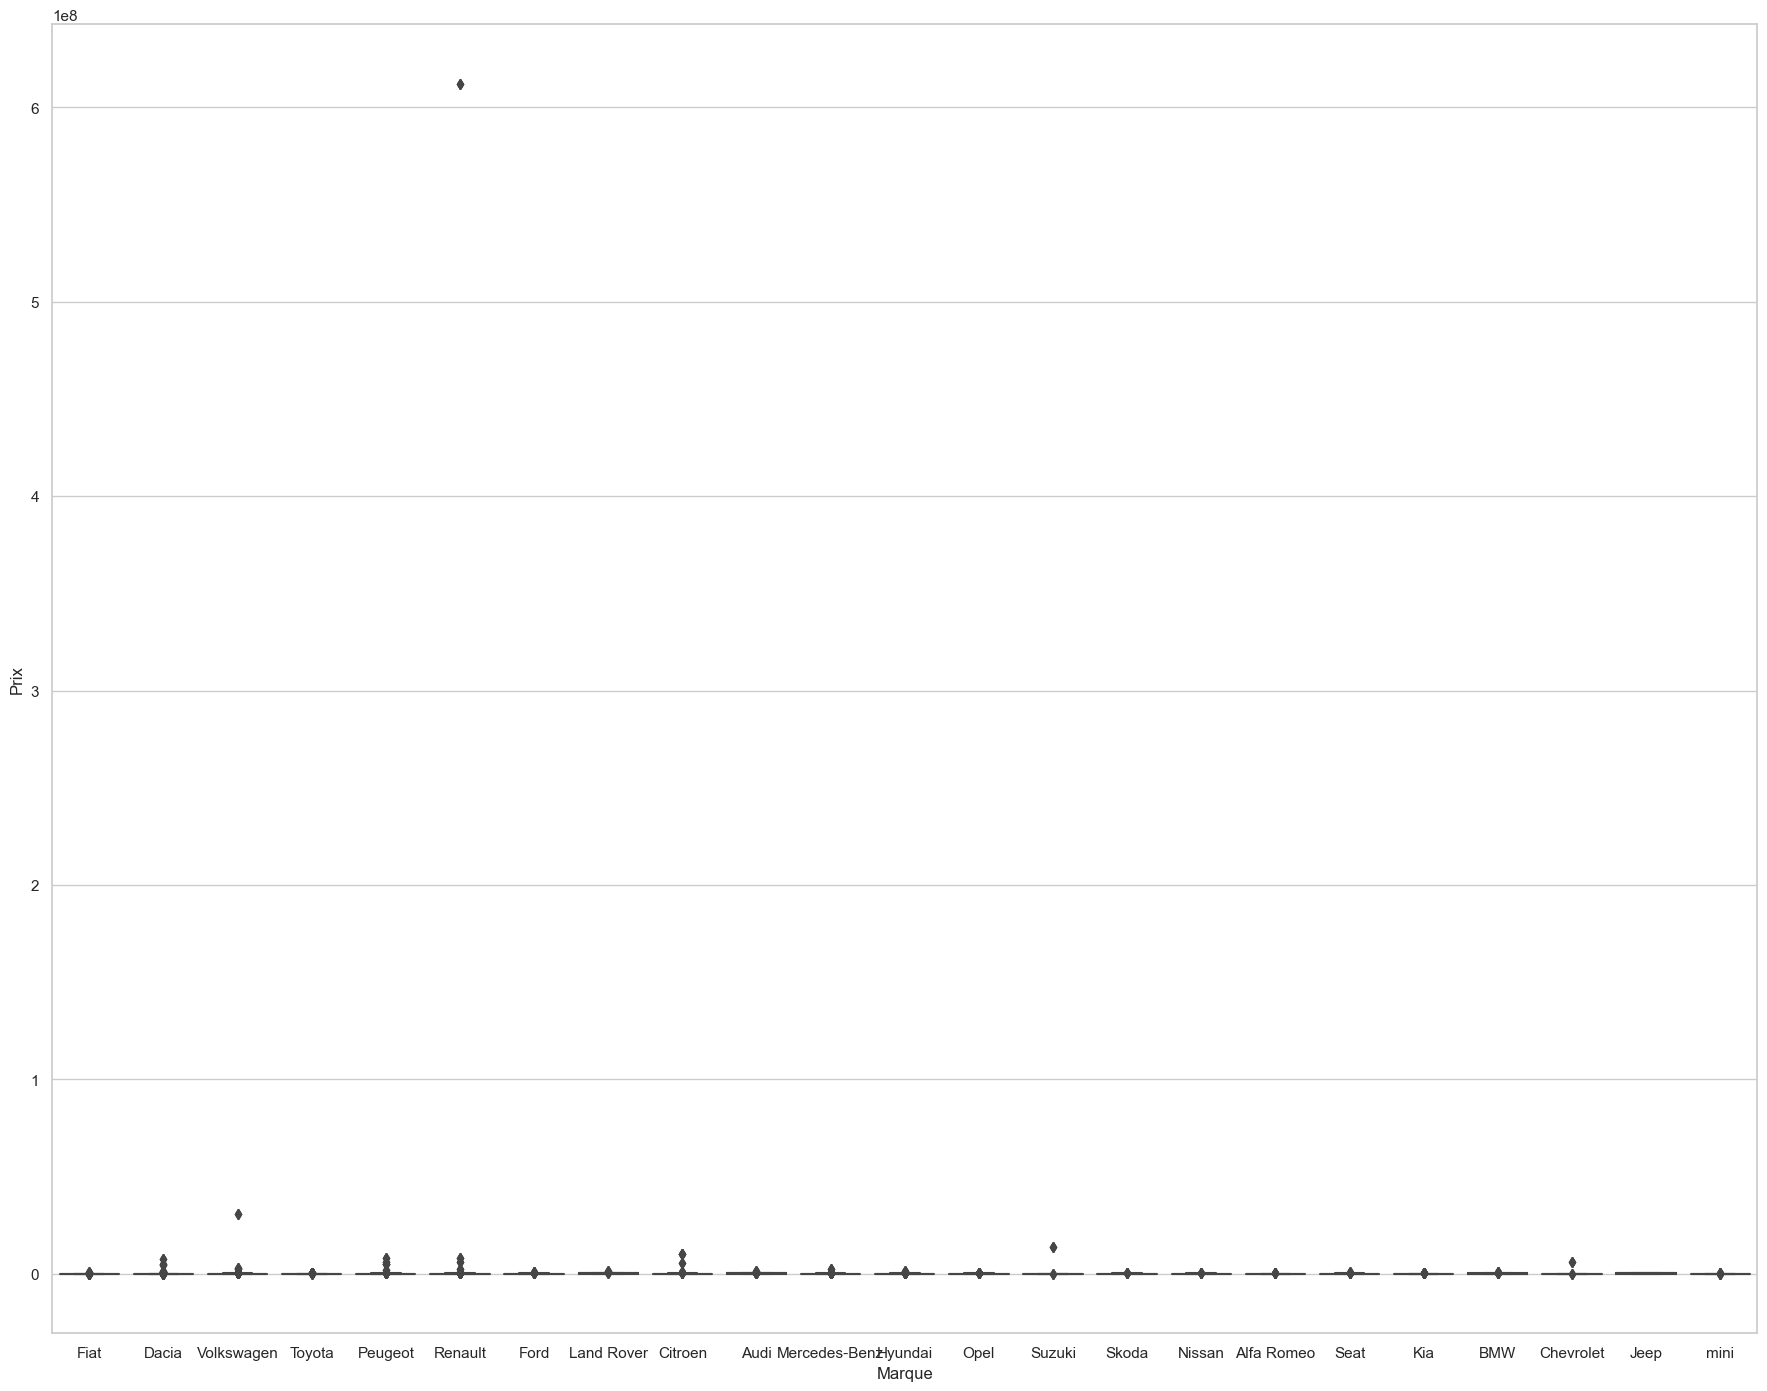

In [61]:
# "price" by "marque"
plt.figure(figsize=(22, 17))
sns.boxplot(data = clean_raw_data ,x='Marque',y='Prix')
#plt.ylim(0.0,1.25e6)
plt.show()

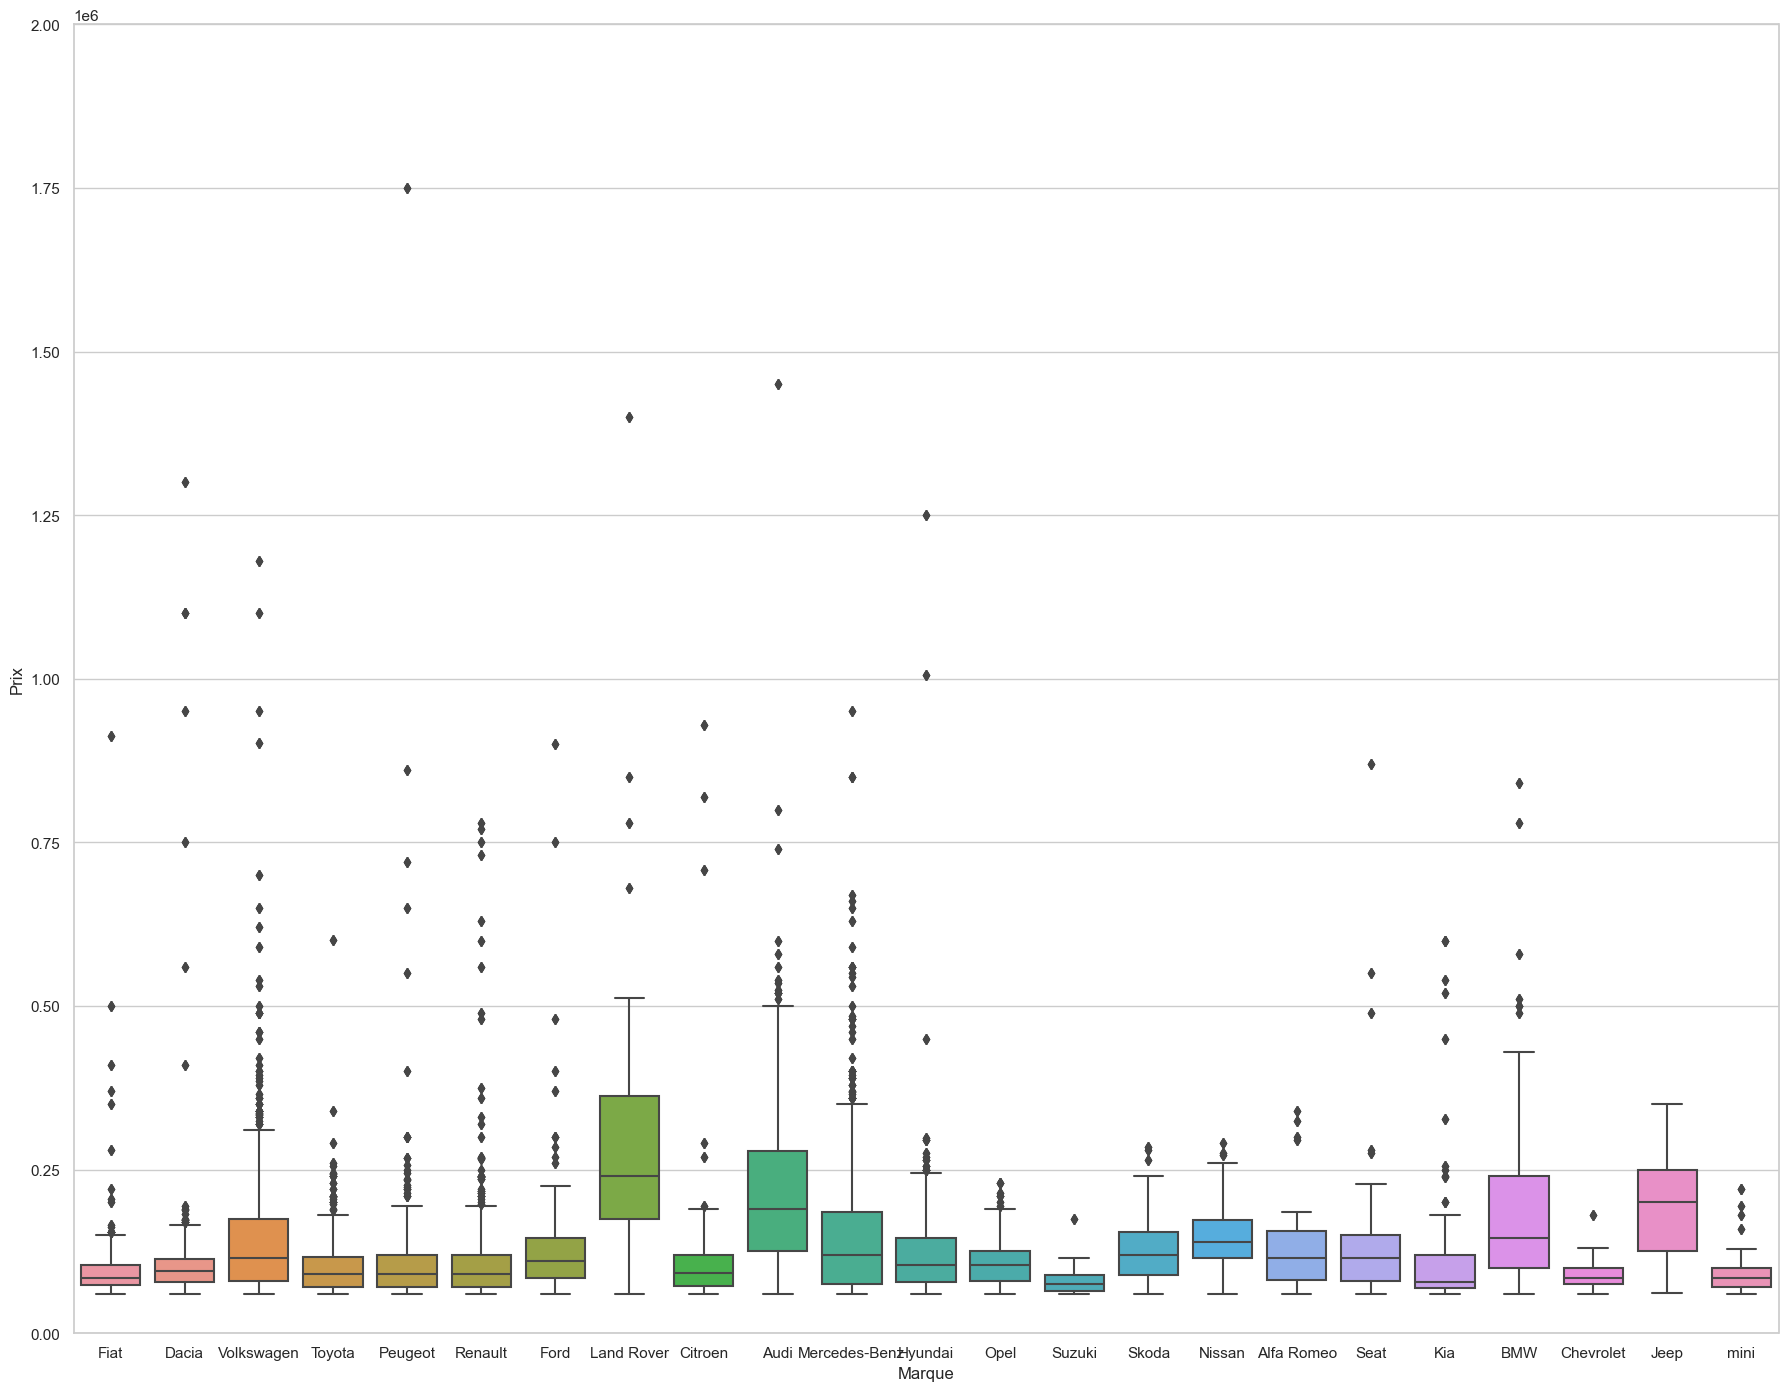

In [65]:
# "price" by "marque"
plt.figure(figsize=(22, 17))
sns.boxplot(data = clean_raw_data ,x='Marque',y='Prix')
plt.ylim(0.0,2e6)
plt.show()

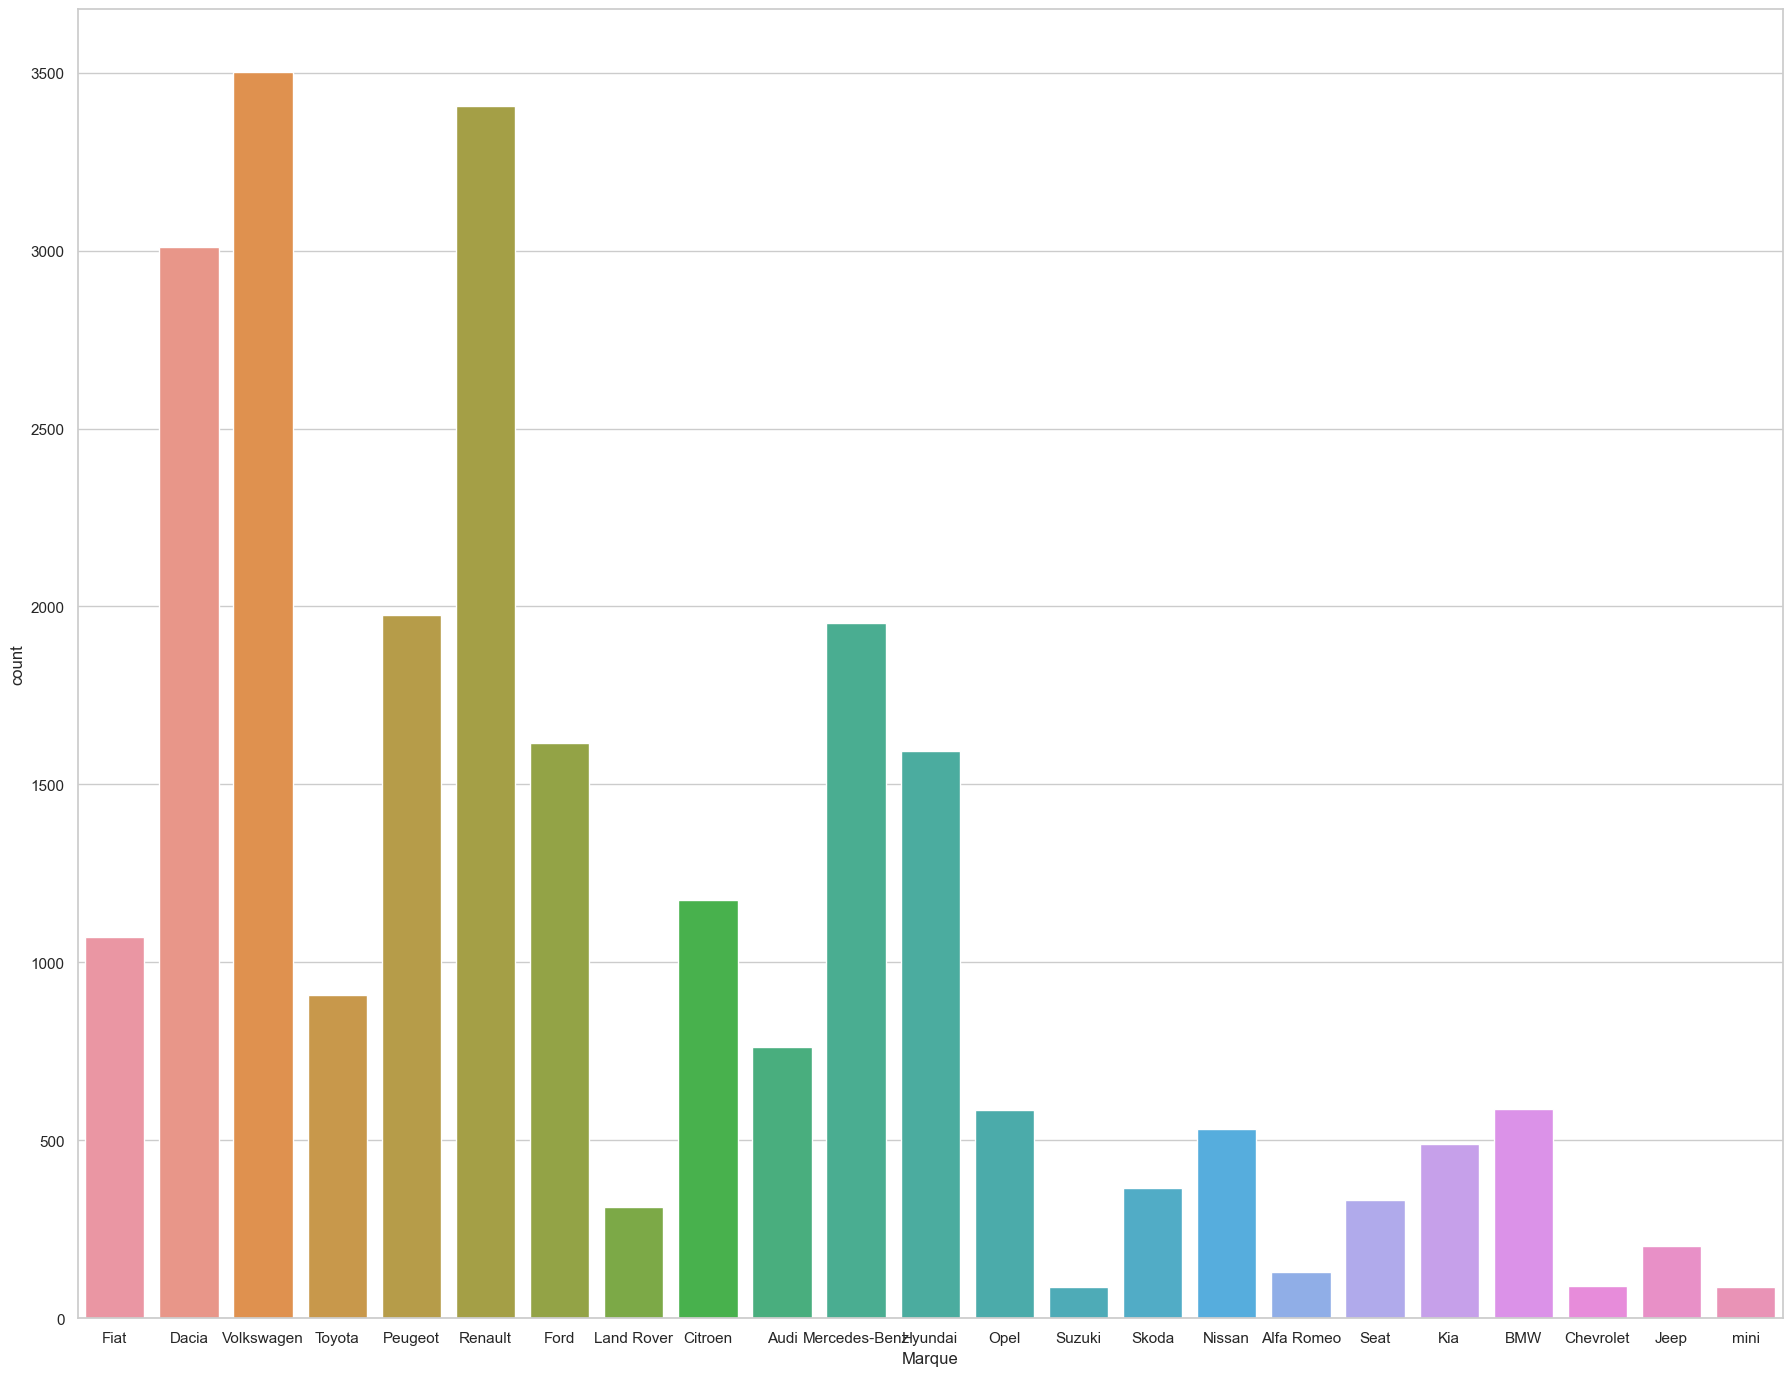

In [187]:
# "marque"
plt.figure(figsize=(22, 17))
sns.countplot(data = clean_raw_data ,x='Marque')

plt.show()

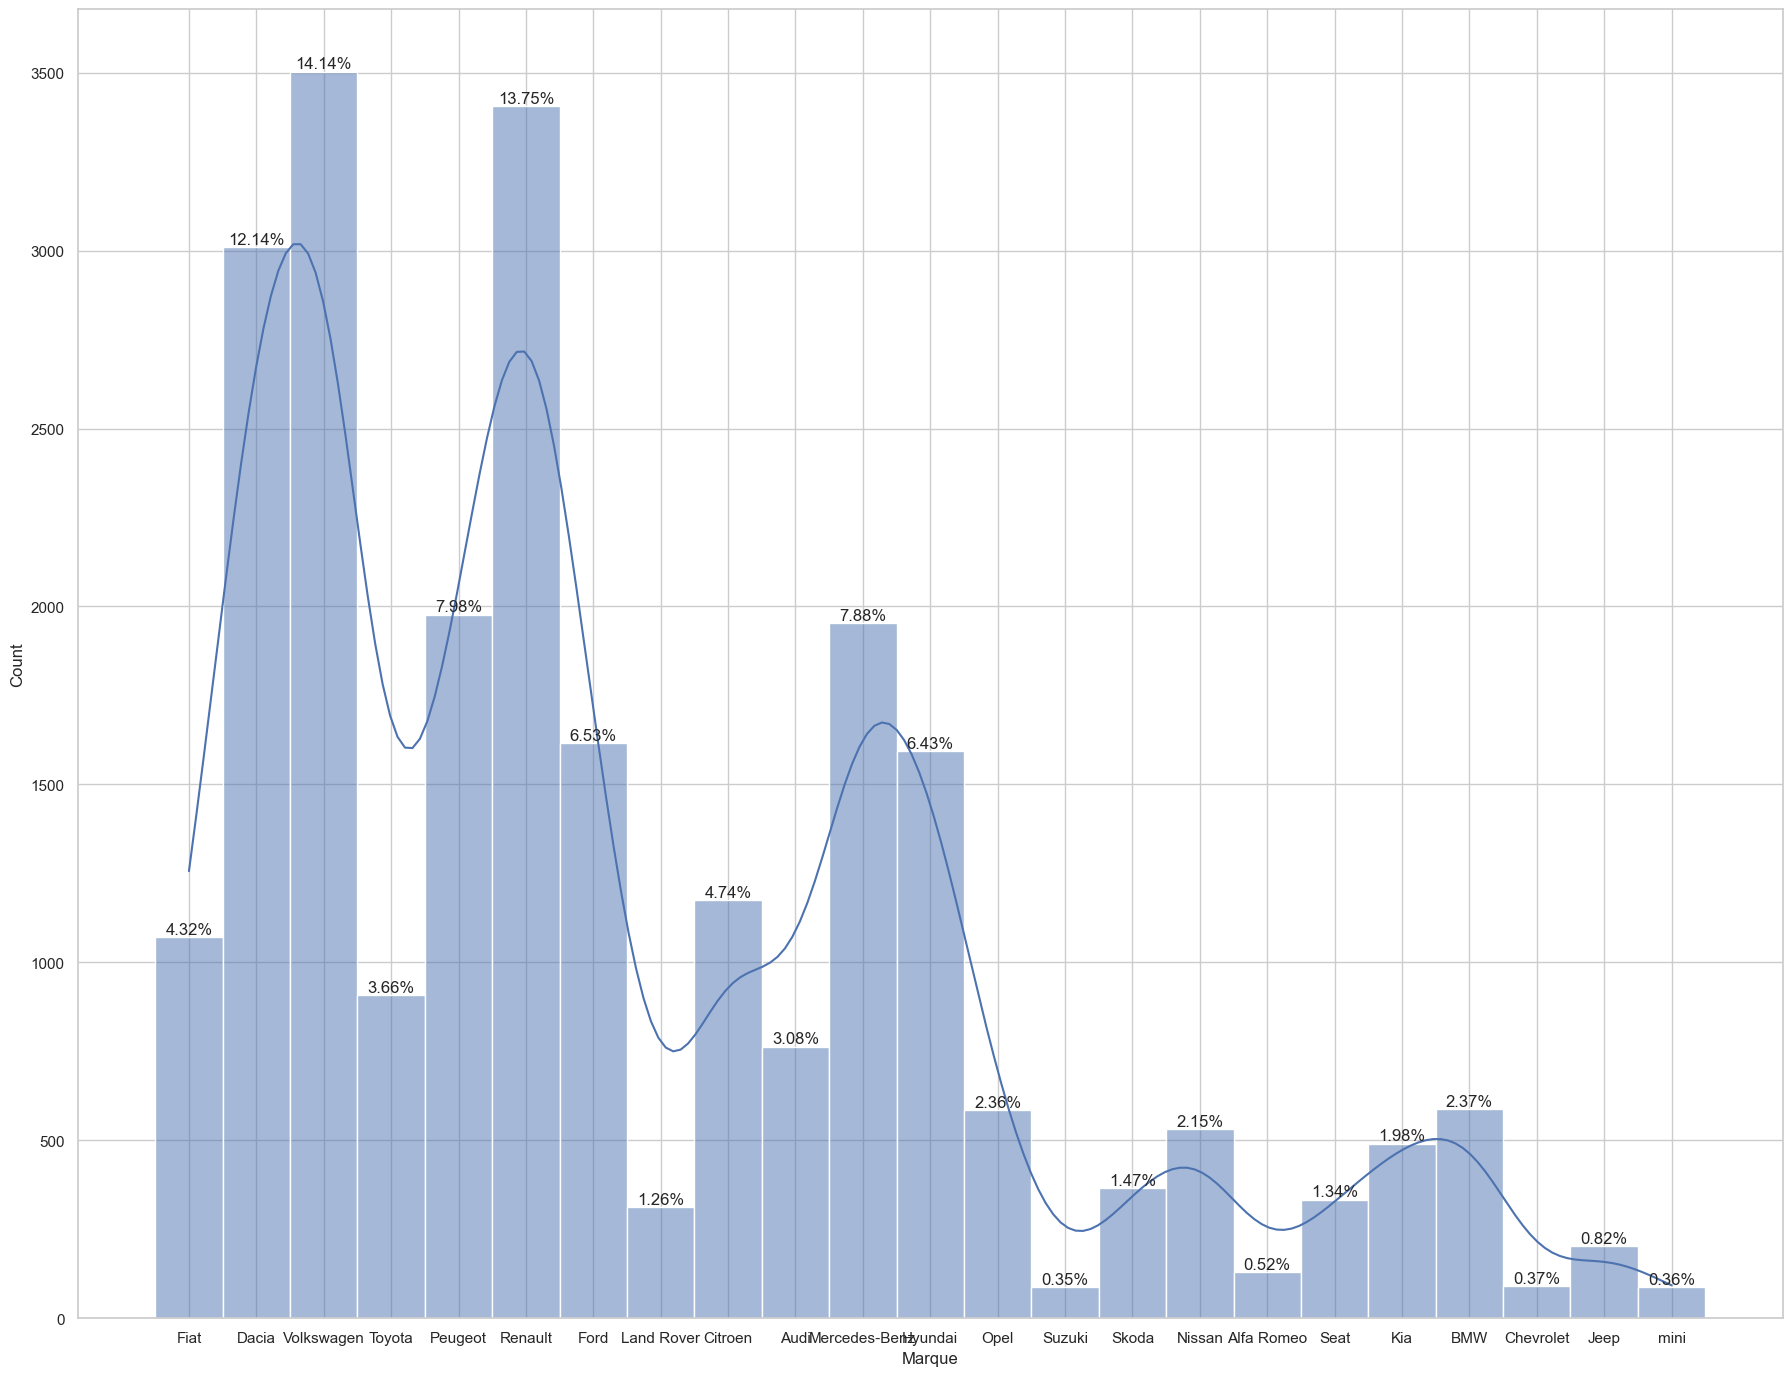

In [191]:
# "marque"
plt.figure(figsize=(22, 17))
histplot=sns.histplot(data = clean_raw_data ,x='Marque',kde='True')
total_samples = len(clean_raw_data)
for rect in histplot.patches:
    height = rect.get_height()
    frequency_percentage = (height / total_samples) * 100
    plt.text(rect.get_x() + rect.get_width() / 2, height, f'{frequency_percentage:.2f}%', ha='center', va='bottom')



plt.show()

- on average the 'land Rover ' is very expensive than the other 'Marque' 
- Toyota and Peugeot and Renault are on average have same price
- there is a lot of cars type Dacia , Volswagen and Renault
- there is a few  Suzuki and mini cars maybe morrocan doesn't prefer them

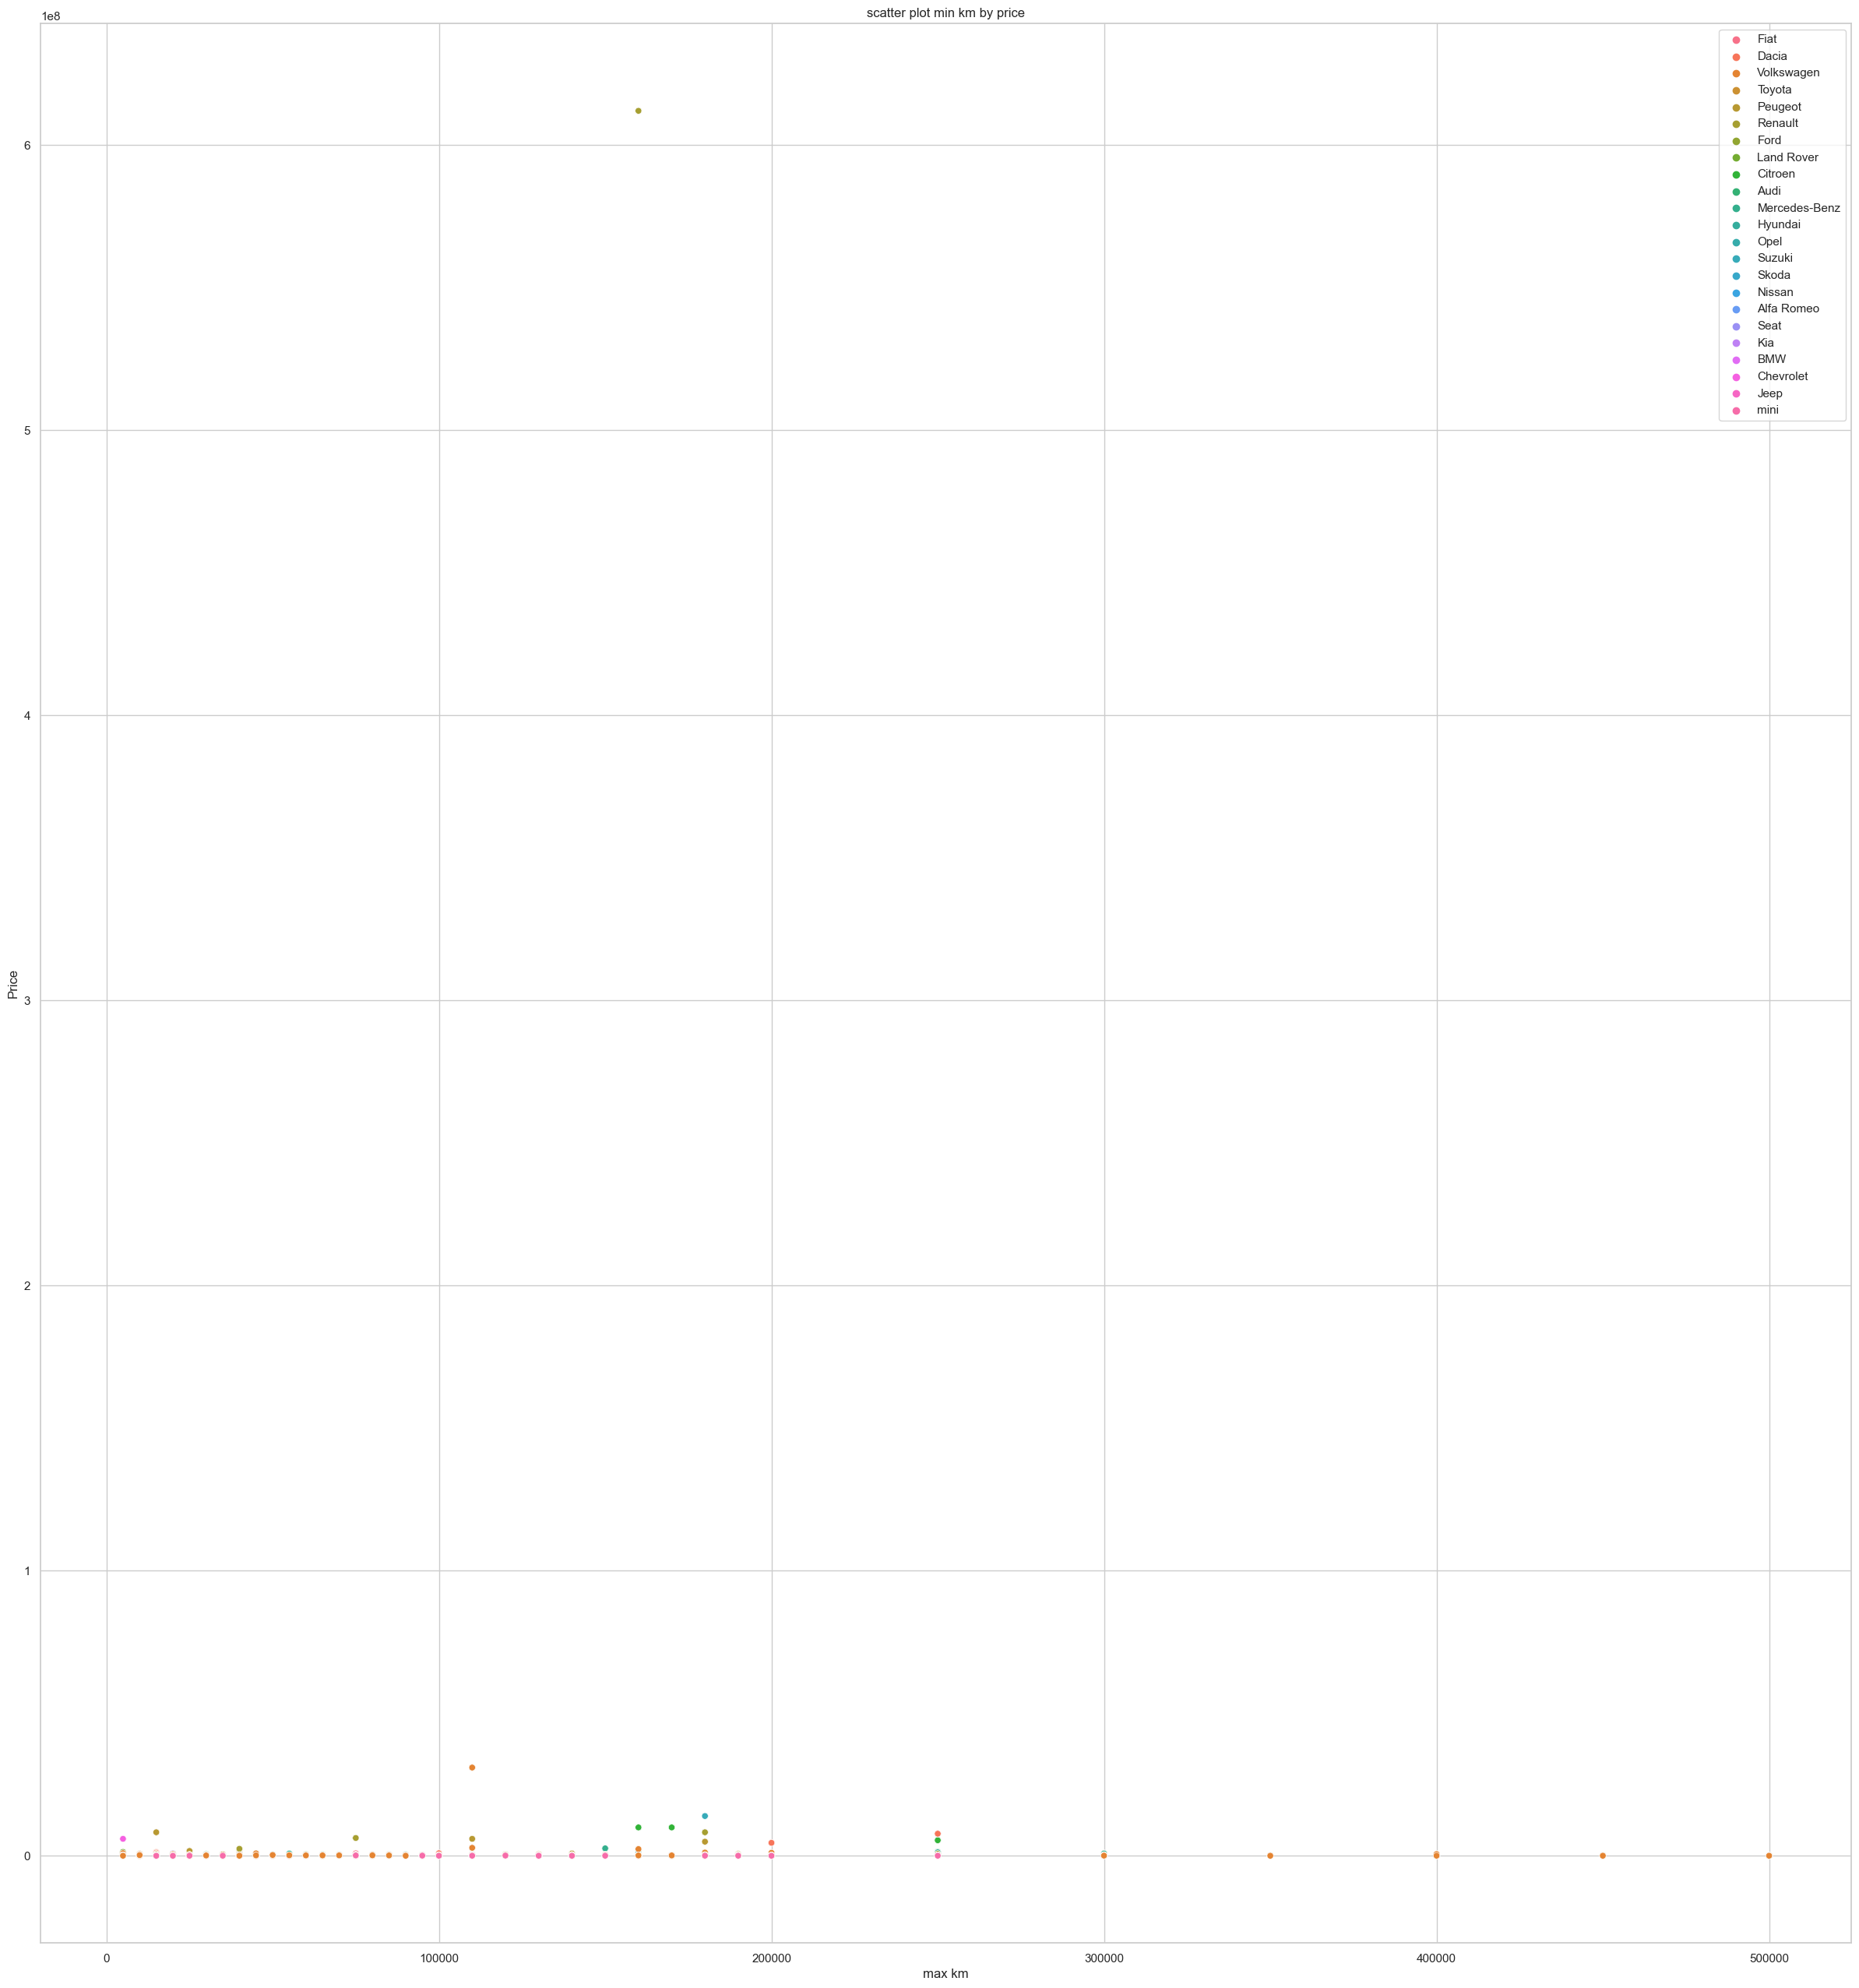

In [71]:
#let's see   max_Km by Prix and  Marque
# Plot histogram
plt.figure(figsize=(30, 32))

sns.scatterplot(data=clean_raw_data, x='max_kilometrage',y='Prix',hue='Marque')

plt.xlabel('max km')
plt.ylabel('Price')
plt.title('scatter plot min km by price')



# Add custom labels to the legend
plt.legend()

#plt.xlim(0, 0.8e6)
plt.show()

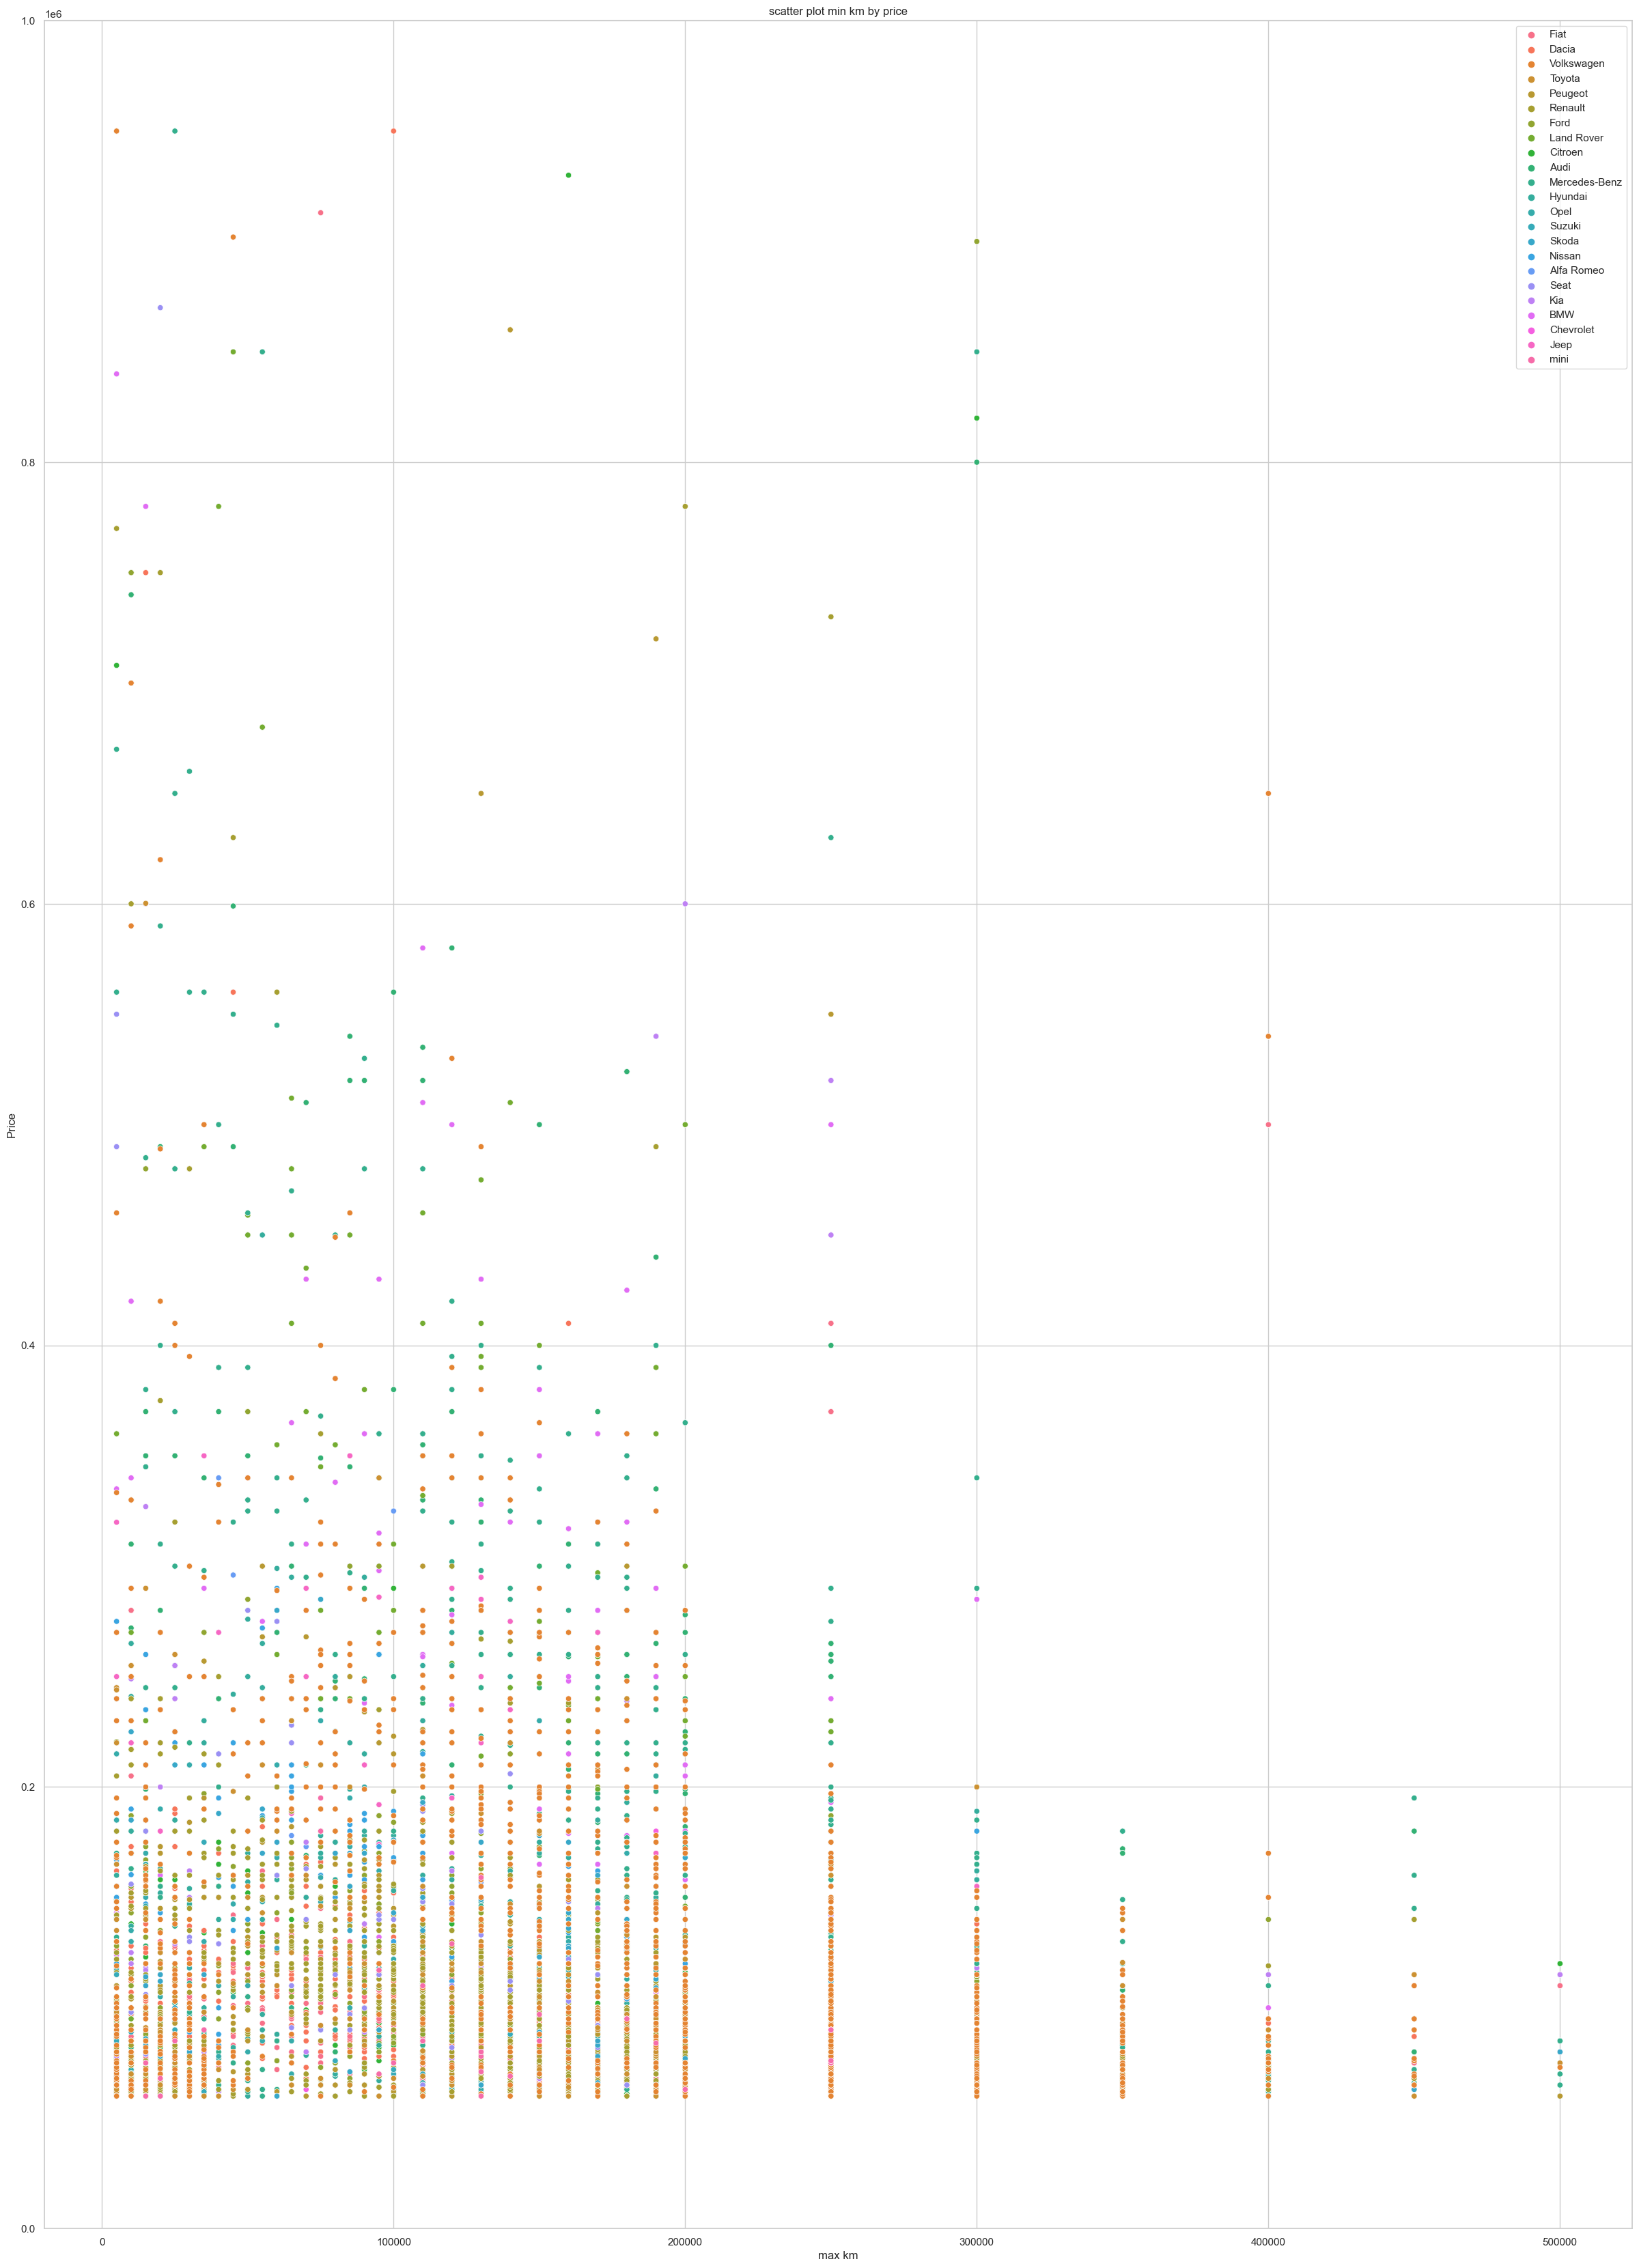

In [80]:
# Plot histogram
plt.figure(figsize=(30, 42))

sns.scatterplot(data=clean_raw_data, x='max_kilometrage',y='Prix',hue='Marque')

plt.xlabel('max km')
plt.ylabel('Price')
plt.title('scatter plot min km by price')



# Add custom labels to the legend
plt.legend()

plt.ylim(-1, 1e6)
plt.show()

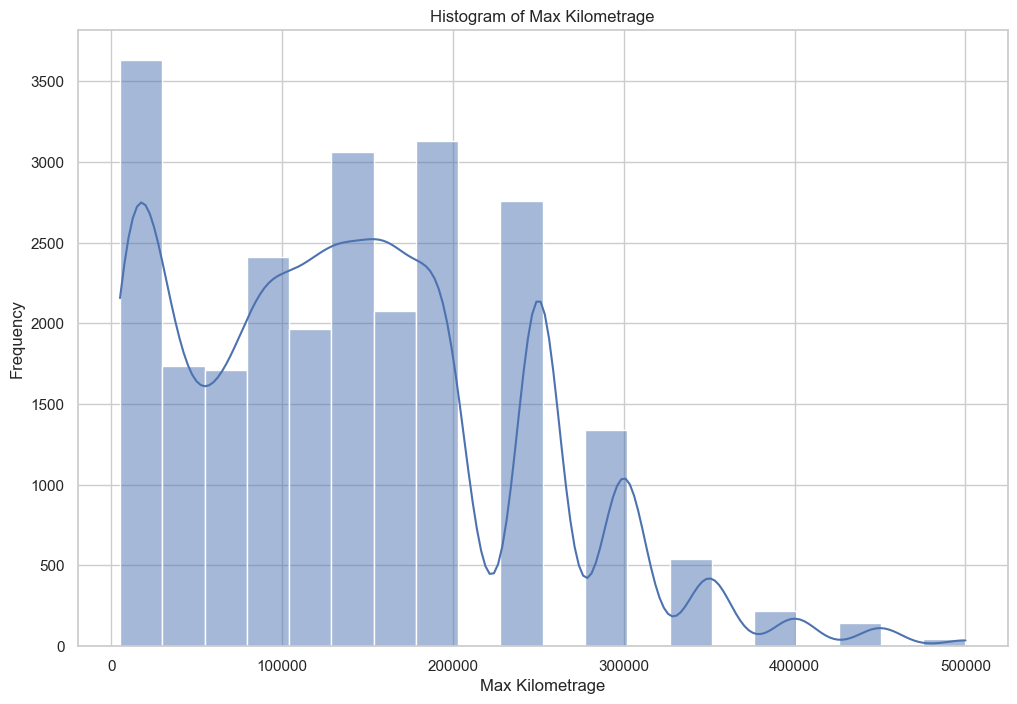

In [81]:
# Plot histogram
plt.figure(figsize=(12, 8))

sns.histplot(data=clean_raw_data, x='max_kilometrage', bins=20, kde=True)

plt.xlabel('Max Kilometrage')
plt.ylabel('Frequency')
plt.title('Histogram of Max Kilometrage')

plt.show()


In [83]:
clean_raw_data.columns 

Index(['Marque', 'Modèle', 'Année-Modèle', 'Type de carburant',
       'Puissance fiscale', 'Boite de vitesses', 'Première main', 'État',
       'Prix', 'min_kilometrage', 'max_kilometrage'],
      dtype='object')

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


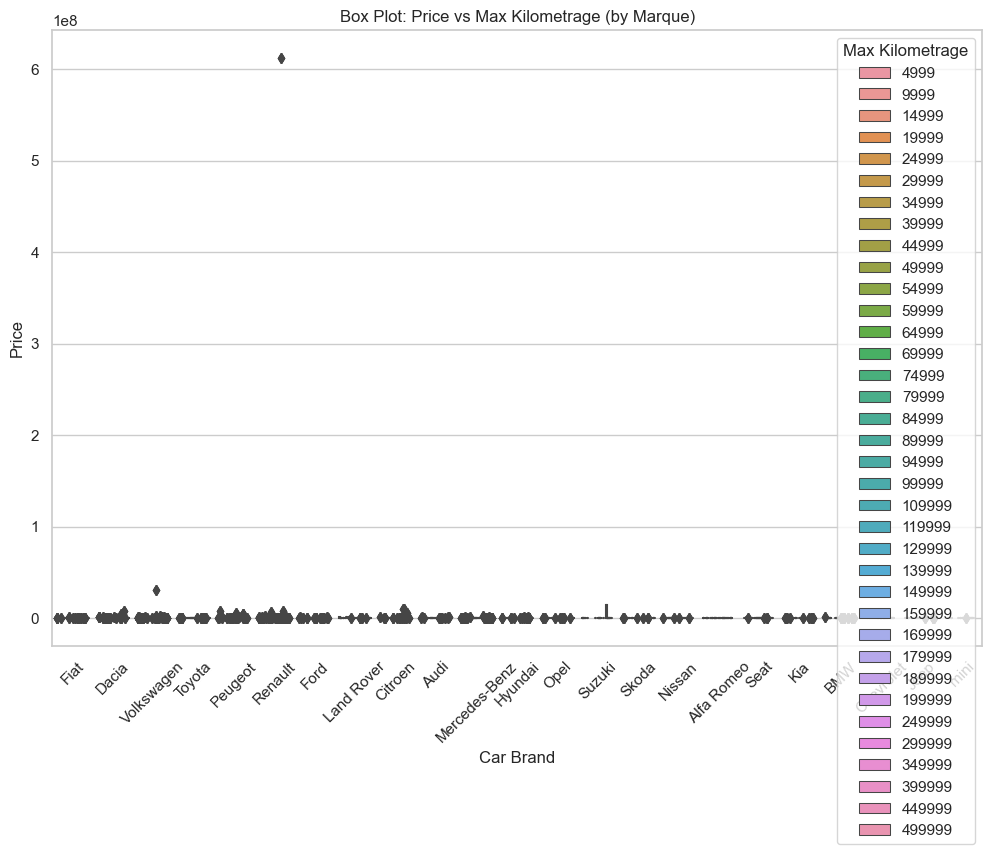

In [84]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=clean_raw_data, x='Marque', y='Prix', hue='max_kilometrage')
plt.xlabel('Car Brand')
plt.ylabel('Price')
plt.title('Box Plot: Price vs Max Kilometrage (by Marque)')
plt.xticks(rotation=45)
plt.legend(title='Max Kilometrage')
plt.show()


In [90]:
clean_raw_data.columns

Index(['Marque', 'Modèle', 'Année-Modèle', 'Type de carburant',
       'Puissance fiscale', 'Boite de vitesses', 'Première main', 'État',
       'Prix', 'min_kilometrage', 'max_kilometrage'],
      dtype='object')

In [92]:
clean_raw_data['Année-Modèle'].dtype

dtype('int64')

In [95]:
clean_raw_data['Année-Modèle'].unique()

array([2007, 2013, 2014, 2005, 2009, 2021, 2016, 2008, 2018, 2015, 2017,
       1998, 2011, 2019, 2010, 1999, 2006, 2012, 2001, 2004, 2002, 2020,
       1993, 2003, 1991, 1992, 2022, 1997, 2000, 1995, 1996, 1990, 1994],
      dtype=int64)

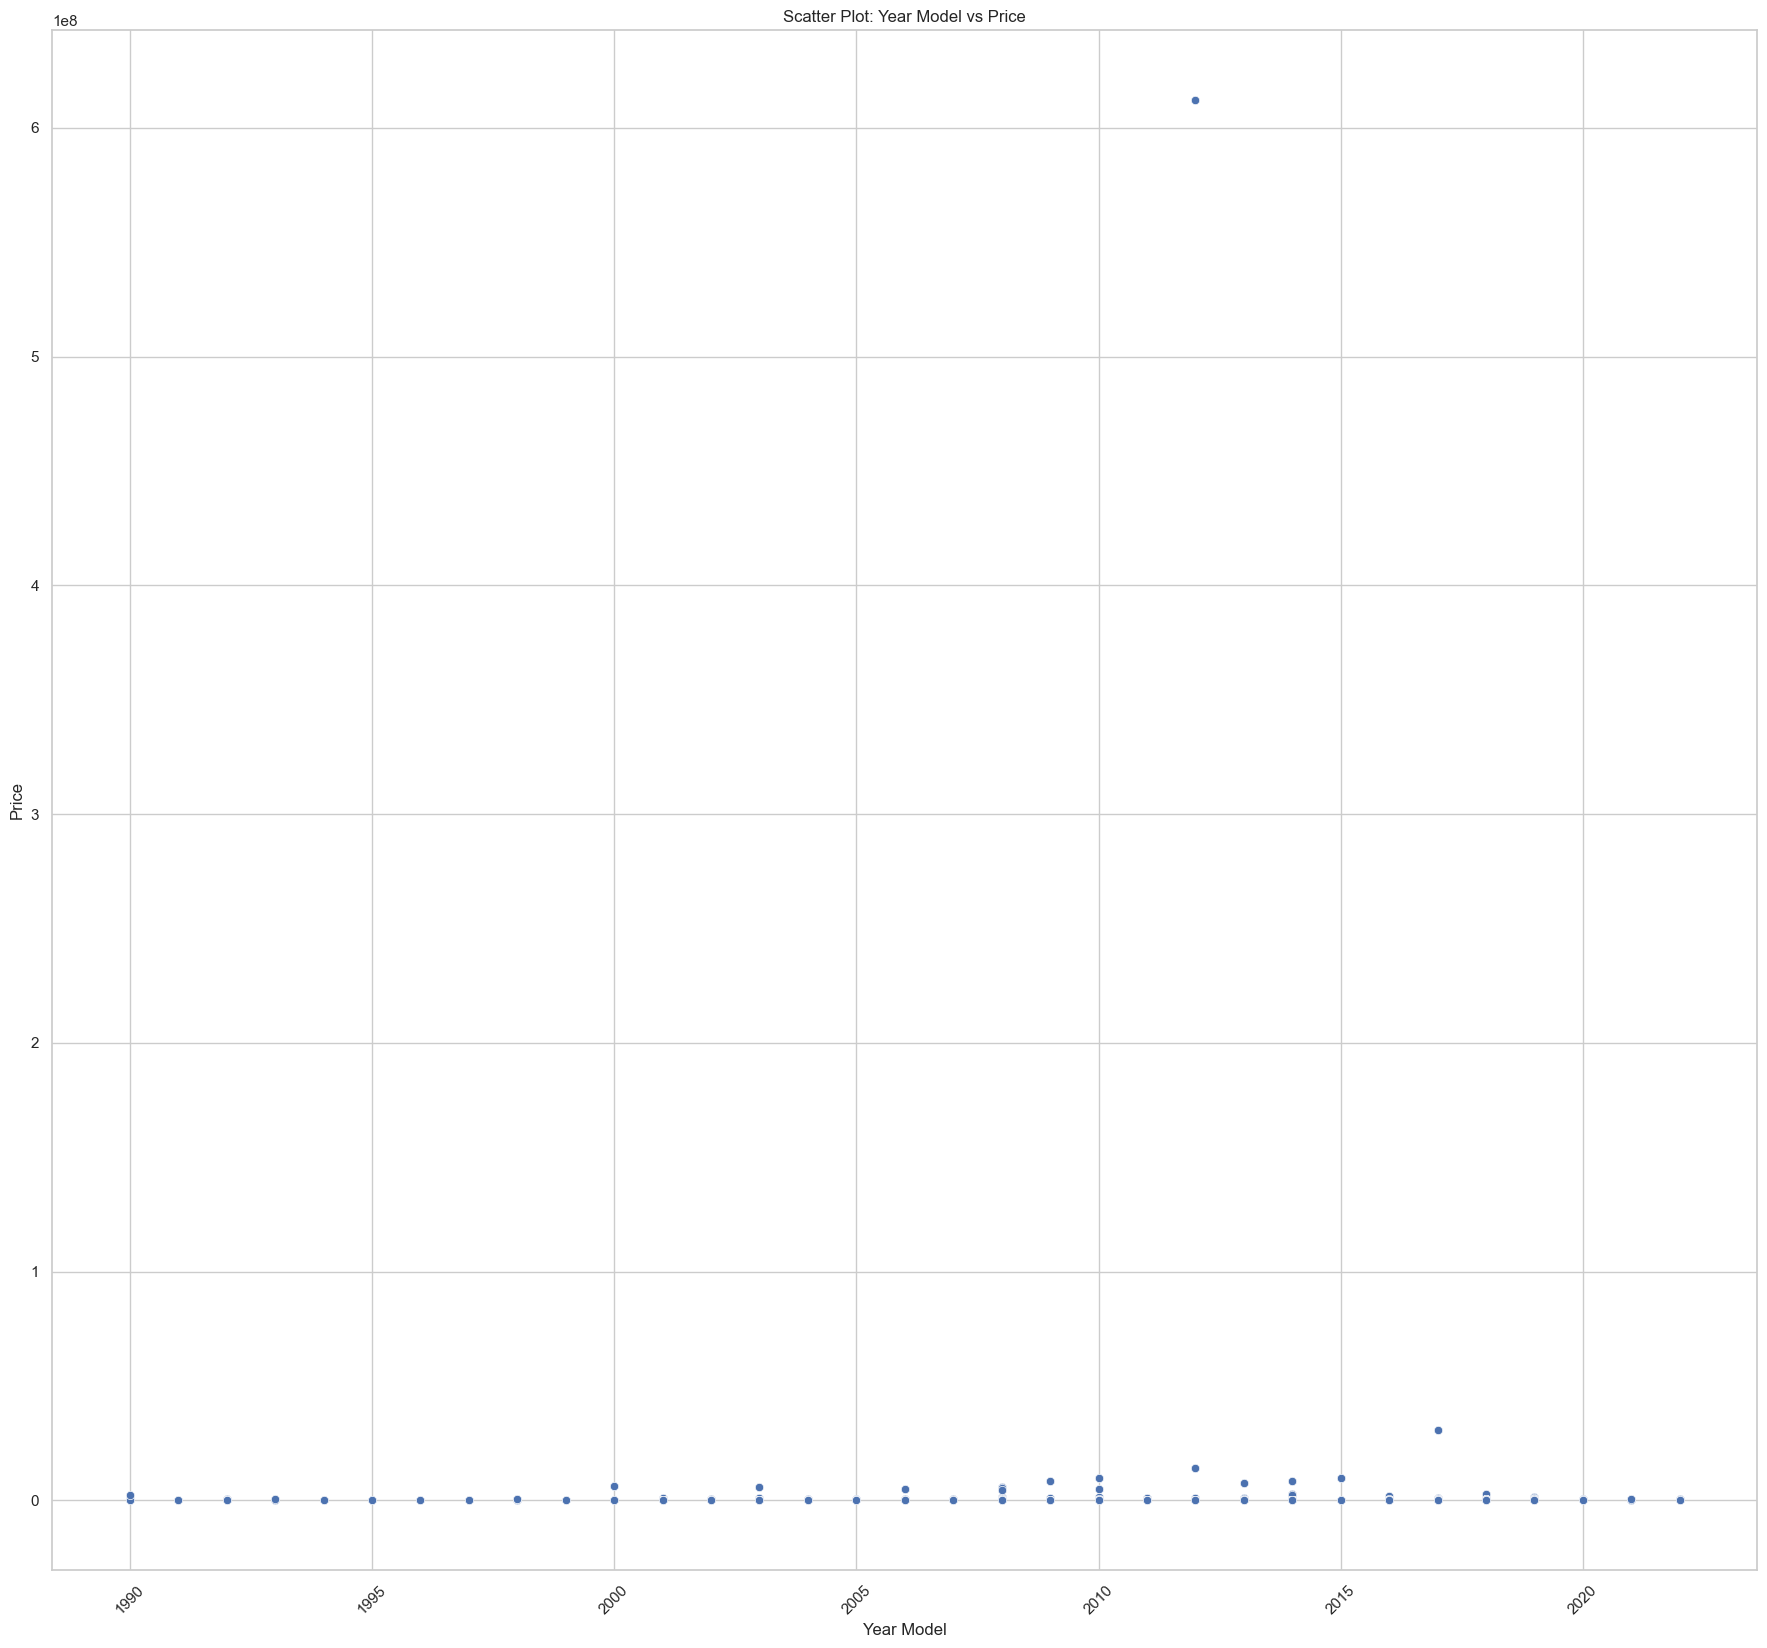

In [97]:
plt.figure(figsize=(22, 20))
sns.scatterplot(data=clean_raw_data, x='Année-Modèle', y='Prix')
plt.xlabel('Year Model')
plt.ylabel('Price')
plt.title('Scatter Plot: Year Model vs Price')
plt.xticks(rotation=45)
plt.show()

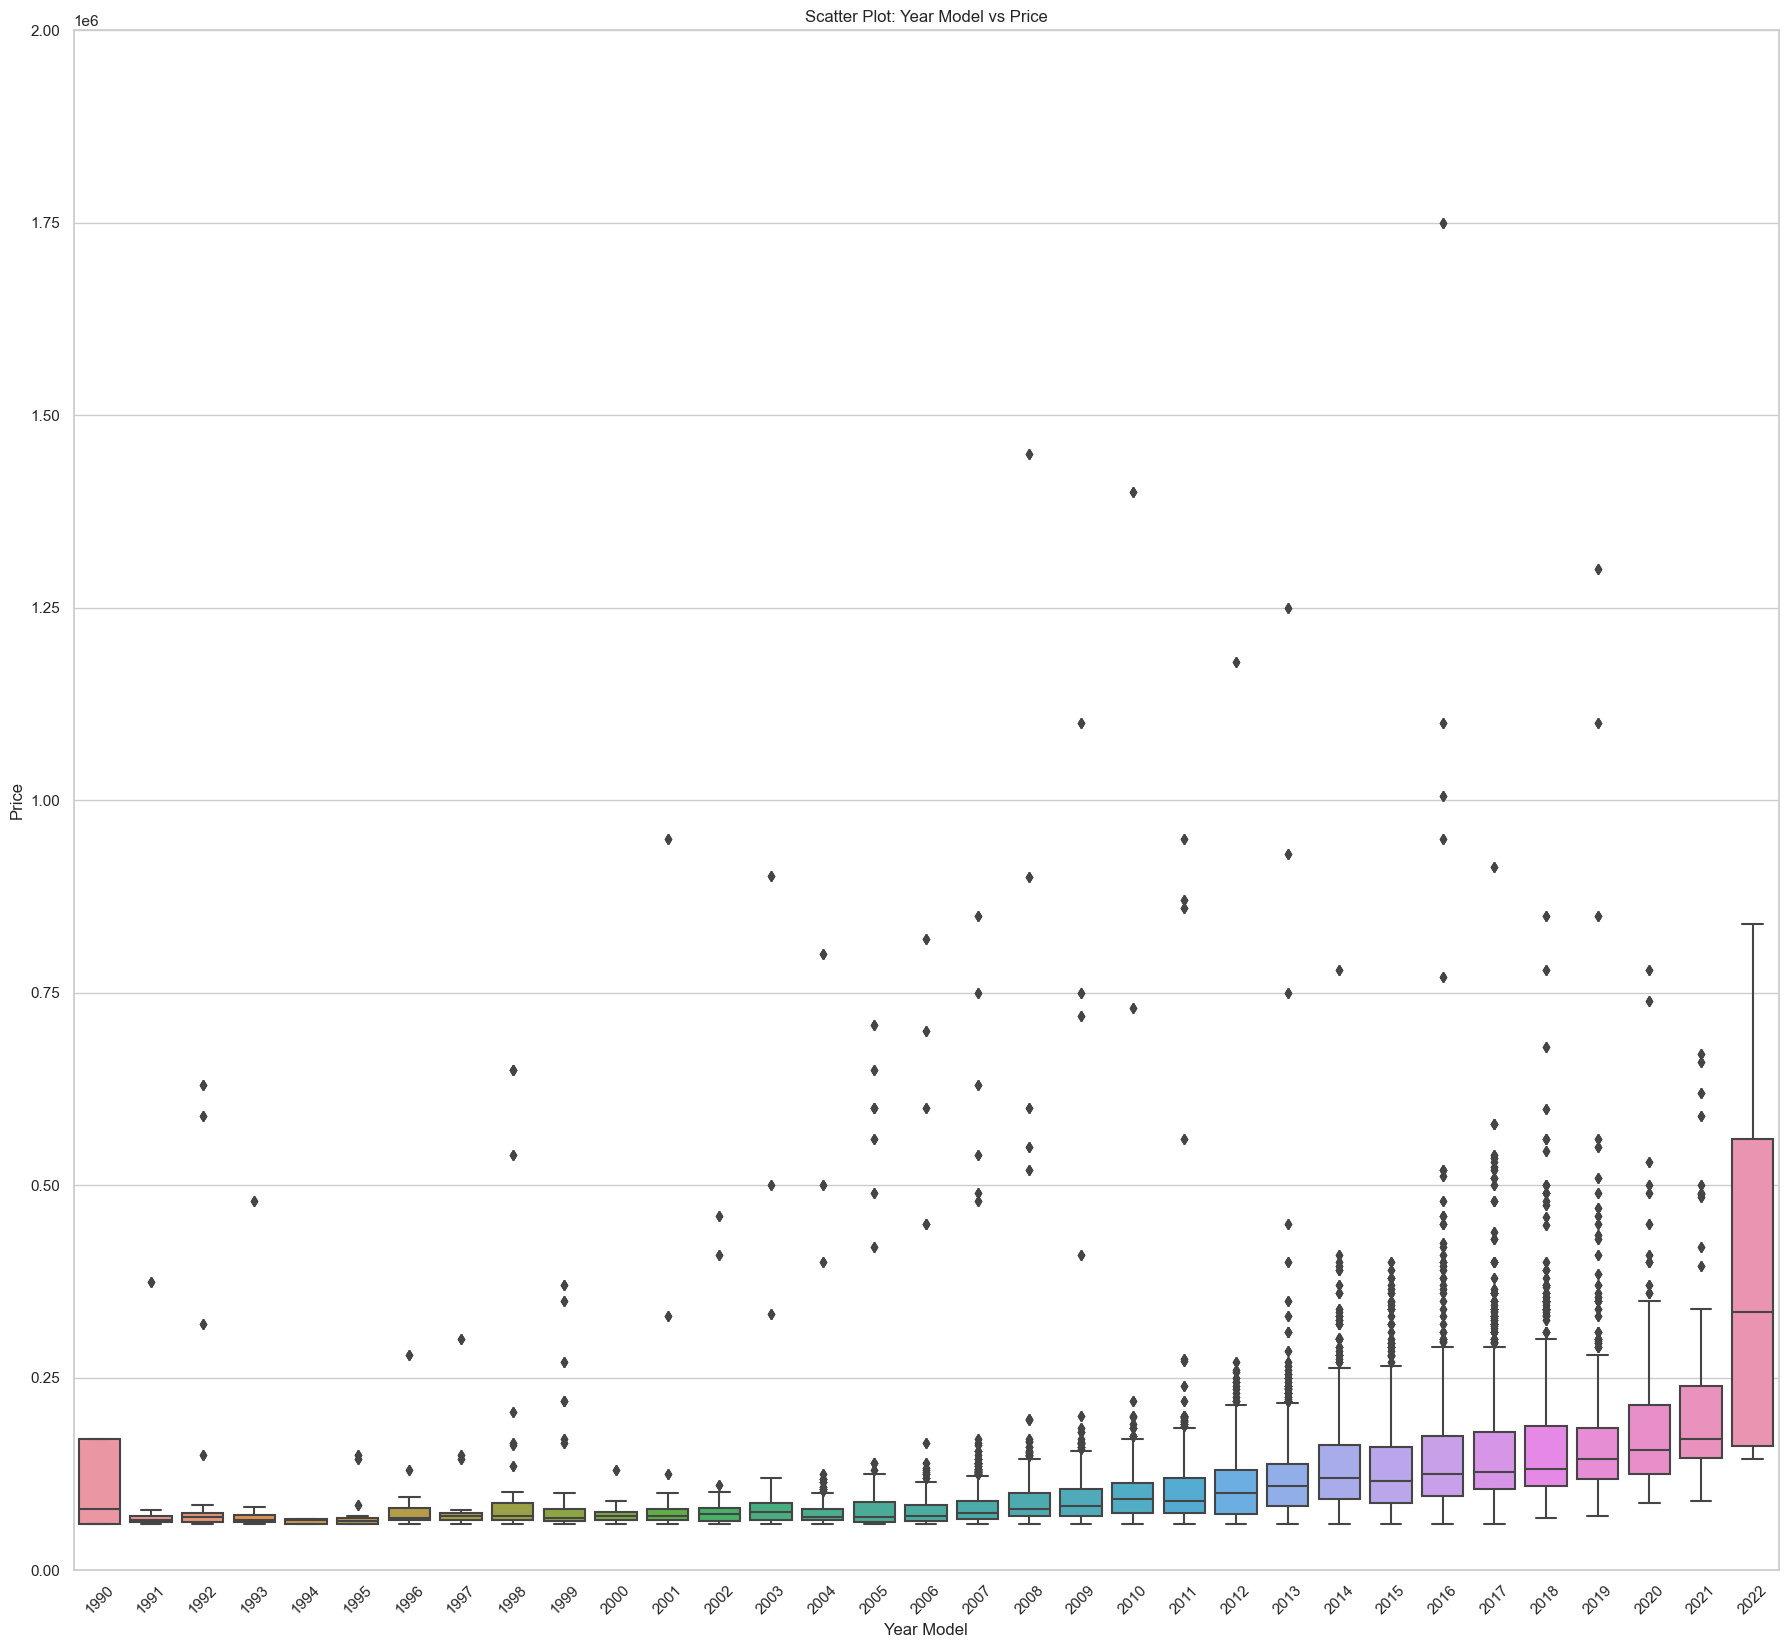

In [99]:
plt.figure(figsize=(22, 20))
sns.boxplot(data=clean_raw_data, x='Année-Modèle', y='Prix')
plt.xlabel('Year Model')
plt.ylabel('Price')
plt.title('Scatter Plot: Year Model vs Price')
plt.xticks(rotation=45)
plt.ylim(-1,2e6)
plt.show()

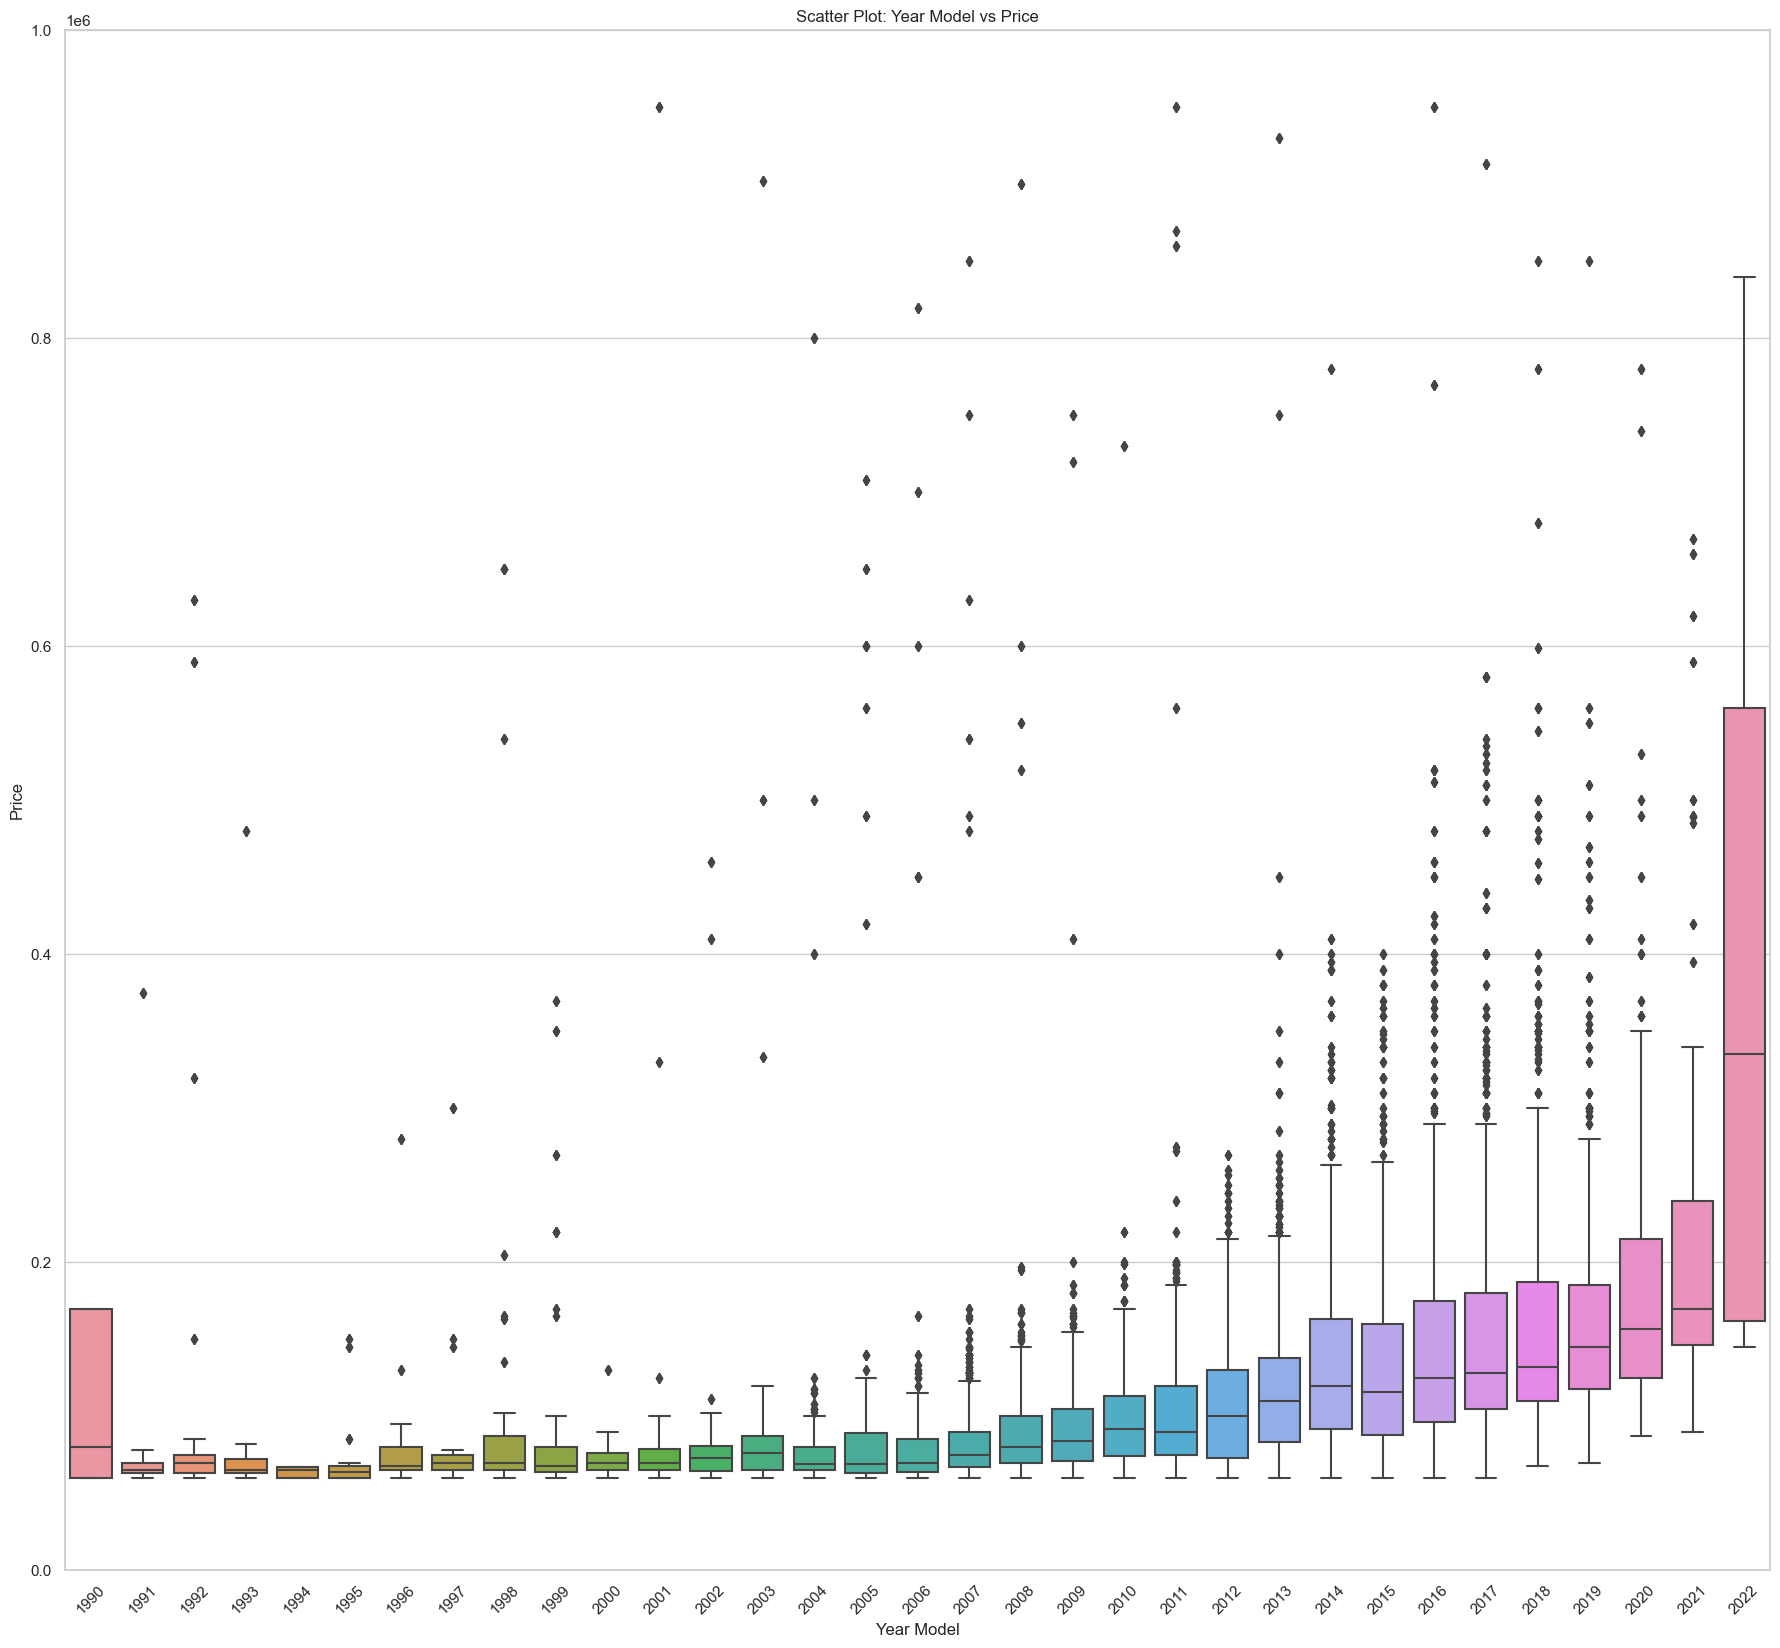

In [100]:
plt.figure(figsize=(22, 20))
sns.boxplot(data=clean_raw_data, x='Année-Modèle', y='Prix')
plt.xlabel('Year Model')
plt.ylabel('Price')
plt.title('box Plot: Year Model vs Price')
plt.xticks(rotation=45)
plt.ylim(-1,1e6)
plt.show()

the model of year 2022  is on average expensive than the others

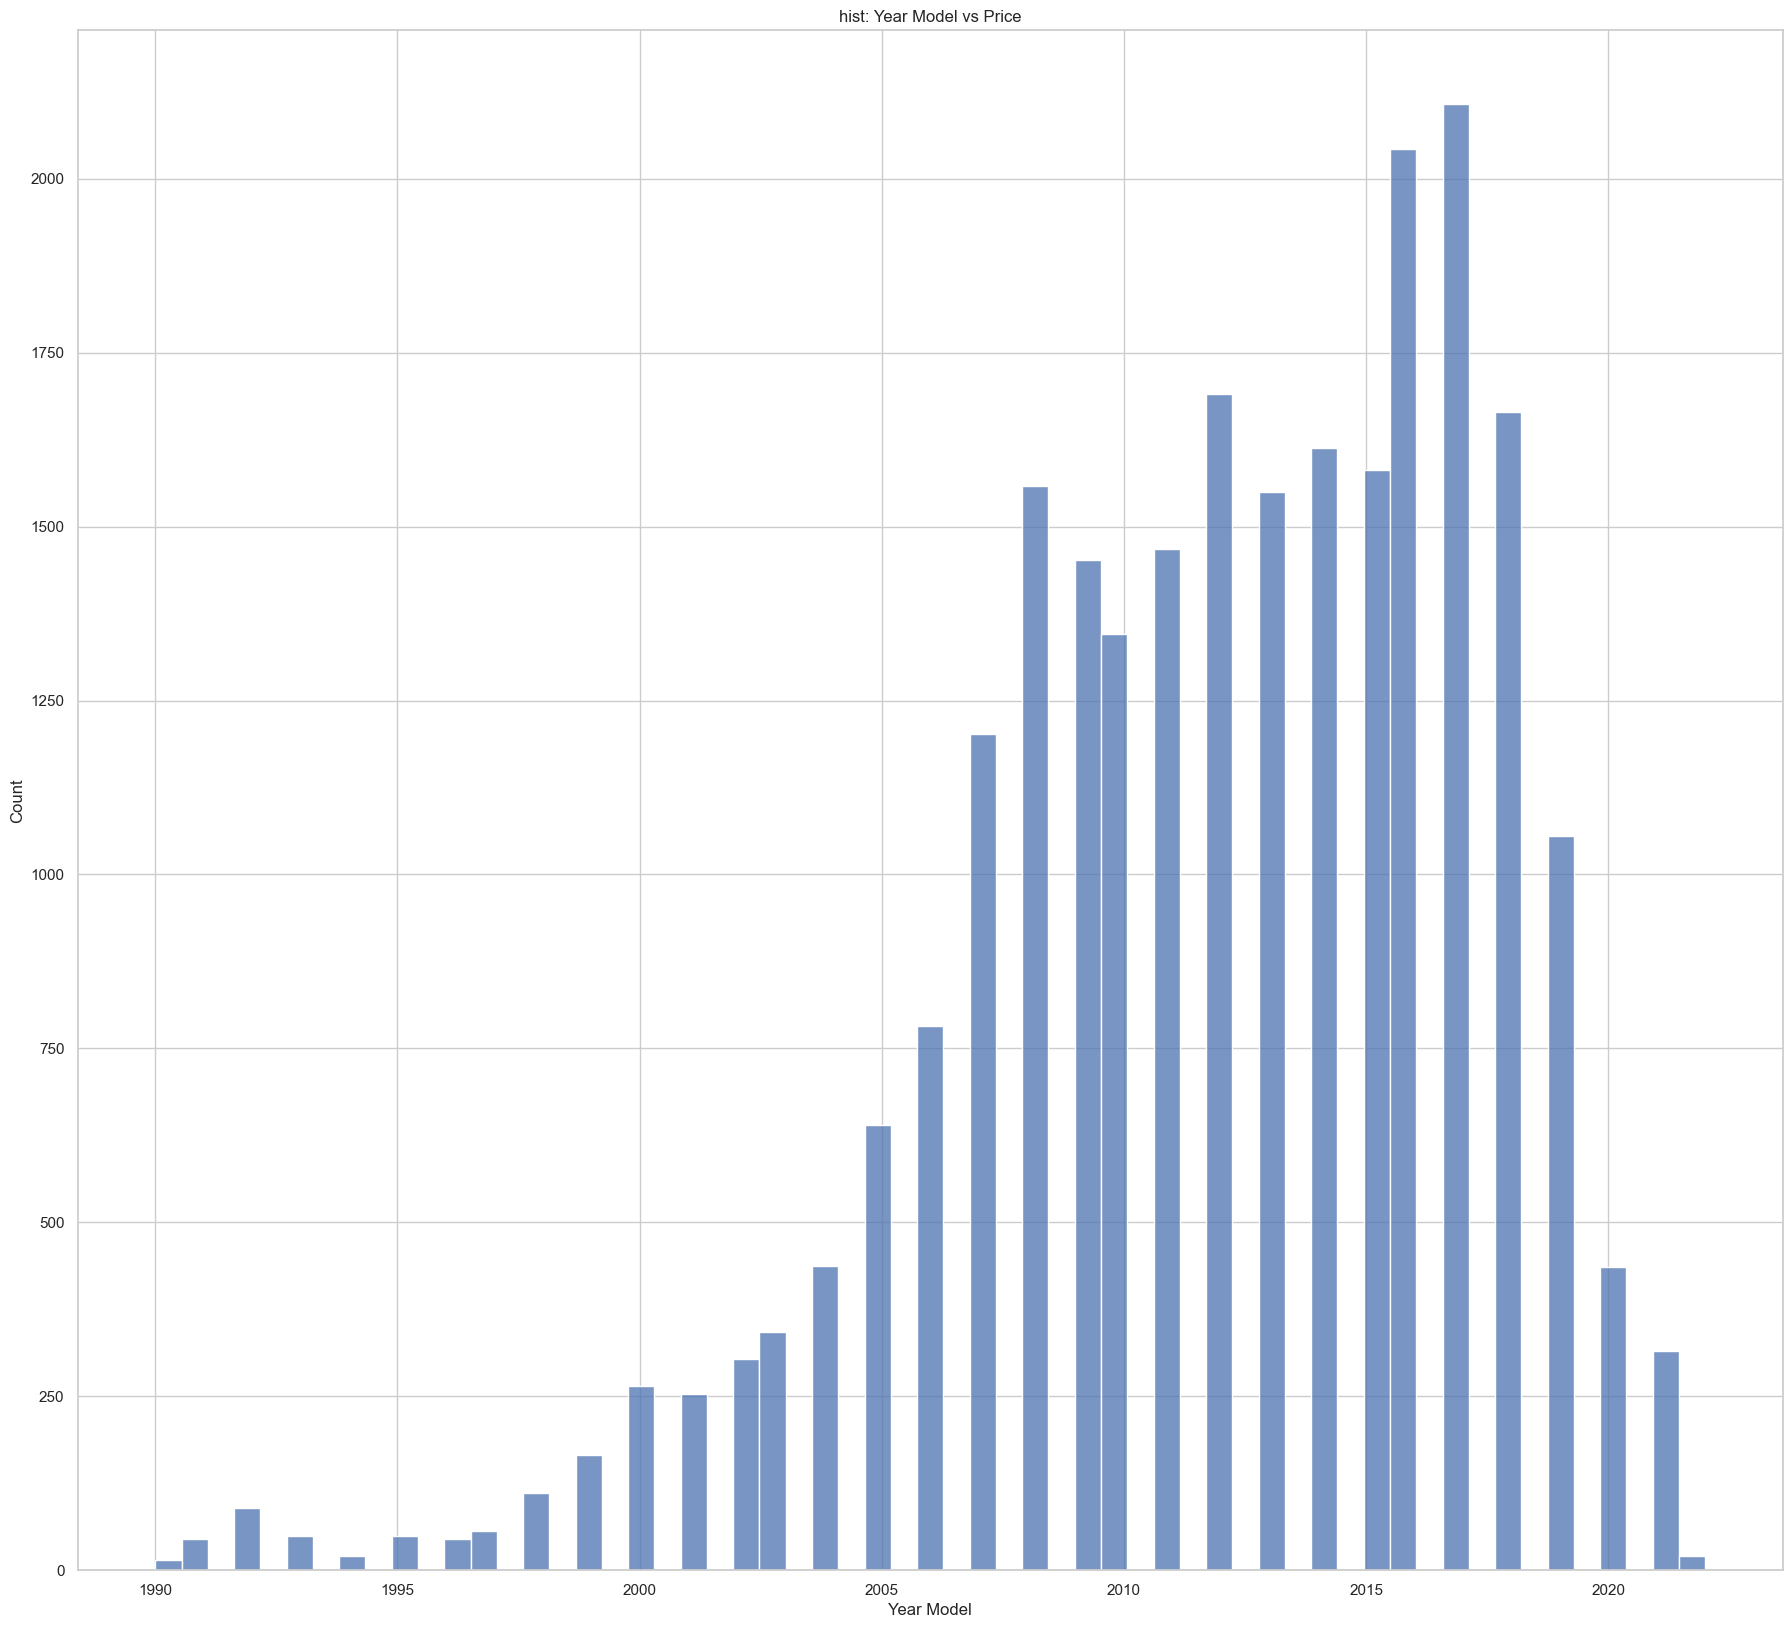

In [101]:
plt.figure(figsize=(22, 20))
sns.histplot(data=clean_raw_data, x='Année-Modèle')
plt.xlabel('Year Model')
plt.title('hist: Year Model vs Price')
plt.show()

- the model 2022 the count is lower even it's expensive
- there is a lot of cars model 2017 

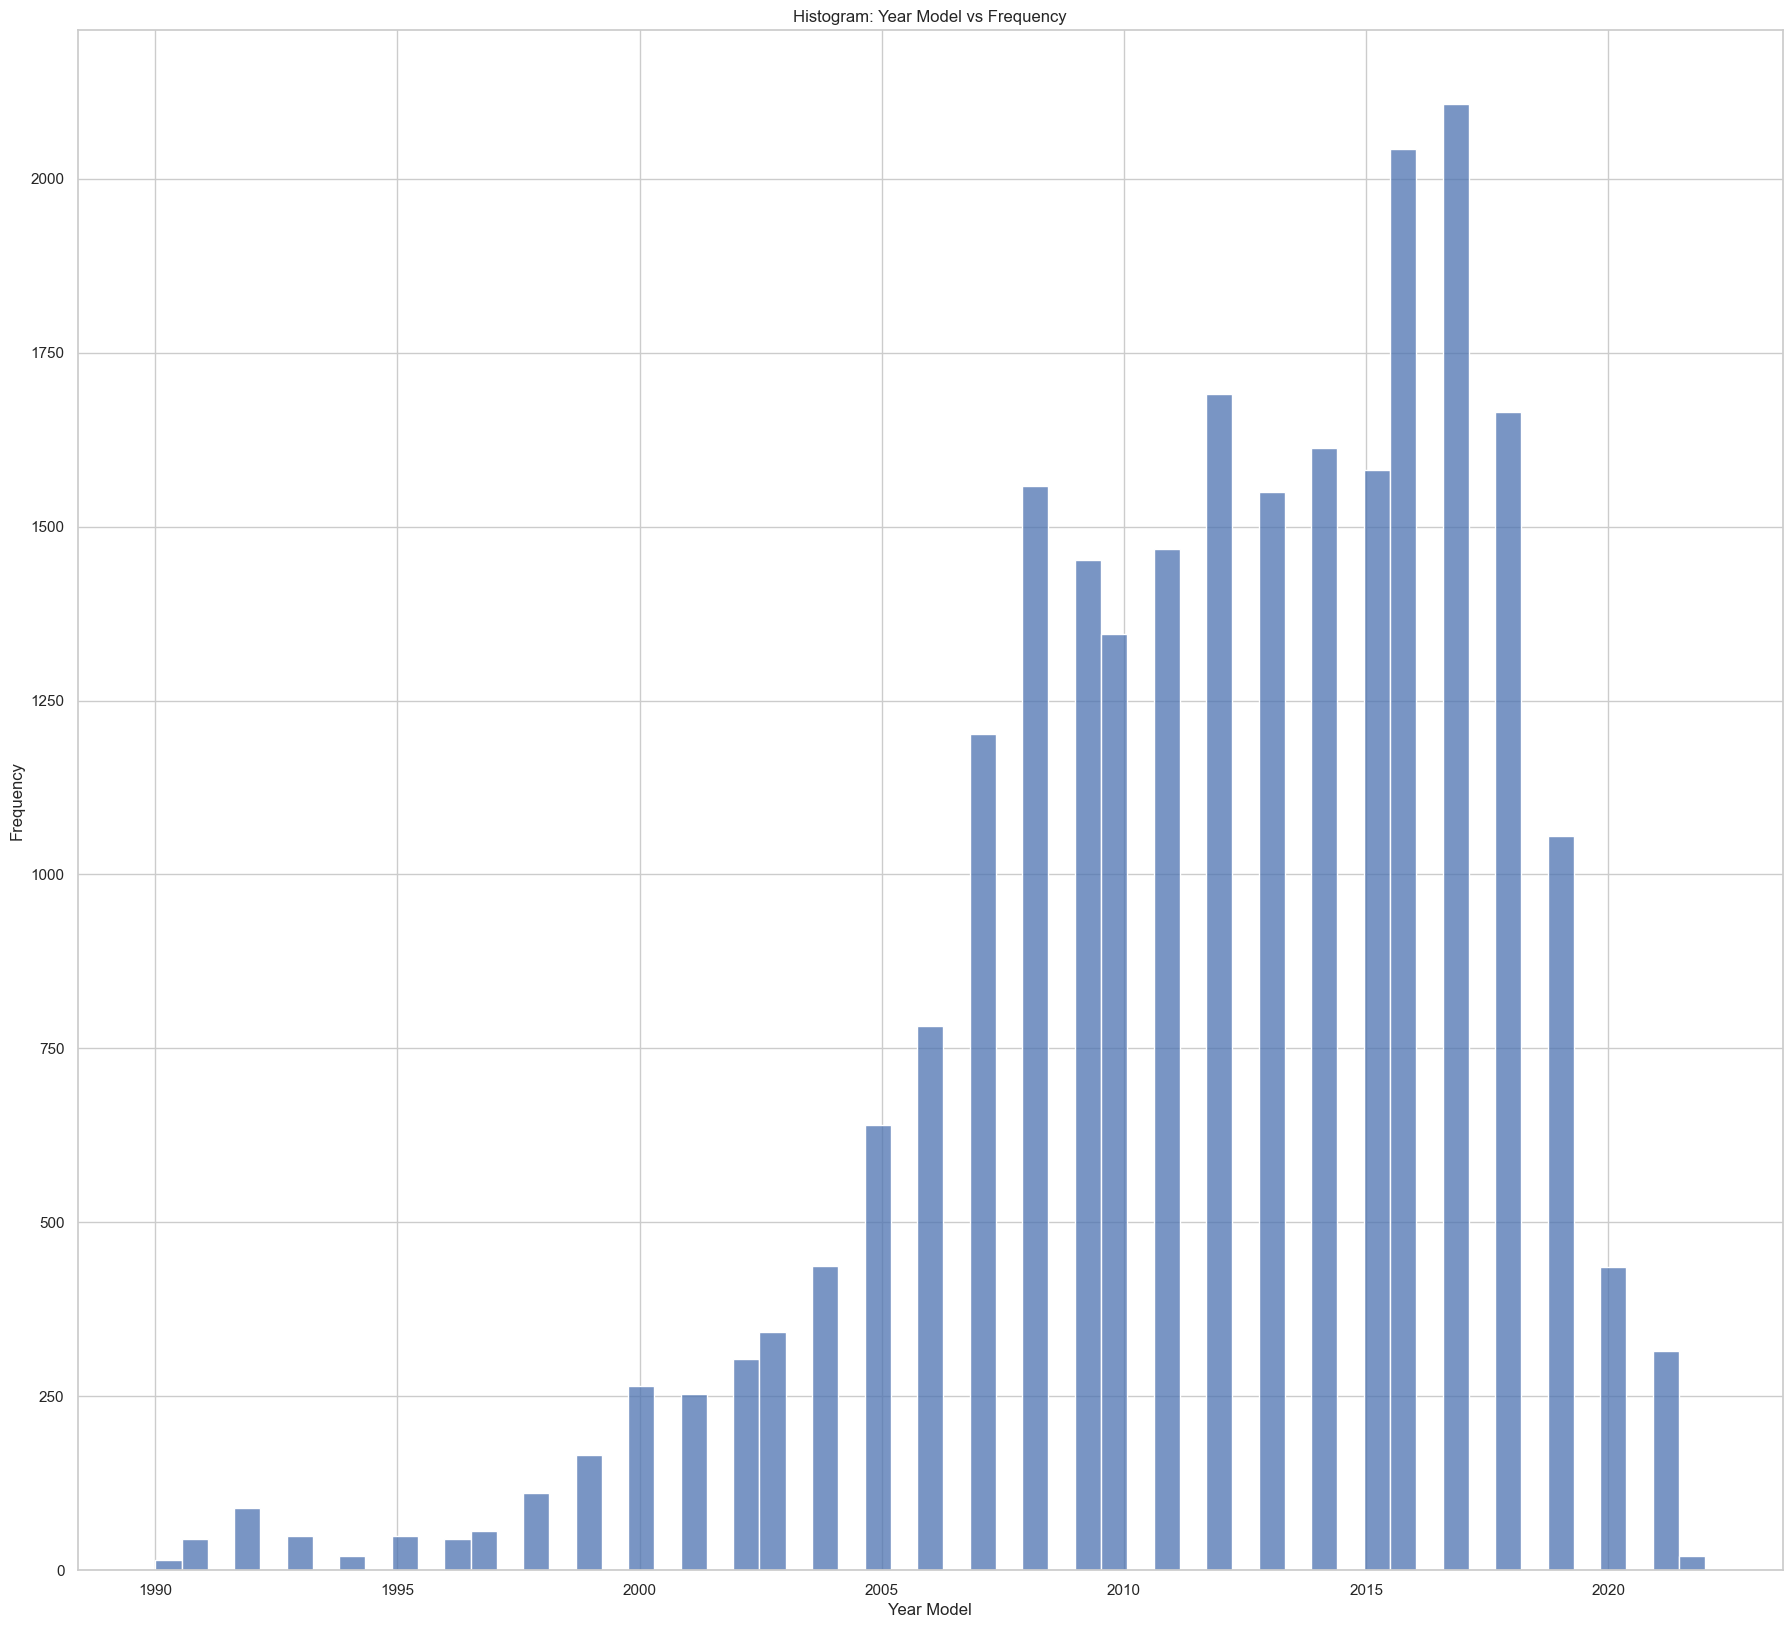

In [103]:
plt.figure(figsize=(22, 20))
sns.histplot(data=clean_raw_data, x='Année-Modèle')

plt.xlabel('Year Model')
plt.ylabel('Frequency')
plt.title('Histogram: Year Model vs Frequency')



plt.show()

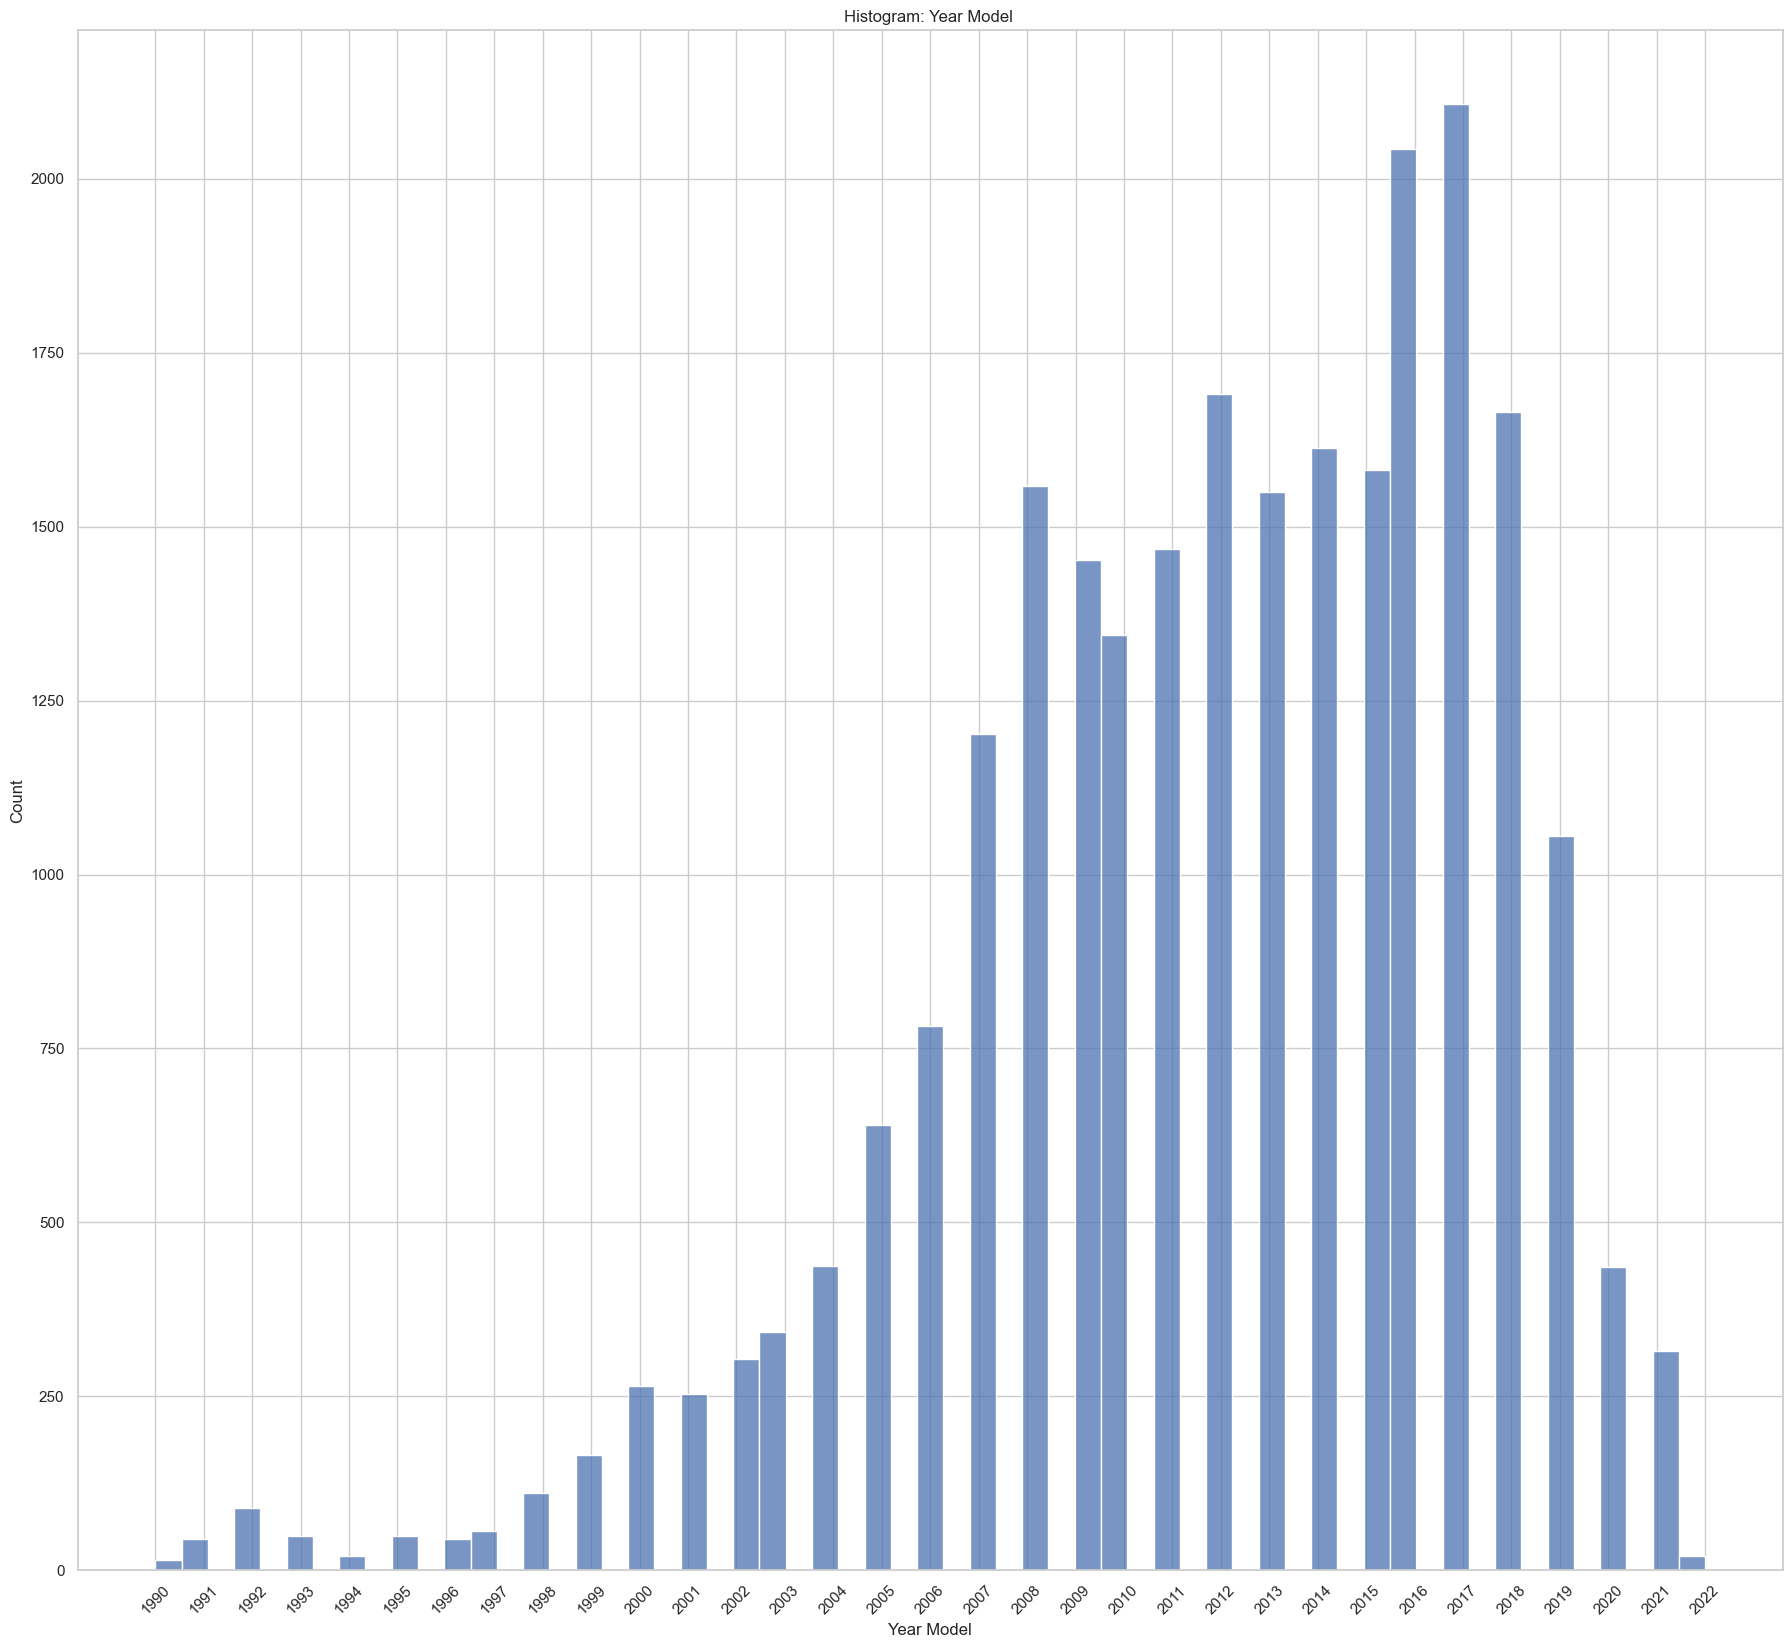

In [109]:
plt.figure(figsize=(22, 20))
sns.histplot(data=clean_raw_data, x='Année-Modèle')

plt.xlabel('Year Model')
plt.title('Histogram: Year Model ')

# Manually setting ticks to display all unique years
unique_years = sorted(clean_raw_data['Année-Modèle'].unique())
plt.xticks(unique_years, rotation=45)

plt.show()

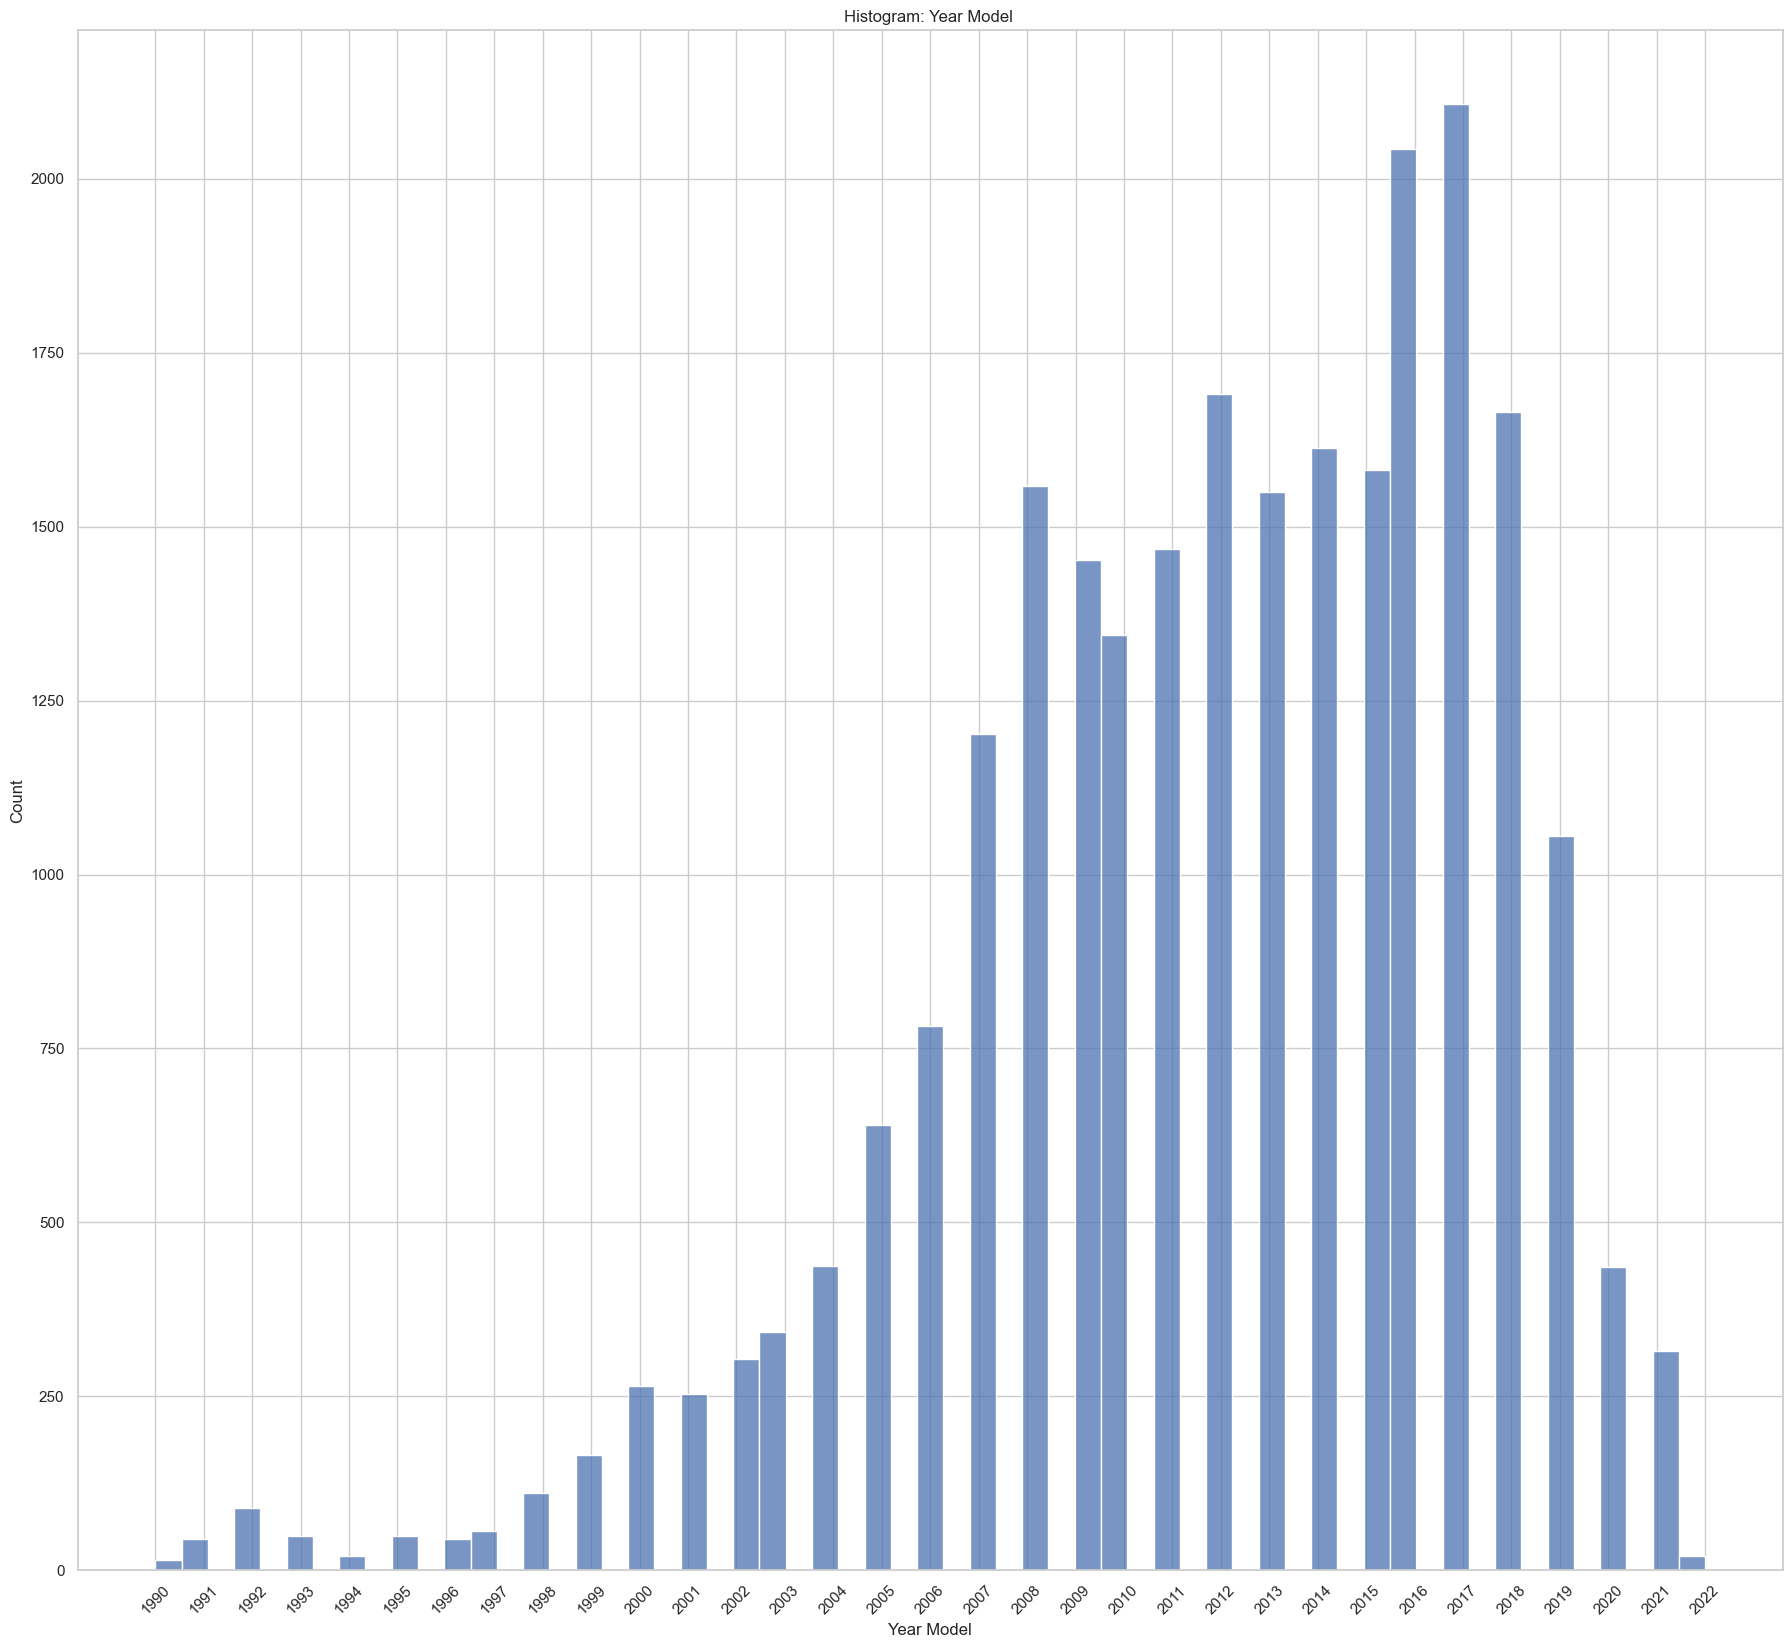

In [112]:
plt.figure(figsize=(22, 20))
sns.histplot(data=clean_raw_data, x='Année-Modèle')

plt.xlabel('Year Model')
plt.title('Histogram: Year Model ')

unique_years = sorted(clean_raw_data['Année-Modèle'].unique())
plt.xticks(unique_years, rotation=45)

plt.show()

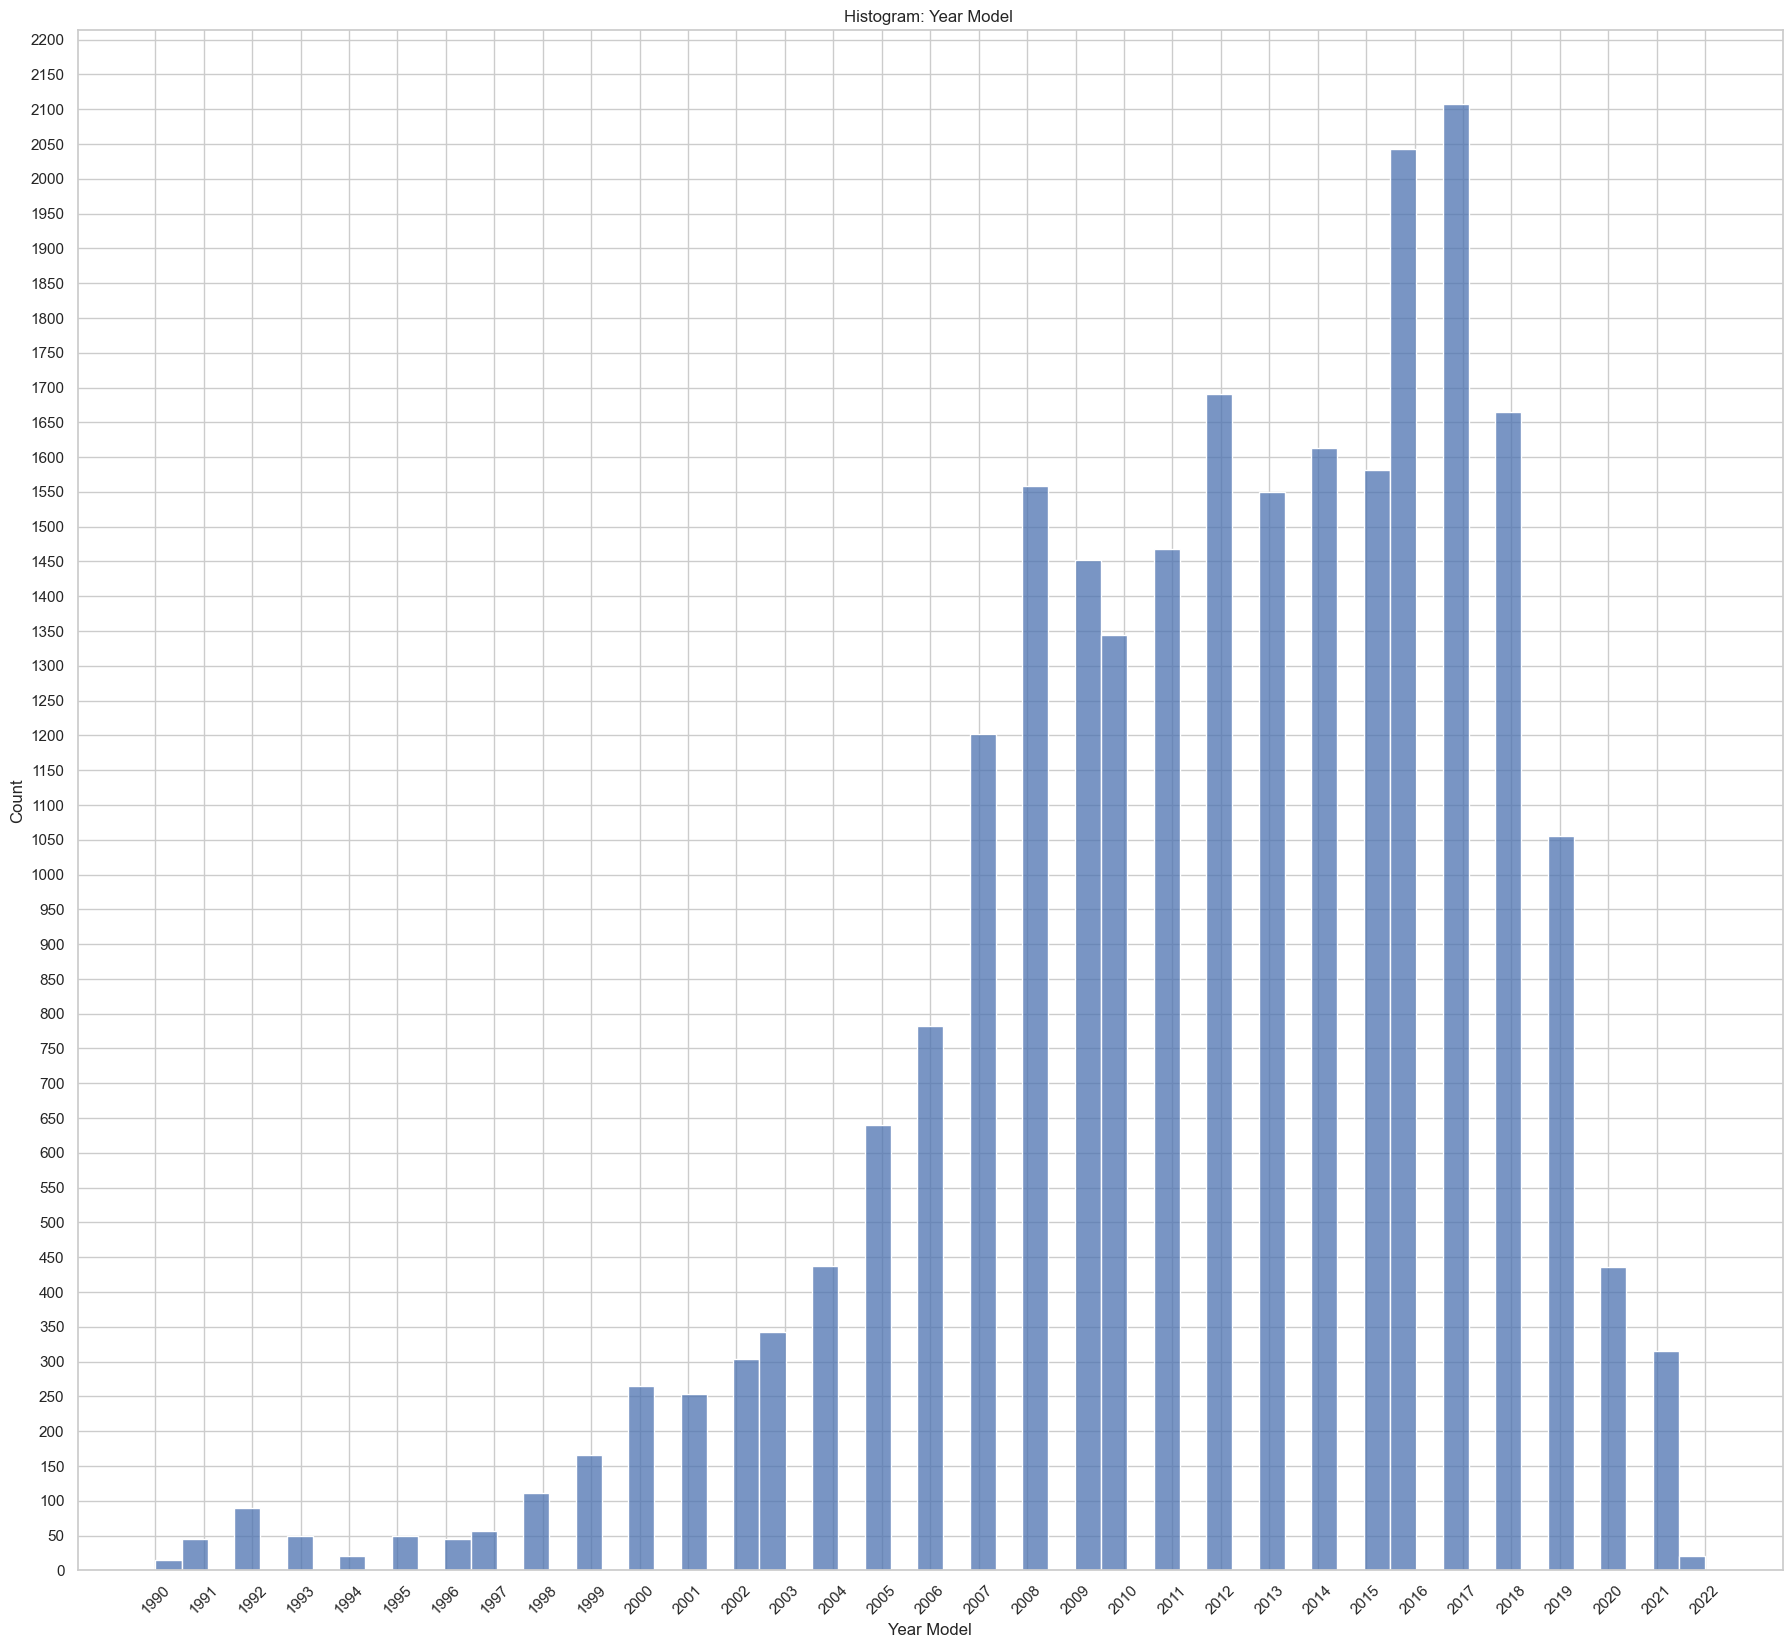

In [113]:
plt.figure(figsize=(22, 20))
sns.histplot(data=clean_raw_data, x='Année-Modèle')

plt.xlabel('Year Model')
plt.title('Histogram: Year Model ')

unique_years = sorted(clean_raw_data['Année-Modèle'].unique())
plt.xticks(unique_years, rotation=45)

# Get the current limits of the y-axis
y_min, y_max = plt.gca().get_ylim()

# Set custom y-tick values
plt.yticks(range(0, int(y_max) + 1, 50))  

plt.show()

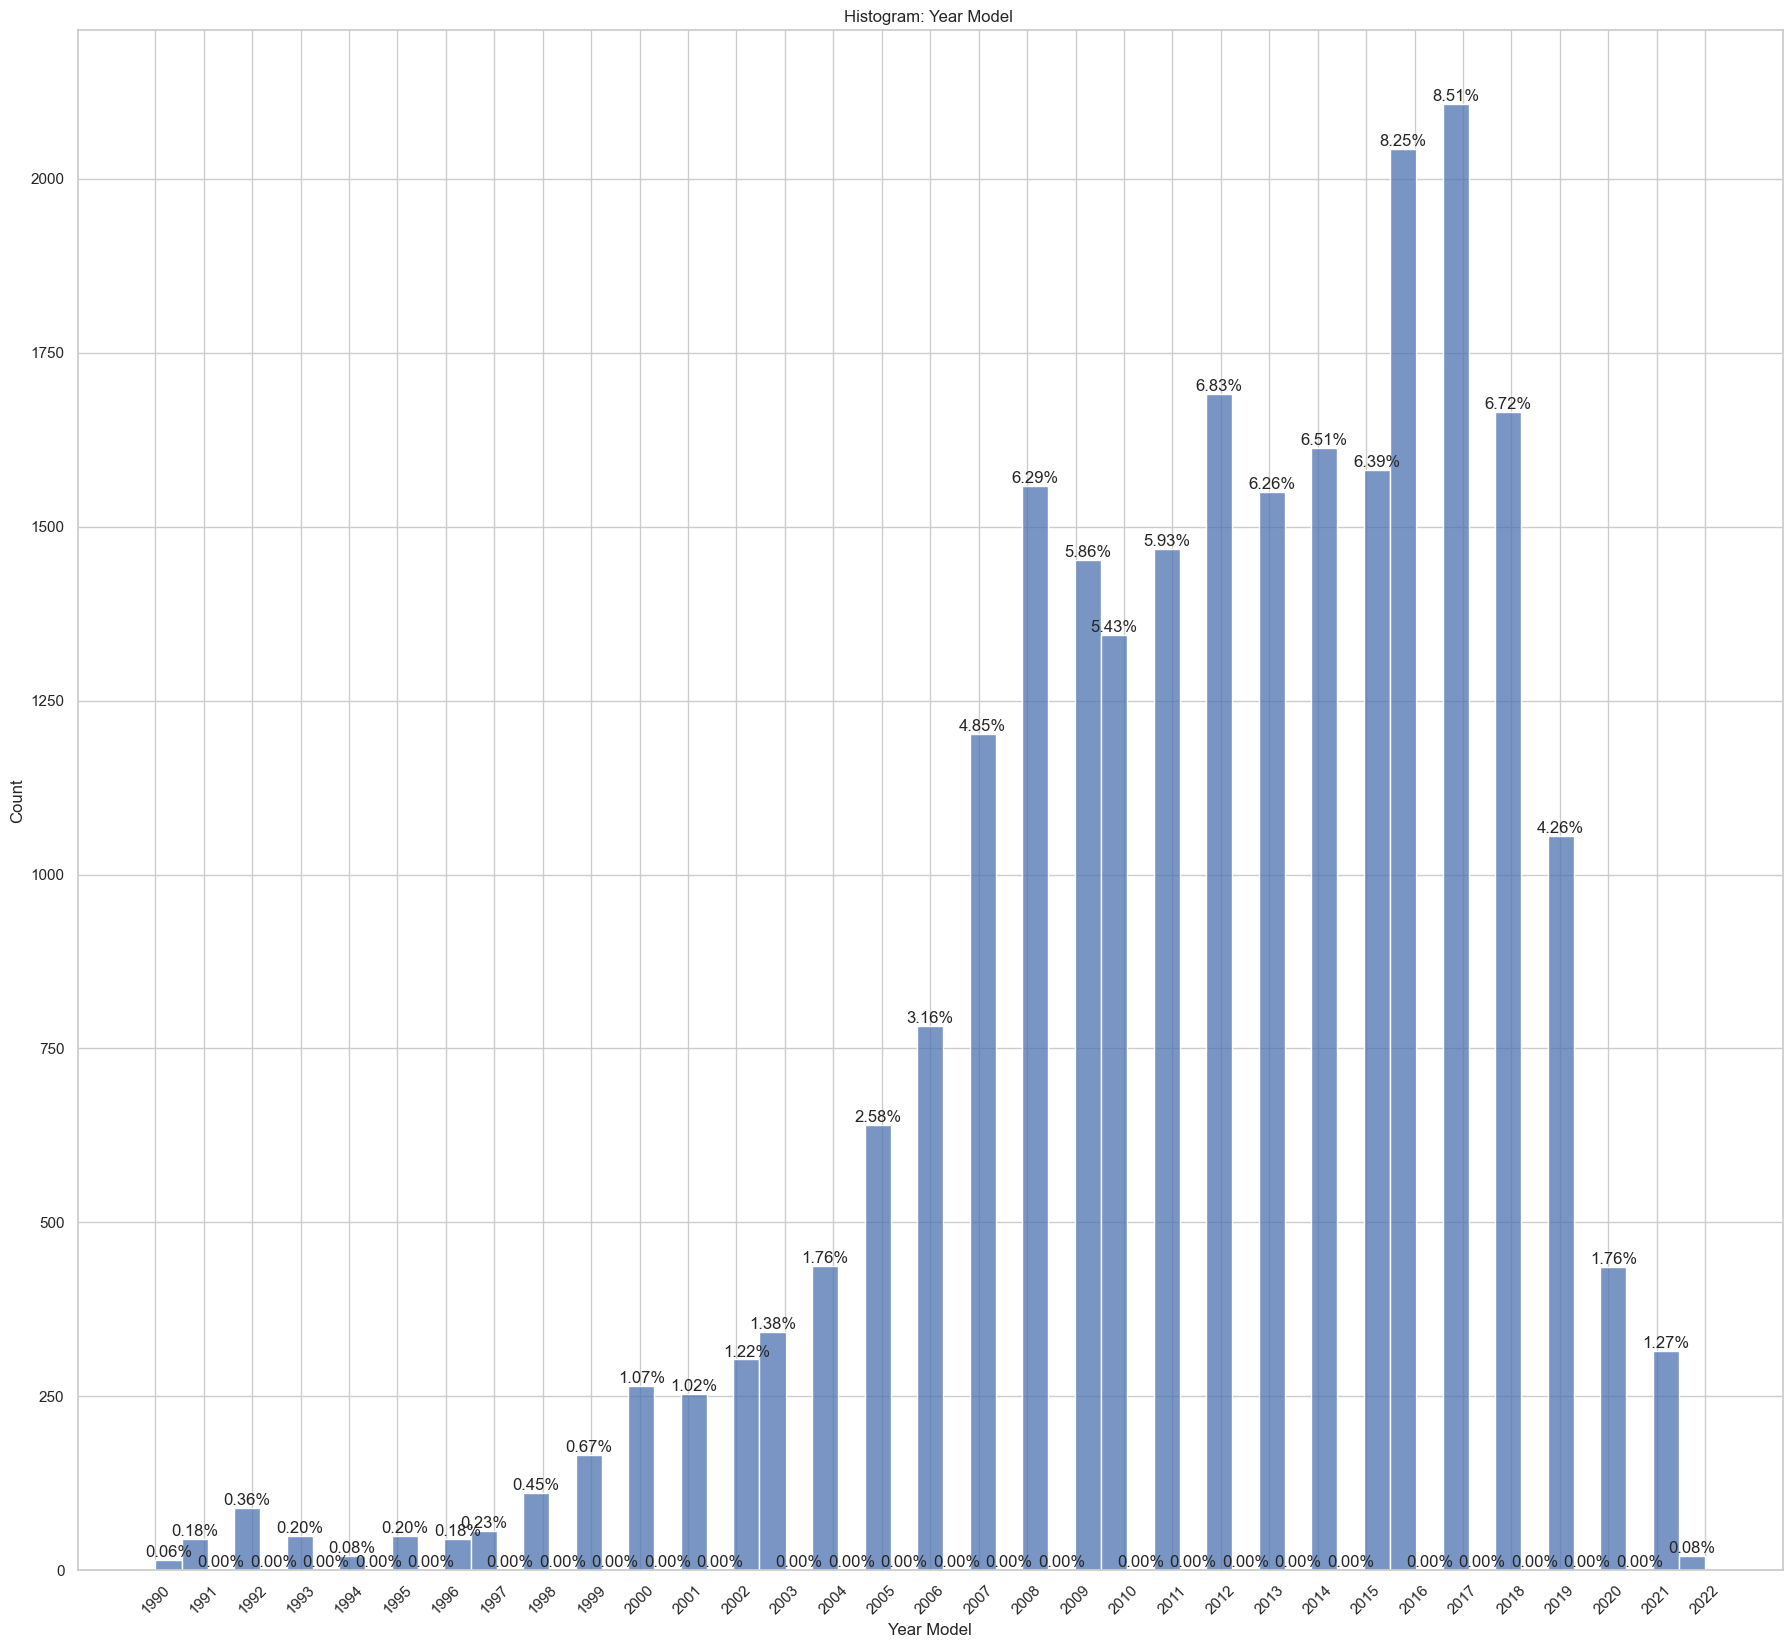

In [114]:
plt.figure(figsize=(22, 20))
histplot = sns.histplot(data=clean_raw_data, x='Année-Modèle')

plt.xlabel('Year Model')
plt.title('Histogram: Year Model ')

unique_years = sorted(clean_raw_data['Année-Modèle'].unique())
plt.xticks(unique_years, rotation=45)

# Calculate frequency percentage
total_samples = len(clean_raw_data)
for rect in histplot.patches:
    height = rect.get_height()
    frequency_percentage = (height / total_samples) * 100
    plt.text(rect.get_x() + rect.get_width() / 2, height, f'{frequency_percentage:.2f}%', ha='center', va='bottom')

plt.show()

the cars from model 2022  exist just 0.08% , but it's the expensive one

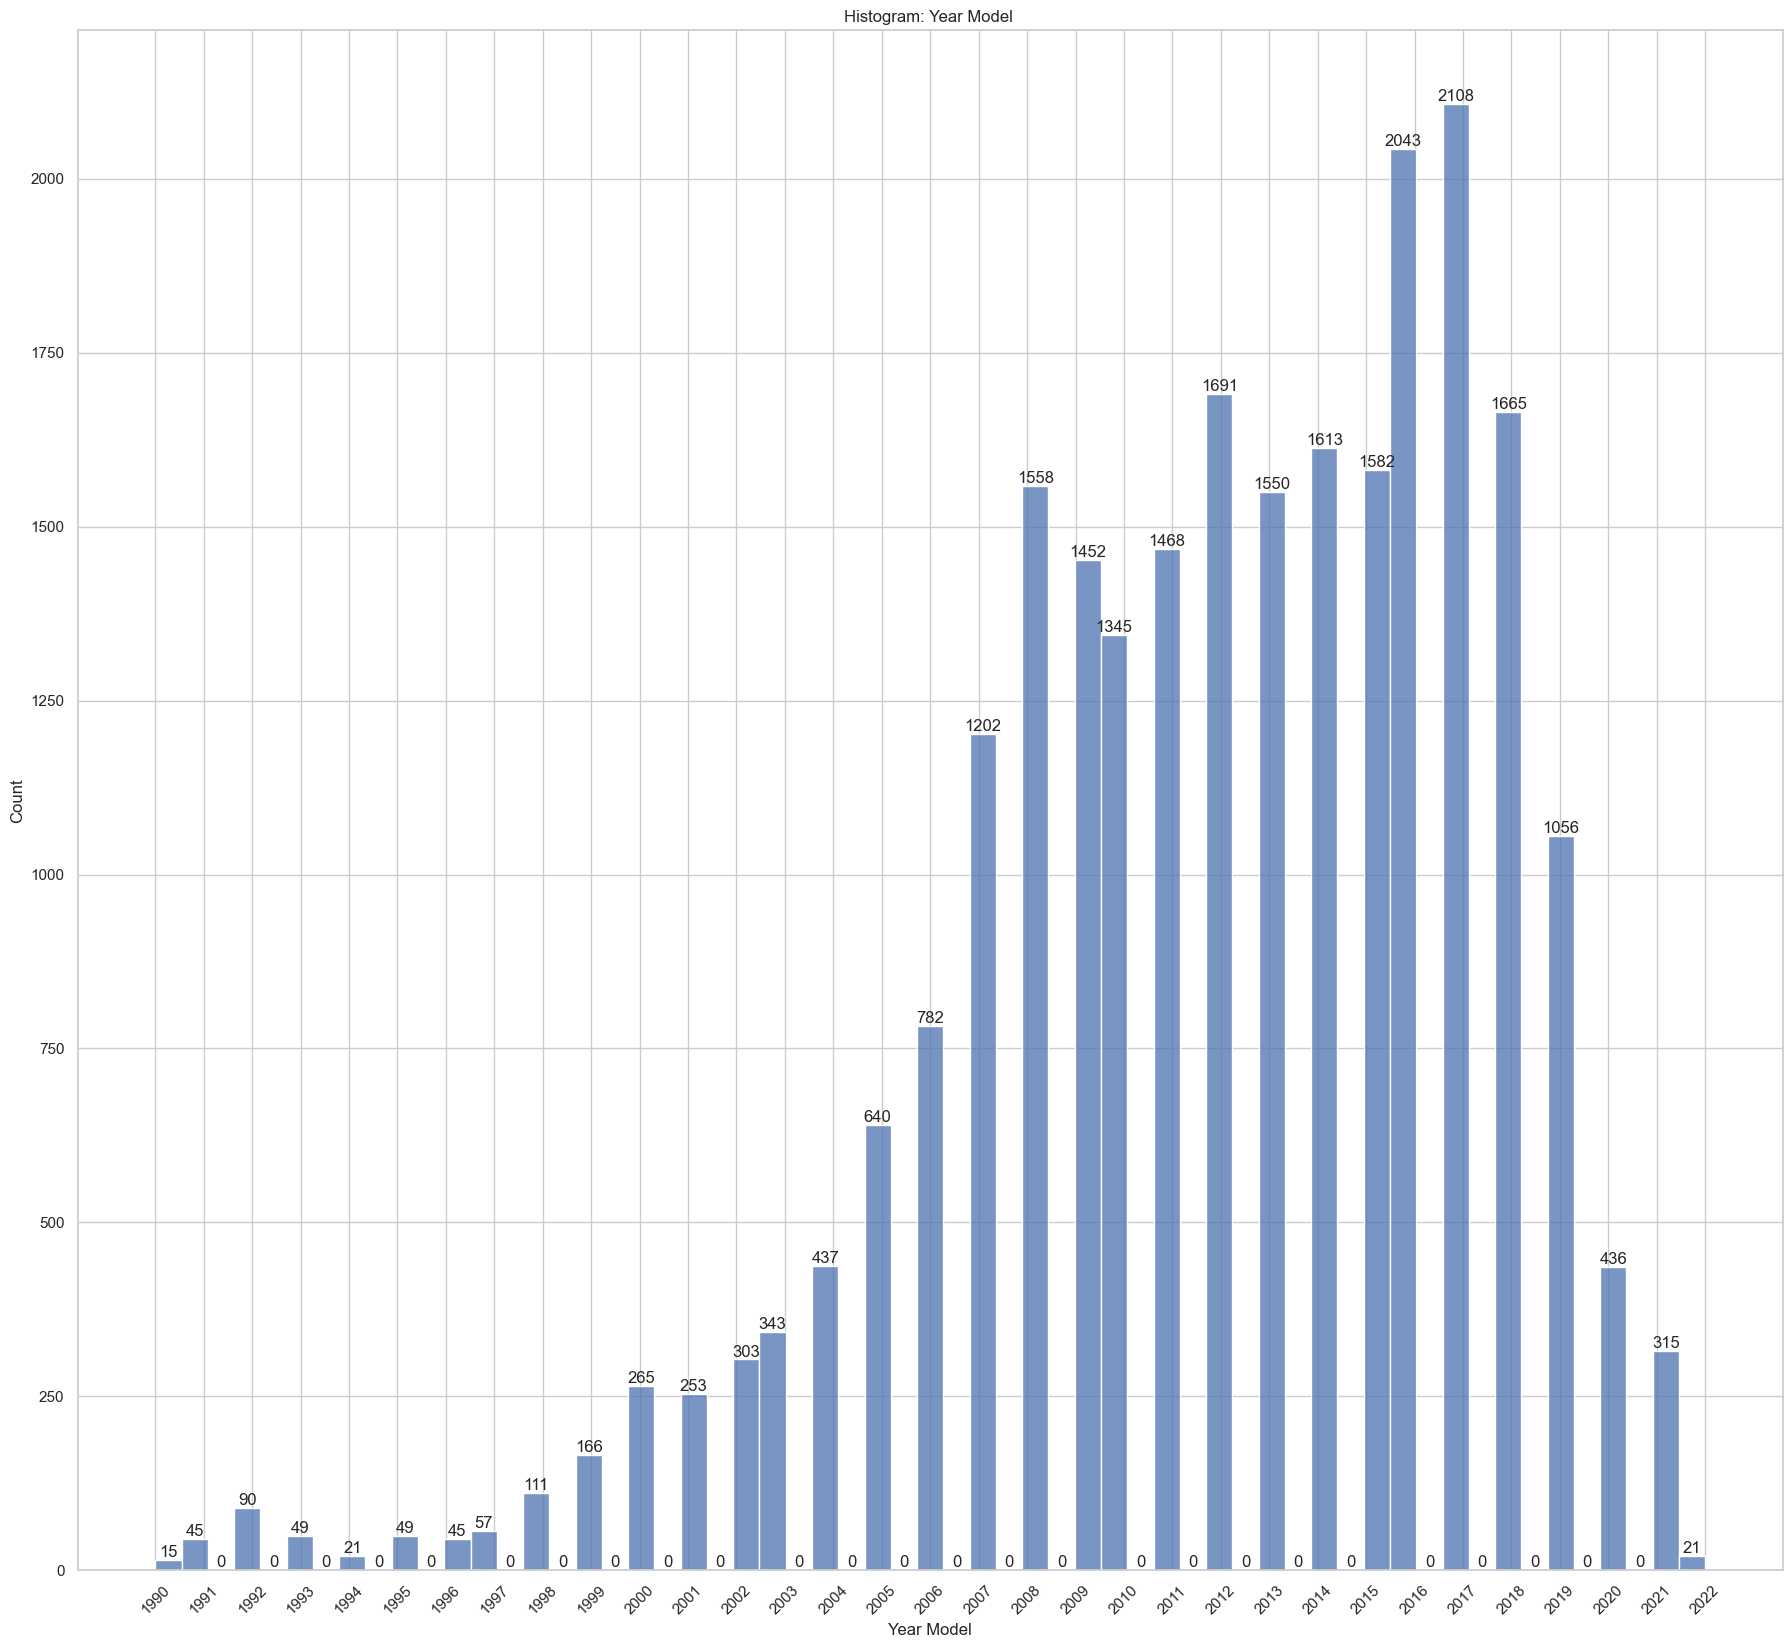

In [115]:
plt.figure(figsize=(22, 20))
histplot = sns.histplot(data=clean_raw_data, x='Année-Modèle')

plt.xlabel('Year Model')
plt.title('Histogram: Year Model ')

unique_years = sorted(clean_raw_data['Année-Modèle'].unique())
plt.xticks(unique_years, rotation=45)

# Annotate each bar with its corresponding frequency
for rect in histplot.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

plt.show()

In [126]:
clean_raw_data.columns

Index(['Marque', 'Modèle', 'Année-Modèle', 'Type de carburant',
       'Puissance fiscale', 'Boite de vitesses', 'Première main', 'État',
       'Prix', 'min_kilometrage', 'max_kilometrage'],
      dtype='object')

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


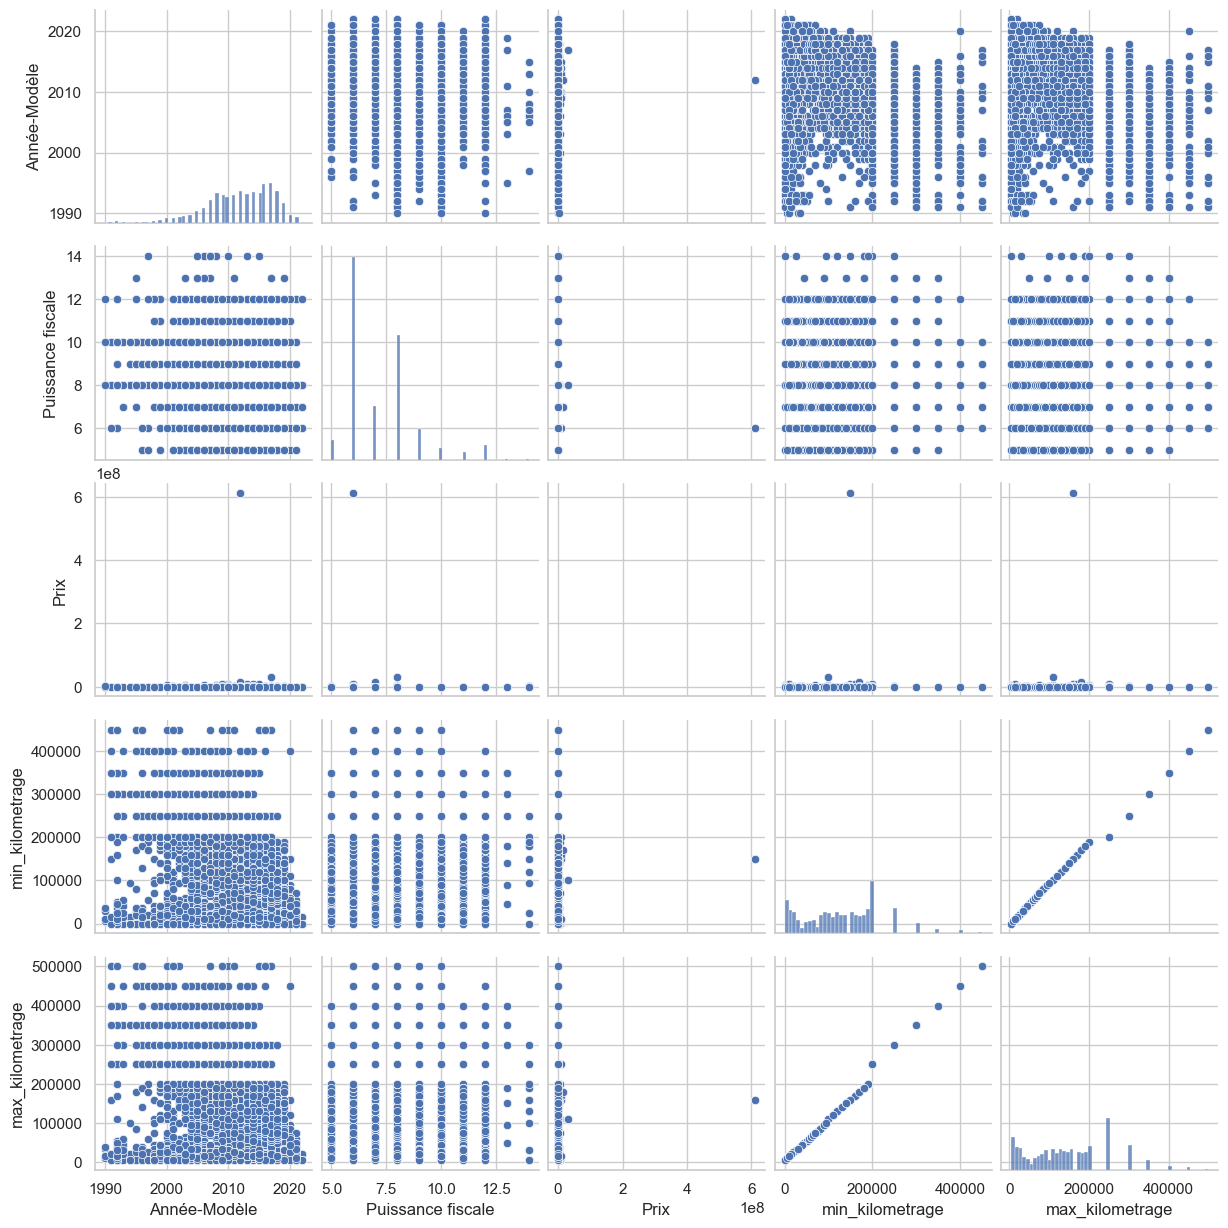

In [127]:
sns.pairplot(data=clean_raw_data)

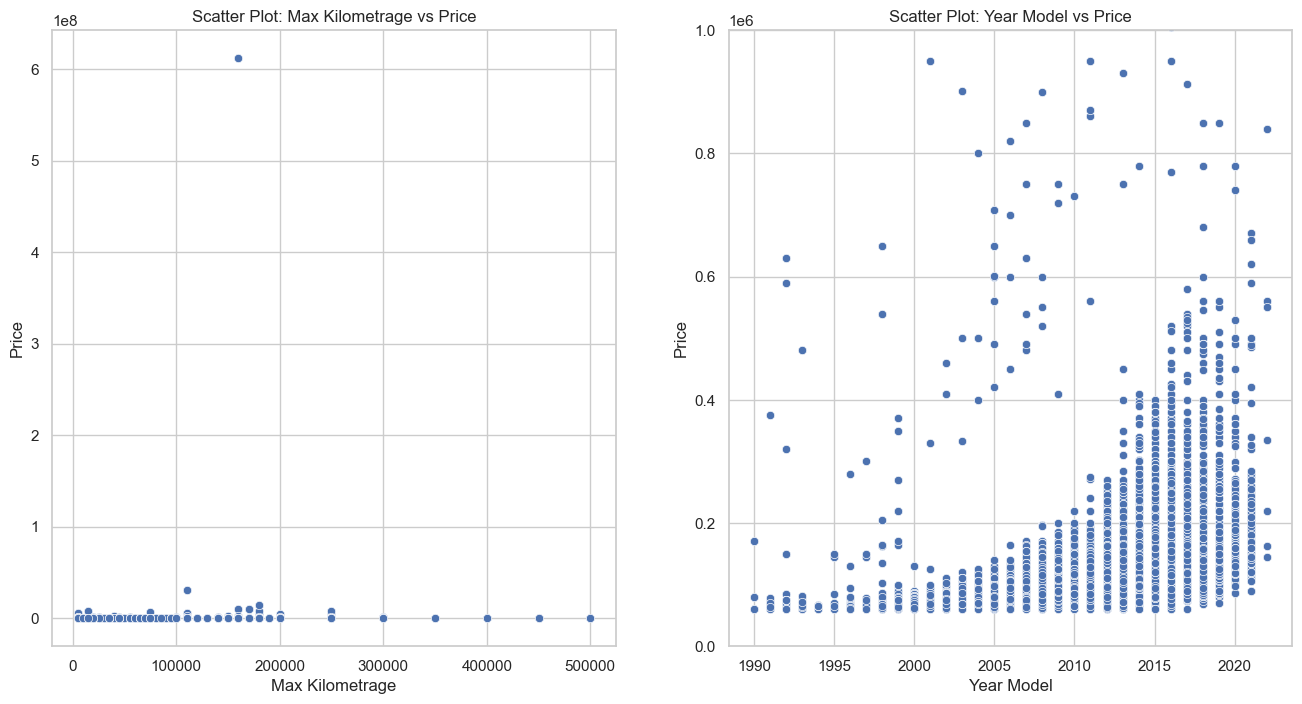

In [132]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Scatter plot for 'max_kilometrage' vs 'Prix'
sns.scatterplot(data=clean_raw_data, x='max_kilometrage', y='Prix', ax=axs[0])
axs[0].set_xlabel('Max Kilometrage')
axs[0].set_ylabel('Price')
axs[0].set_title('Scatter Plot: Max Kilometrage vs Price')
# Scatter plot for 'Année-Modèle' vs 'Prix'
sns.scatterplot(data=clean_raw_data, x='Année-Modèle', y='Prix', ax=axs[1])
axs[1].set_xlabel('Year Model')
axs[1].set_ylabel('Price')
axs[1].set_title('Scatter Plot: Year Model vs Price')
plt.ylim(-1, 1e6)
plt.show()

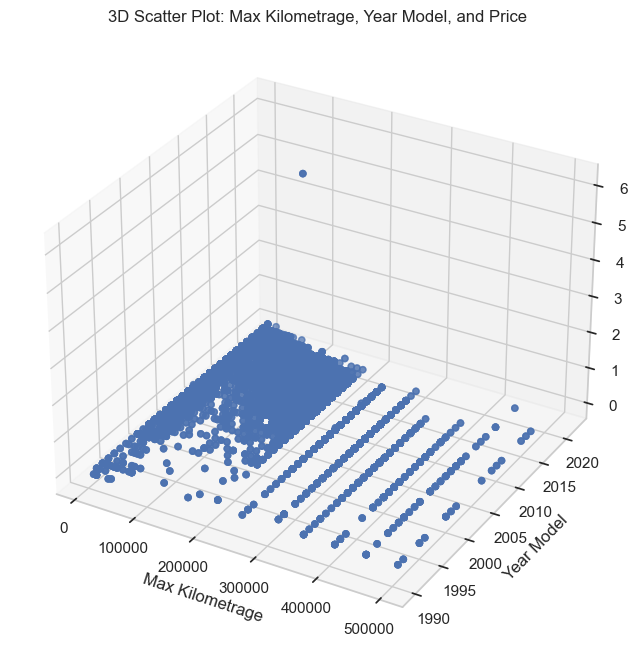

In [133]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract data
max_kilometrage = clean_raw_data['max_kilometrage']
prix = clean_raw_data['Prix']
annee_modele = clean_raw_data['Année-Modèle']

# Plot the data points
ax.scatter(max_kilometrage, annee_modele, prix, c='b', marker='o')

# Set labels
ax.set_xlabel('Max Kilometrage')
ax.set_ylabel('Year Model')
ax.set_zlabel('Price')

plt.title('3D Scatter Plot: Max Kilometrage, Year Model, and Price')
plt.show()

In [134]:
# let's analyse the variable Modèle
clean_raw_data.columns

Index(['Marque', 'Modèle', 'Année-Modèle', 'Type de carburant',
       'Puissance fiscale', 'Boite de vitesses', 'Première main', 'État',
       'Prix', 'min_kilometrage', 'max_kilometrage'],
      dtype='object')

In [135]:
clean_raw_data.head()

Marque      Modèle  Année-Modèle Type de carburant  Puissance fiscale  \
0        Fiat       Punto          2007            Diesel                  5   
1       Dacia  Dokker Van          2013            Diesel                  6   
2       Dacia      Dokker          2014            Diesel                  6   
3  Volkswagen     Touareg          2005            Diesel                 10   
4      Toyota       Prado          2007            Diesel                 12   

  Boite de vitesses Première main       État   Prix  min_kilometrage  \
0          Manuelle           Non   Très bon  60000           200000   
1          Manuelle           Non  Excellent  70000           400000   
2          Manuelle           NaN   Très bon  90000           160000   
3       Automatique           Oui  Excellent  90000                0   
4          Manuelle           Non  Excellent  97000           200000   

   max_kilometrage  
0           249999  
1           449999  
2           169999  
3             4999  
4           249999

In [136]:
clean_raw_data['Année-Modèle'] = clean_raw_data['Année-Modèle'].astype('object')


In [146]:
clean_raw_data['Boite de vitesses'].describe()

count        24776
unique           3
top       Manuelle
freq         17452
Name: Boite de vitesses, dtype: object

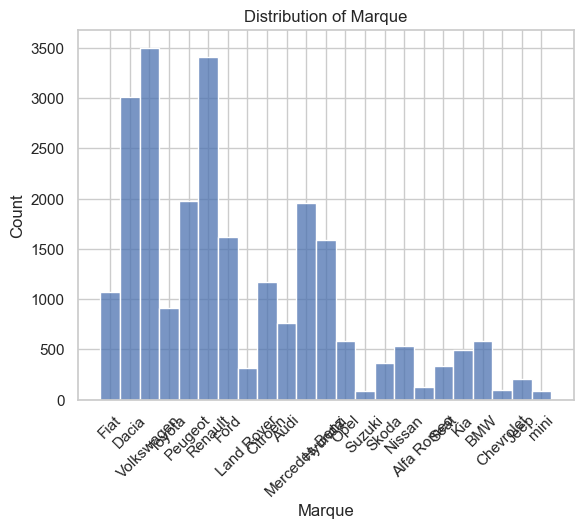

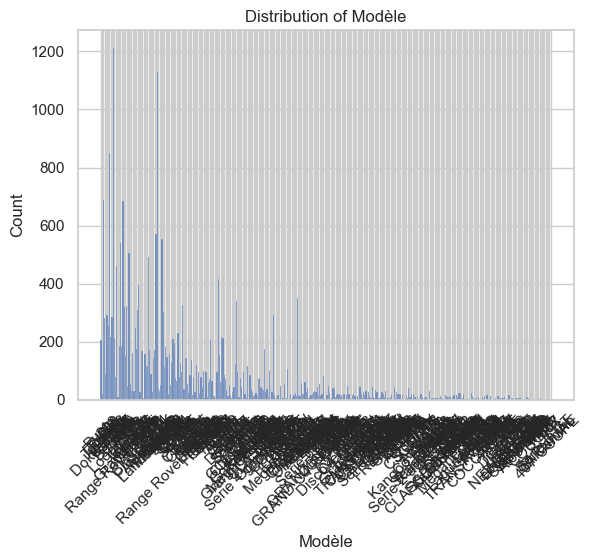

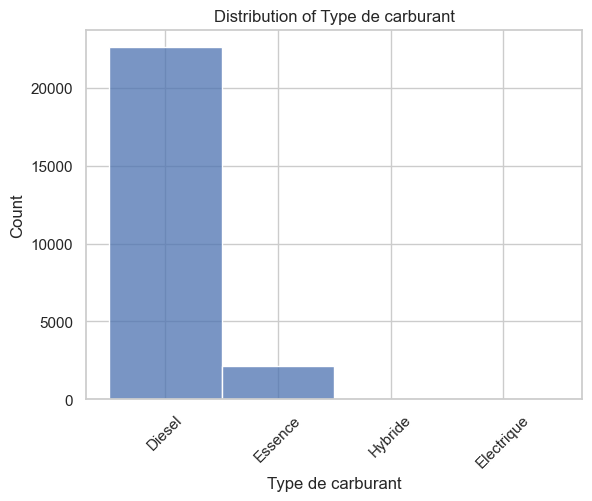

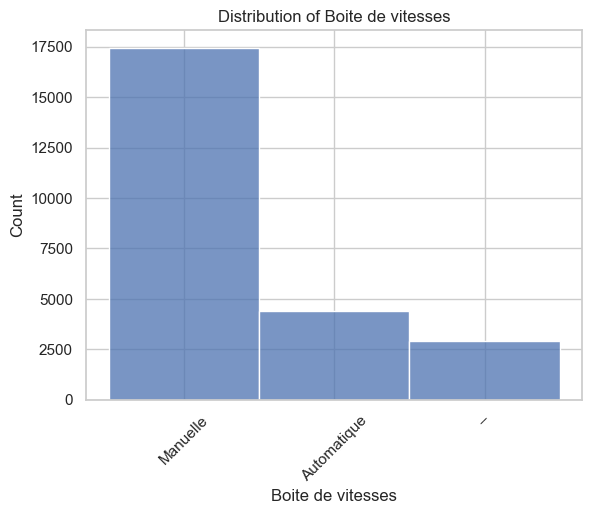

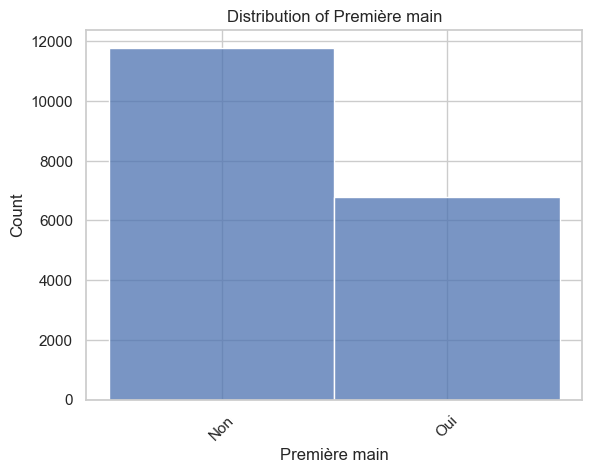

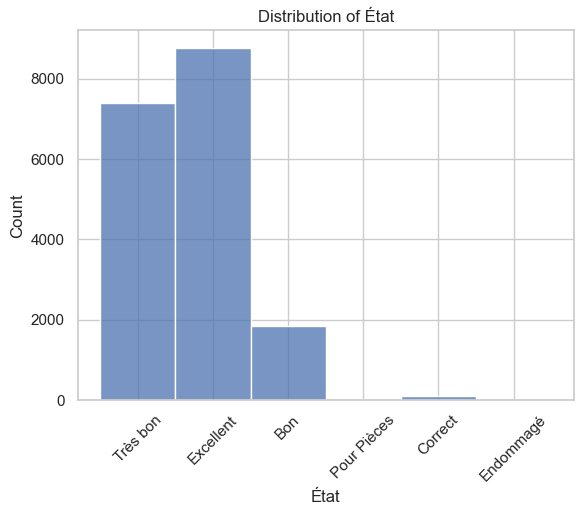

In [225]:
for col in subset.select_dtypes('object'):
    
    plt.figure()
    sns.histplot(data=clean_raw_data,x=col)
    plt.xticks(rotation=45)

    plt.title(f'Distribution of {col}')
    plt.show()


In [158]:
categoricals =['Marque', 'Modèle', 'Année-Modèle', 'Type de carburant', 'Boite de vitesses', 'Première main', 'État']

def pltCountplot(cats):
    
    fig, axis = plt.subplots(len(cats) // 3,3, figsize=(20,12))  

    index = 0
    for i in range(len(cats) // 3):
        for j in range(3):
            
            ax = sns.countplot(x=cats[index], data=clean_raw_data, ax=axis[i][j])
            if cats[index] in ['Année-Modèle', 'Modèle','Marque']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)

                
            
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(clean_raw_data)*100),
                        ha="center") 
            index += 1

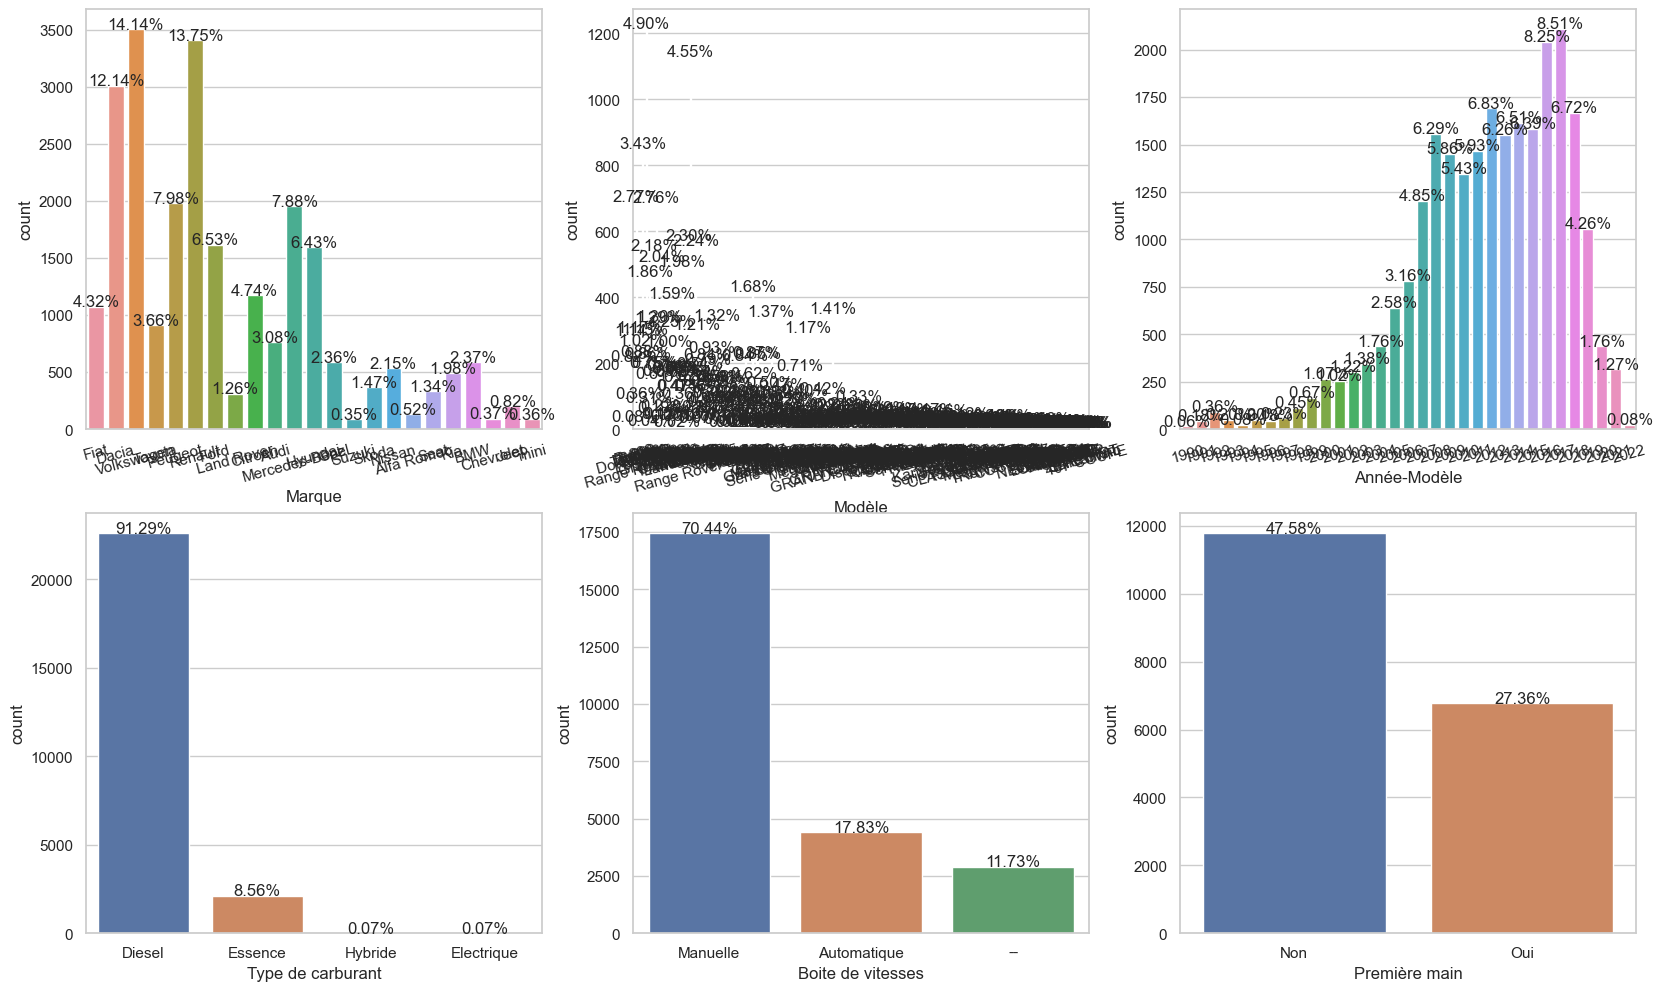

<Figure size 2200x2000 with 0 Axes>

<Figure size 2200x2000 with 0 Axes>

<Figure size 2200x2000 with 0 Axes>

In [159]:
pltCountplot(categoricals)

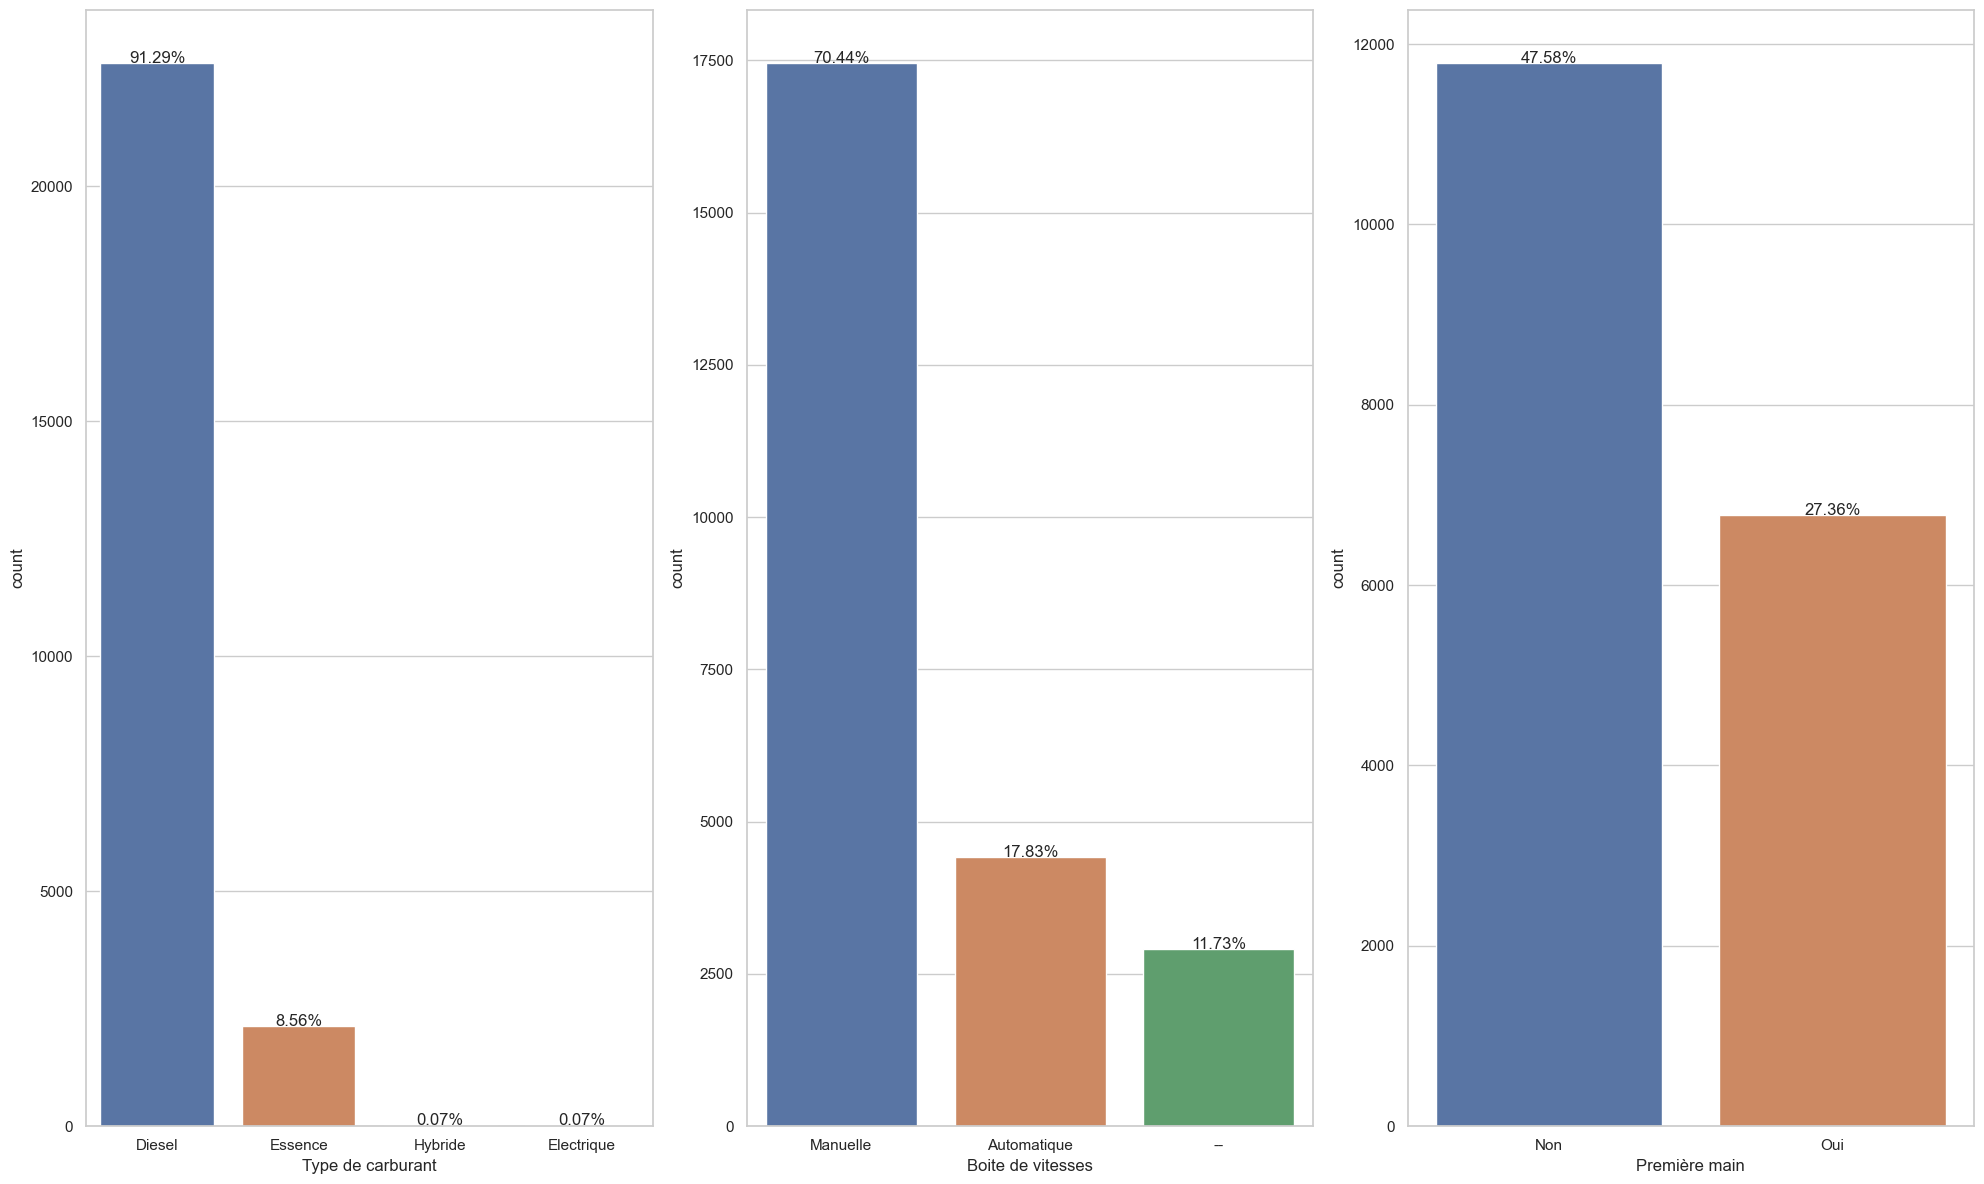

In [213]:
cats =[ 'Type de carburant', 'Boite de vitesses', 'Première main', 'État']

def pltCountplot(cats):
    fig, axis = plt.subplots(len(cats) // 3, 3, figsize=(20, 12))

    index = 0
    for ax in axis.flatten():
        if index > len(cats):
            break

        sns.countplot(x=cats[index], data=clean_raw_data, ax=ax)

        # Add percentage annotations
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 3,
                    '{:1.2f}%'.format(height / len(clean_raw_data) * 100),
                    ha="center")
        index += 1

pltCountplot(cats)
plt.tight_layout()
plt.show()

- the number of Manuelle category in boite de vitesse is higher than the other categories
- the number of category Non  in   Premiére main is higher than Oui 


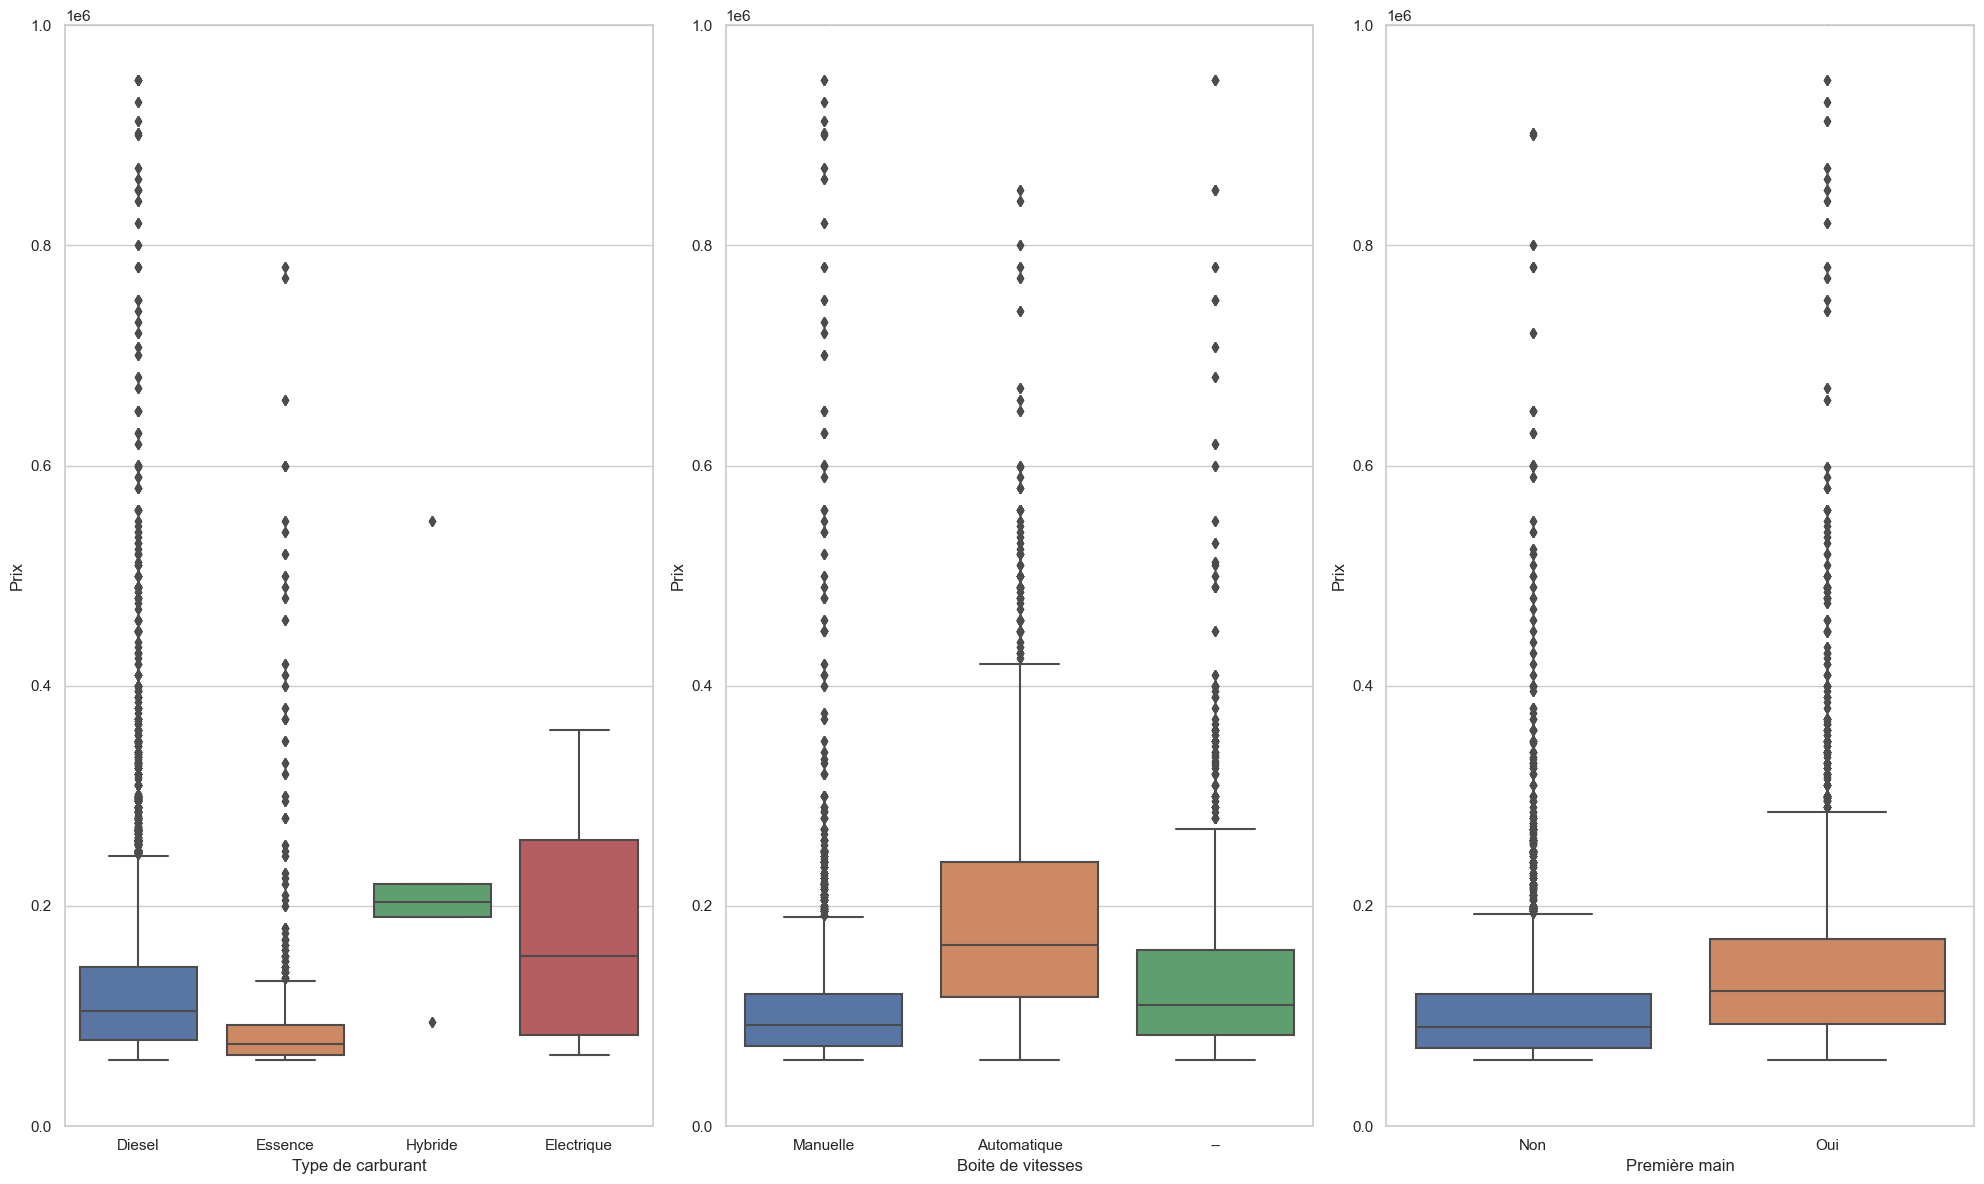

In [175]:
def pltCountplot(cats):
    fig, axis = plt.subplots(len(cats) // 3, 3, figsize=(20, 12))

    index = 0
    for ax in axis.flatten():
        if index >= len(cats):
            break

        sns.boxplot(x=cats[index], y='Prix', data=clean_raw_data, ax=ax)  

        index += 1
    
    # Set y-axis limit for all subplots
    for ax in axis.flatten():
        ax.set_ylim(0.0, 1e6)

pltCountplot(cats)
plt.tight_layout()
plt.show()

- the price of Automatique cars is higher on average than the other cars 
- the cars that has only one owner there price is higher on average compared by the cars that has more than one owner


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2200x3300 with 0 Axes>

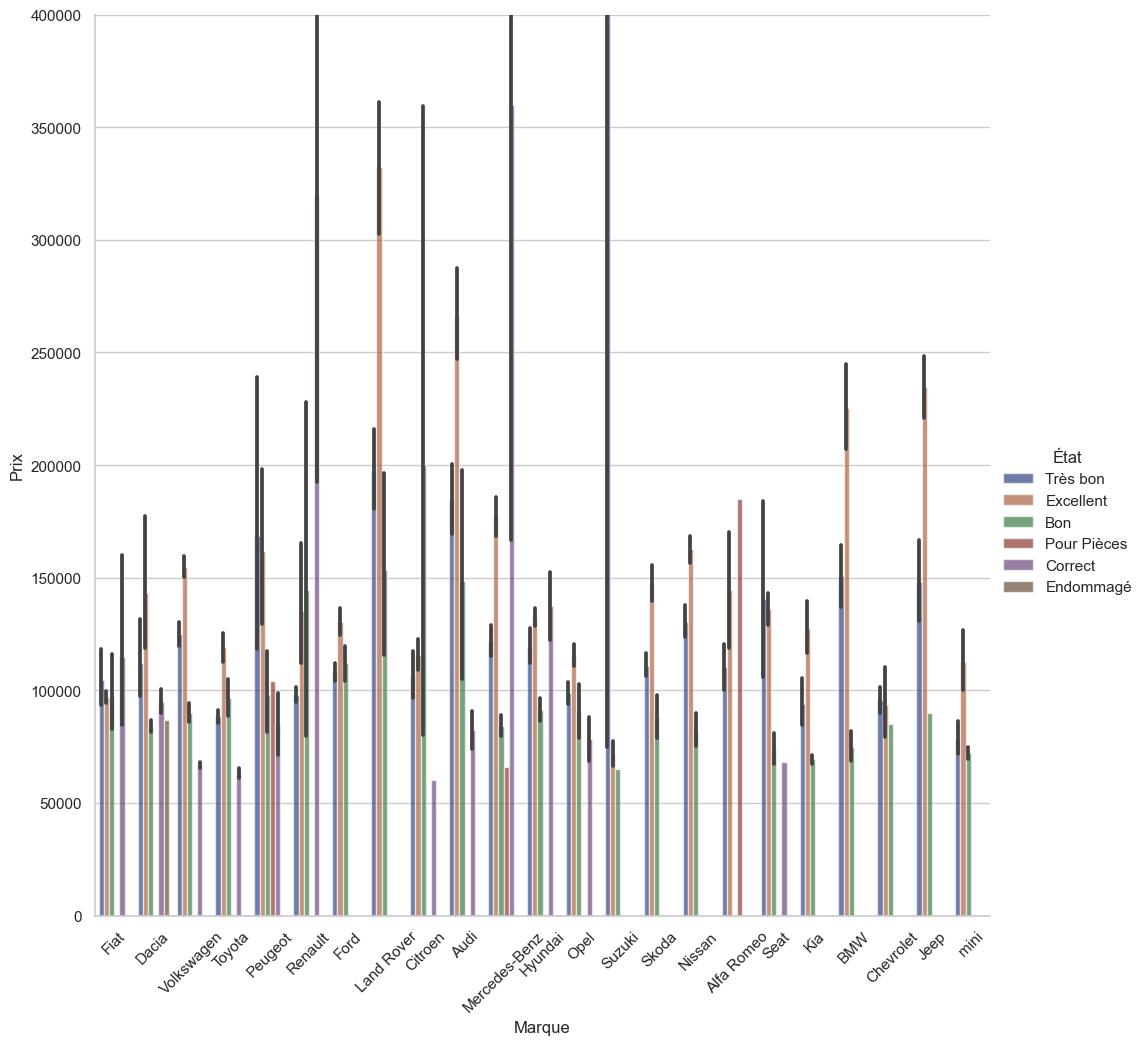

In [214]:
plt.figure(figsize=(22, 33))
sns.catplot(data=clean_raw_data, kind="bar", x="Marque", y="Prix", hue="État", palette="dark", alpha=.6, height=10)
plt.ylim(0,0.4e6)
plt.xticks(rotation=45)

plt.show()

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2200x3300 with 0 Axes>

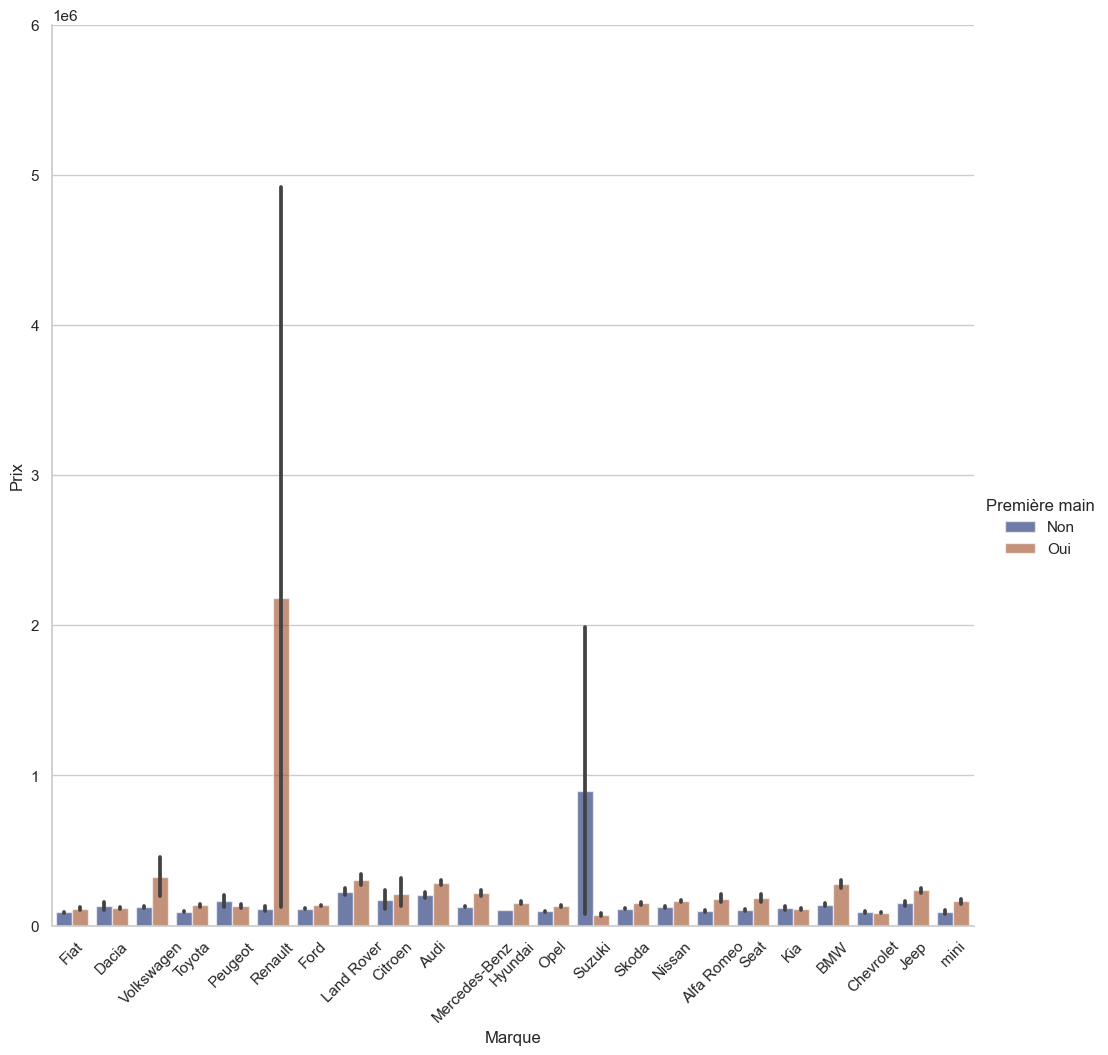

In [219]:
plt.figure(figsize=(22, 33))
sns.catplot(data=clean_raw_data, kind="bar", x="Marque", y="Prix", hue='Première main', palette="dark", alpha=.6, height=10)
plt.ylim(0,0.6e7)
plt.xticks(rotation=45)

plt.show()


- the price of suzuki that has more than one owner is higher than that has one owner , but the others 'marque' the cars that has just one owner is expensive than the cars that has more than one owner
- **hypothesis :**  we already observe that suzuki it doesnt exist alot in our dataset i think that's why we observe that result. and also the suzuki cars in 'Etat' we see that cat 'Tres bon' is higher than the others and there is no suzuki cars  in lower status so maybe the status of the cars is more important than if it has one or more owner
- Land Rover as we observe before is more expensive than the others cars even we have a few of them in our dataset and we observe here that in price there is not a big diffrence between land rover cars that has one or more owner but we observe that there is no Land rover cars in lower status 

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2200x3300 with 0 Axes>

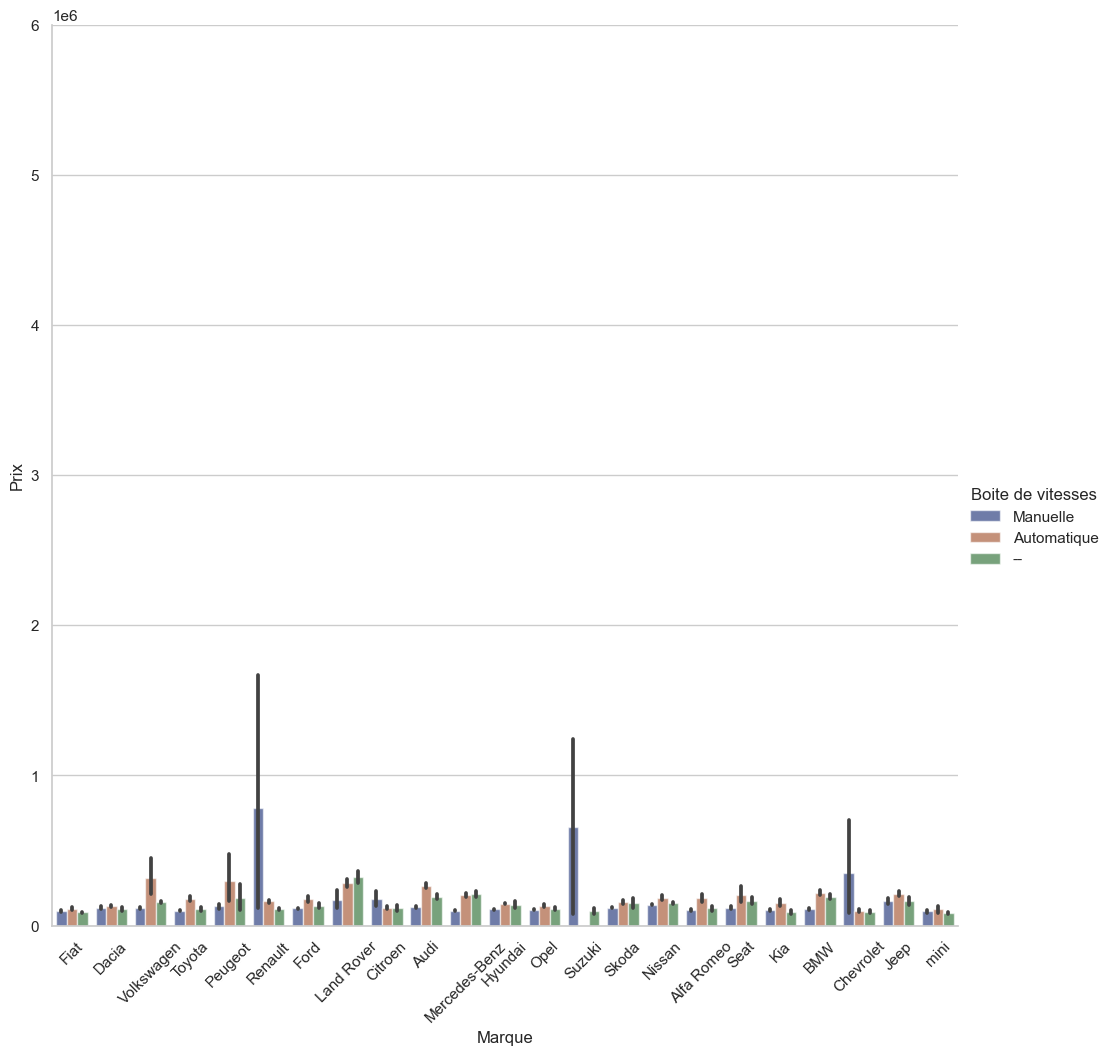

In [221]:
# Marque by Prix and Boite de vitesses
plt.figure(figsize=(22, 33))
sns.catplot(data=clean_raw_data, kind="bar", x="Marque", y="Prix", hue='Boite de vitesses', palette="dark", alpha=.6, height=10)
plt.ylim(0,0.6e7)
plt.xticks(rotation=45)

plt.show()

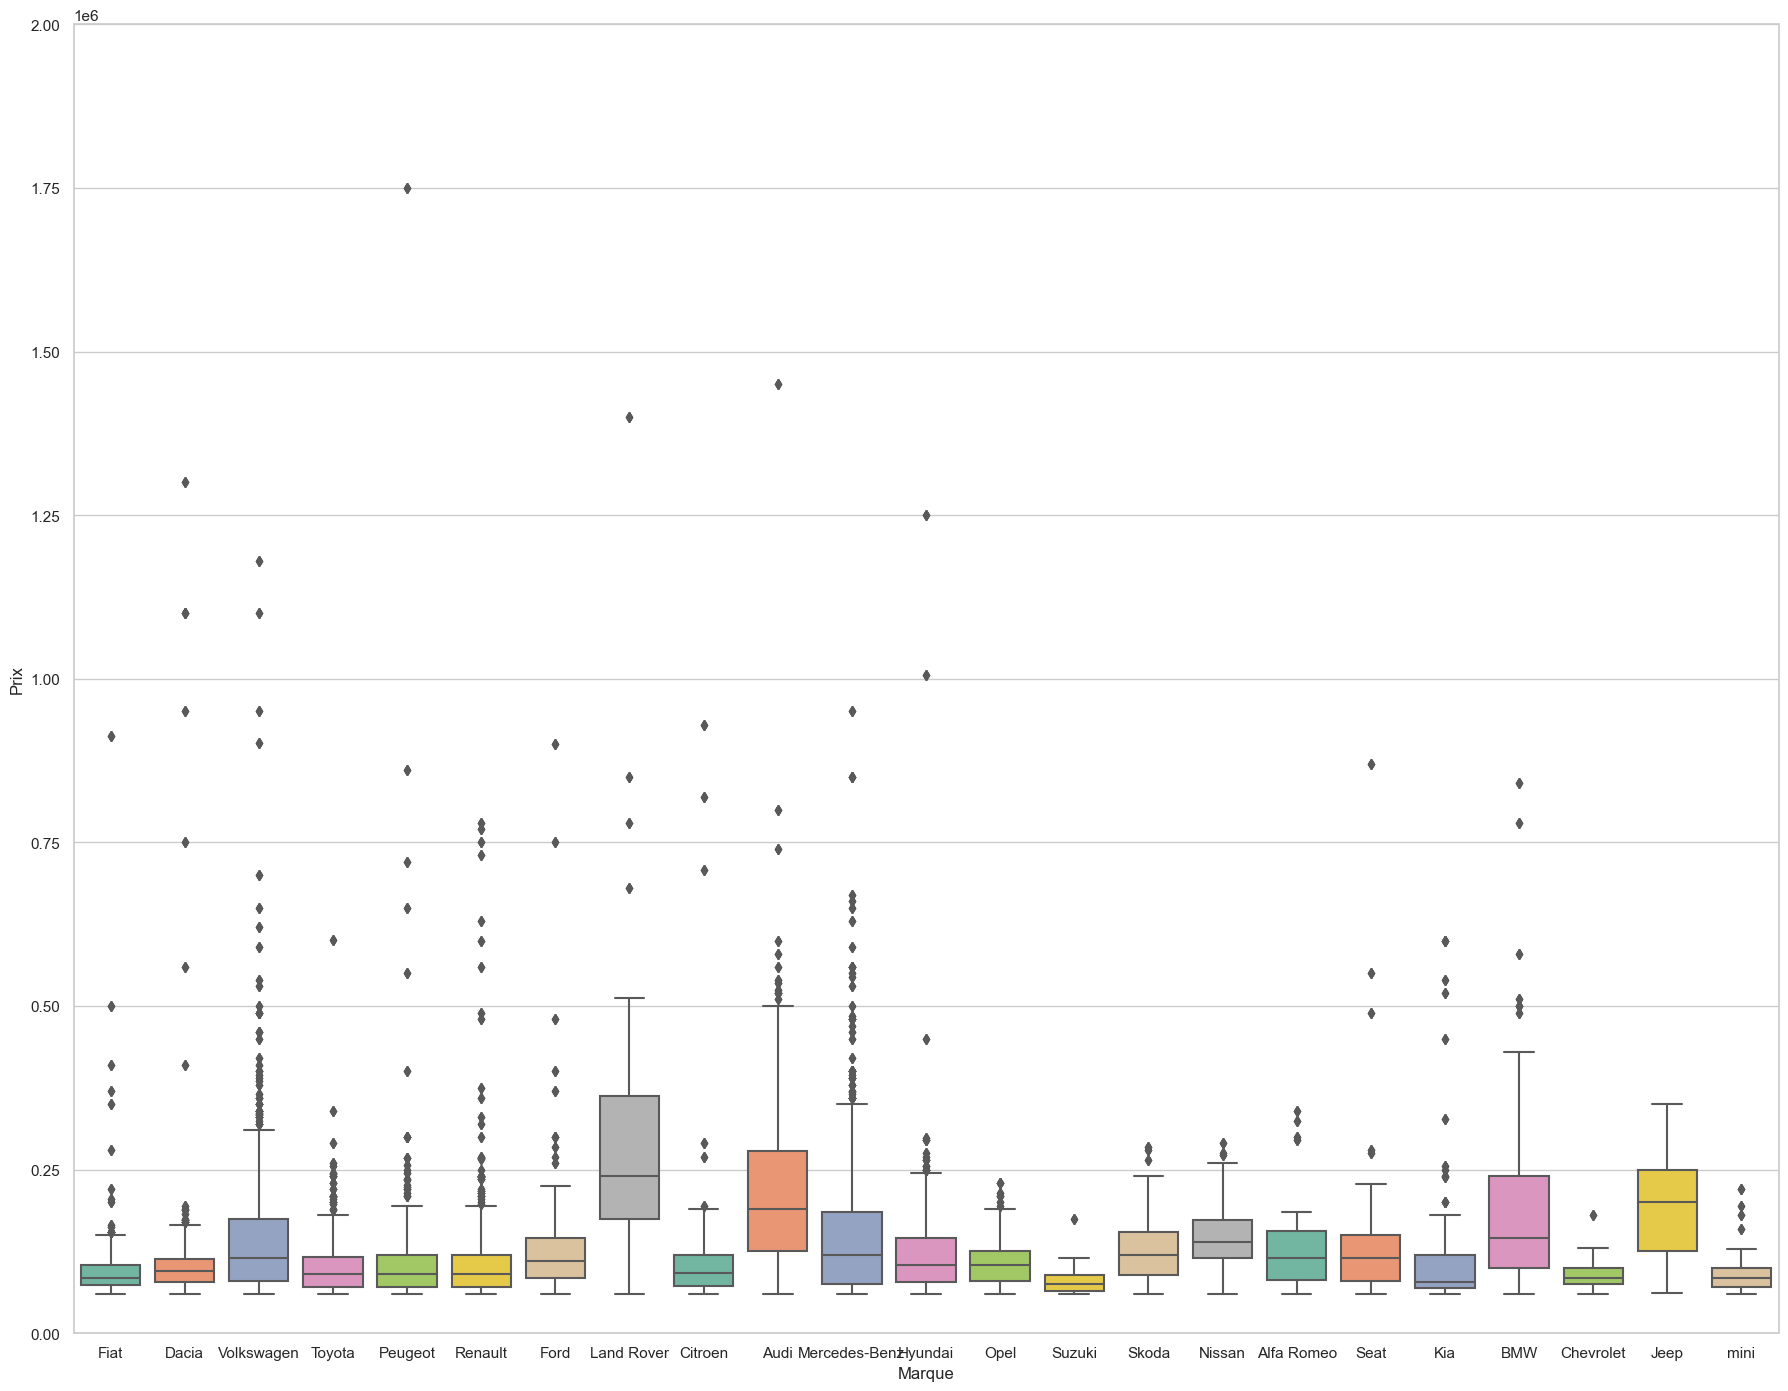

In [224]:
# "price" by "marque"
plt.figure(figsize=(22, 17))
sns.boxplot(data = clean_raw_data ,x='Marque',y='Prix', palette='Set2')
plt.ylim(0.0,2e6)
plt.show()

- We already observed that cars with 'Automatique' transmissions are more expensive than other cars. This observation is further confirmed here, as we see that among the cheapest cars, the number of 'Manuelle' transmissions is greater than 'Automatique' transmissions.
- This observation is consistent with common knowledge in the automotive industry, as automatic transmissions often come with additional cost due to their complexity and convenience features. Therefore, it's expected that cars with automatic transmissions would generally have higher prices compared to those with manual transmissions.







D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2200x4300 with 0 Axes>

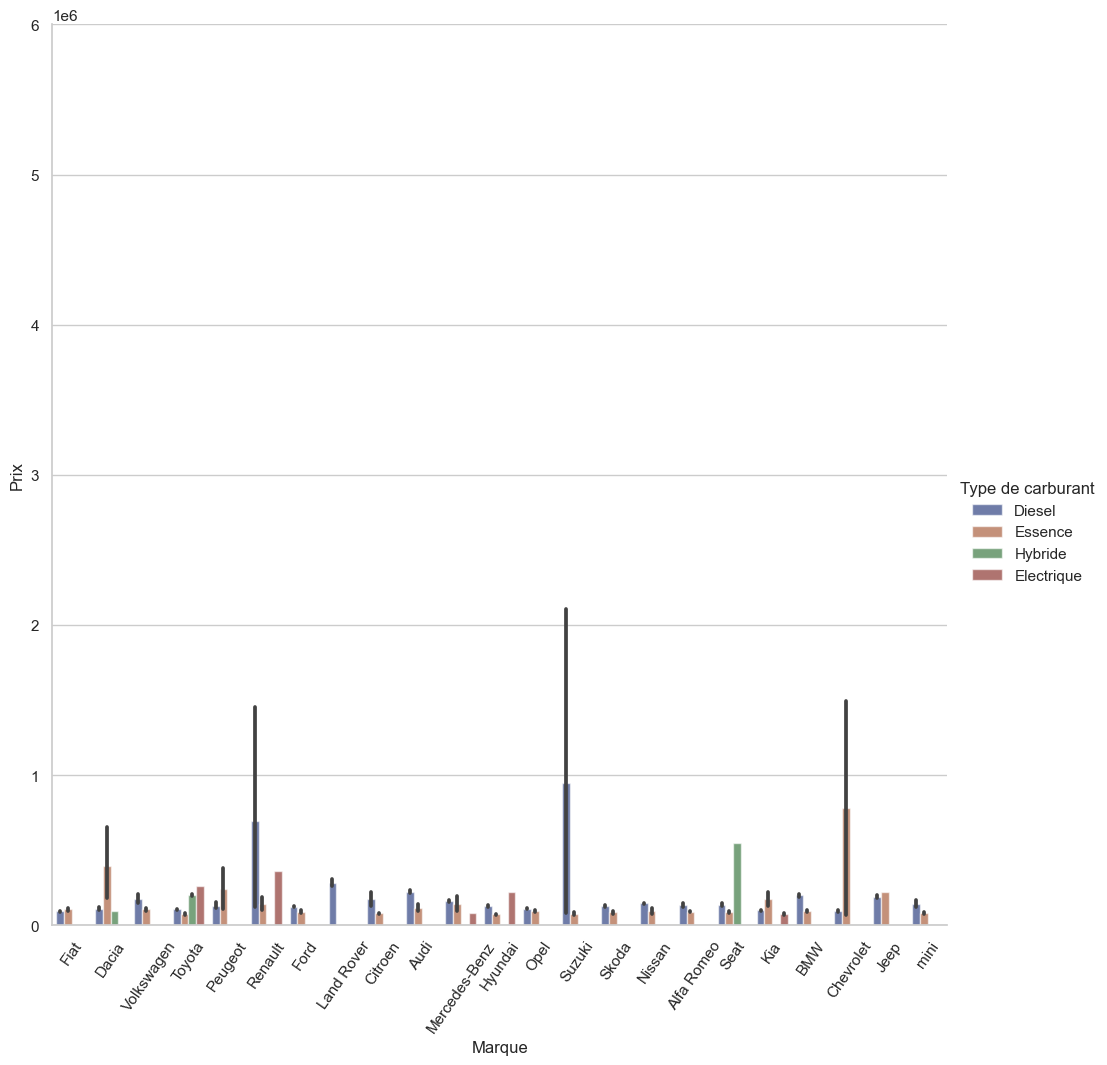

In [231]:
# Marque by Prix and 'Type de carburant'
plt.figure(figsize=(22, 43))
sns.catplot(data=clean_raw_data, kind="bar", x="Marque", y="Prix", hue='Type de carburant', palette="dark", alpha=.6, height=10)
plt.ylim(0,0.6e7)
plt.xticks(rotation=55)

plt.show()

- As we observed before, electric cars are generally more expensive than other cars. However, here we see that the most expensive cars do not have the 'Electrique' label. This suggests that the 'Type de carburant' may not have a significant influence on the price of the cars. but in the word of cars Electric cars often have higher upfront costs due to factors such as battery technology and manufacturing processes, which can contribute to their higher prices compared to traditional internal combustion engine vehicles. 
- ** hypothesis**  maybe  the popularity or availability of electric cars in Morocco may impact their representation in the market and their pricing.


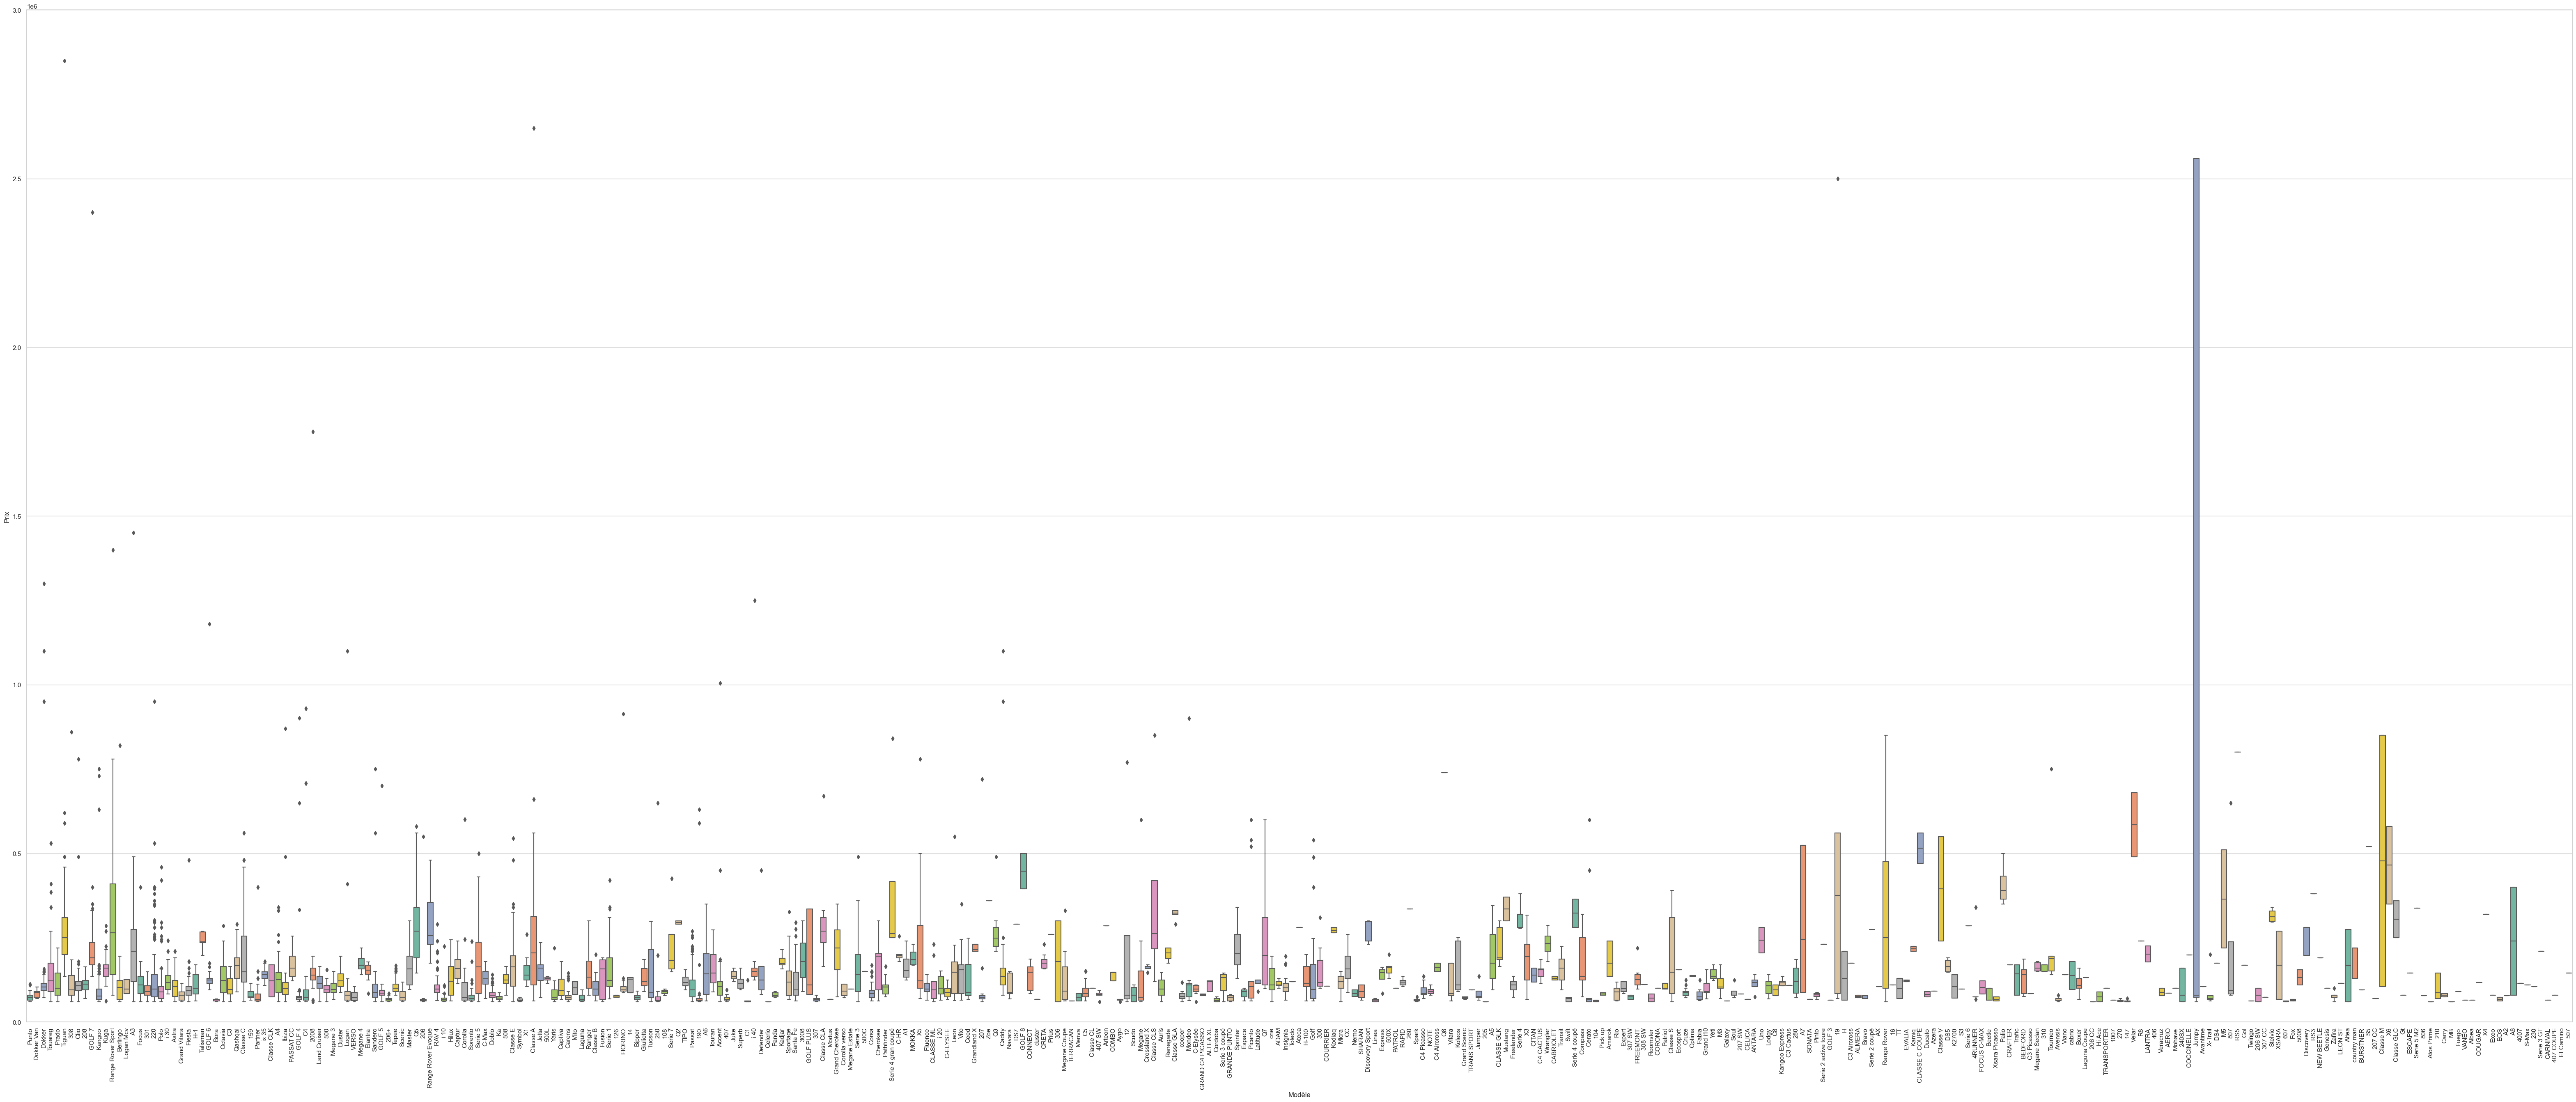

In [241]:
# "price" by 'Modèle'
plt.figure(figsize=(80, 32))
sns.boxplot(data = clean_raw_data ,x='Modèle',y='Prix', palette='Set2')
plt.xticks(rotation=90)

plt.ylim(0.0,3e6)
plt.show()

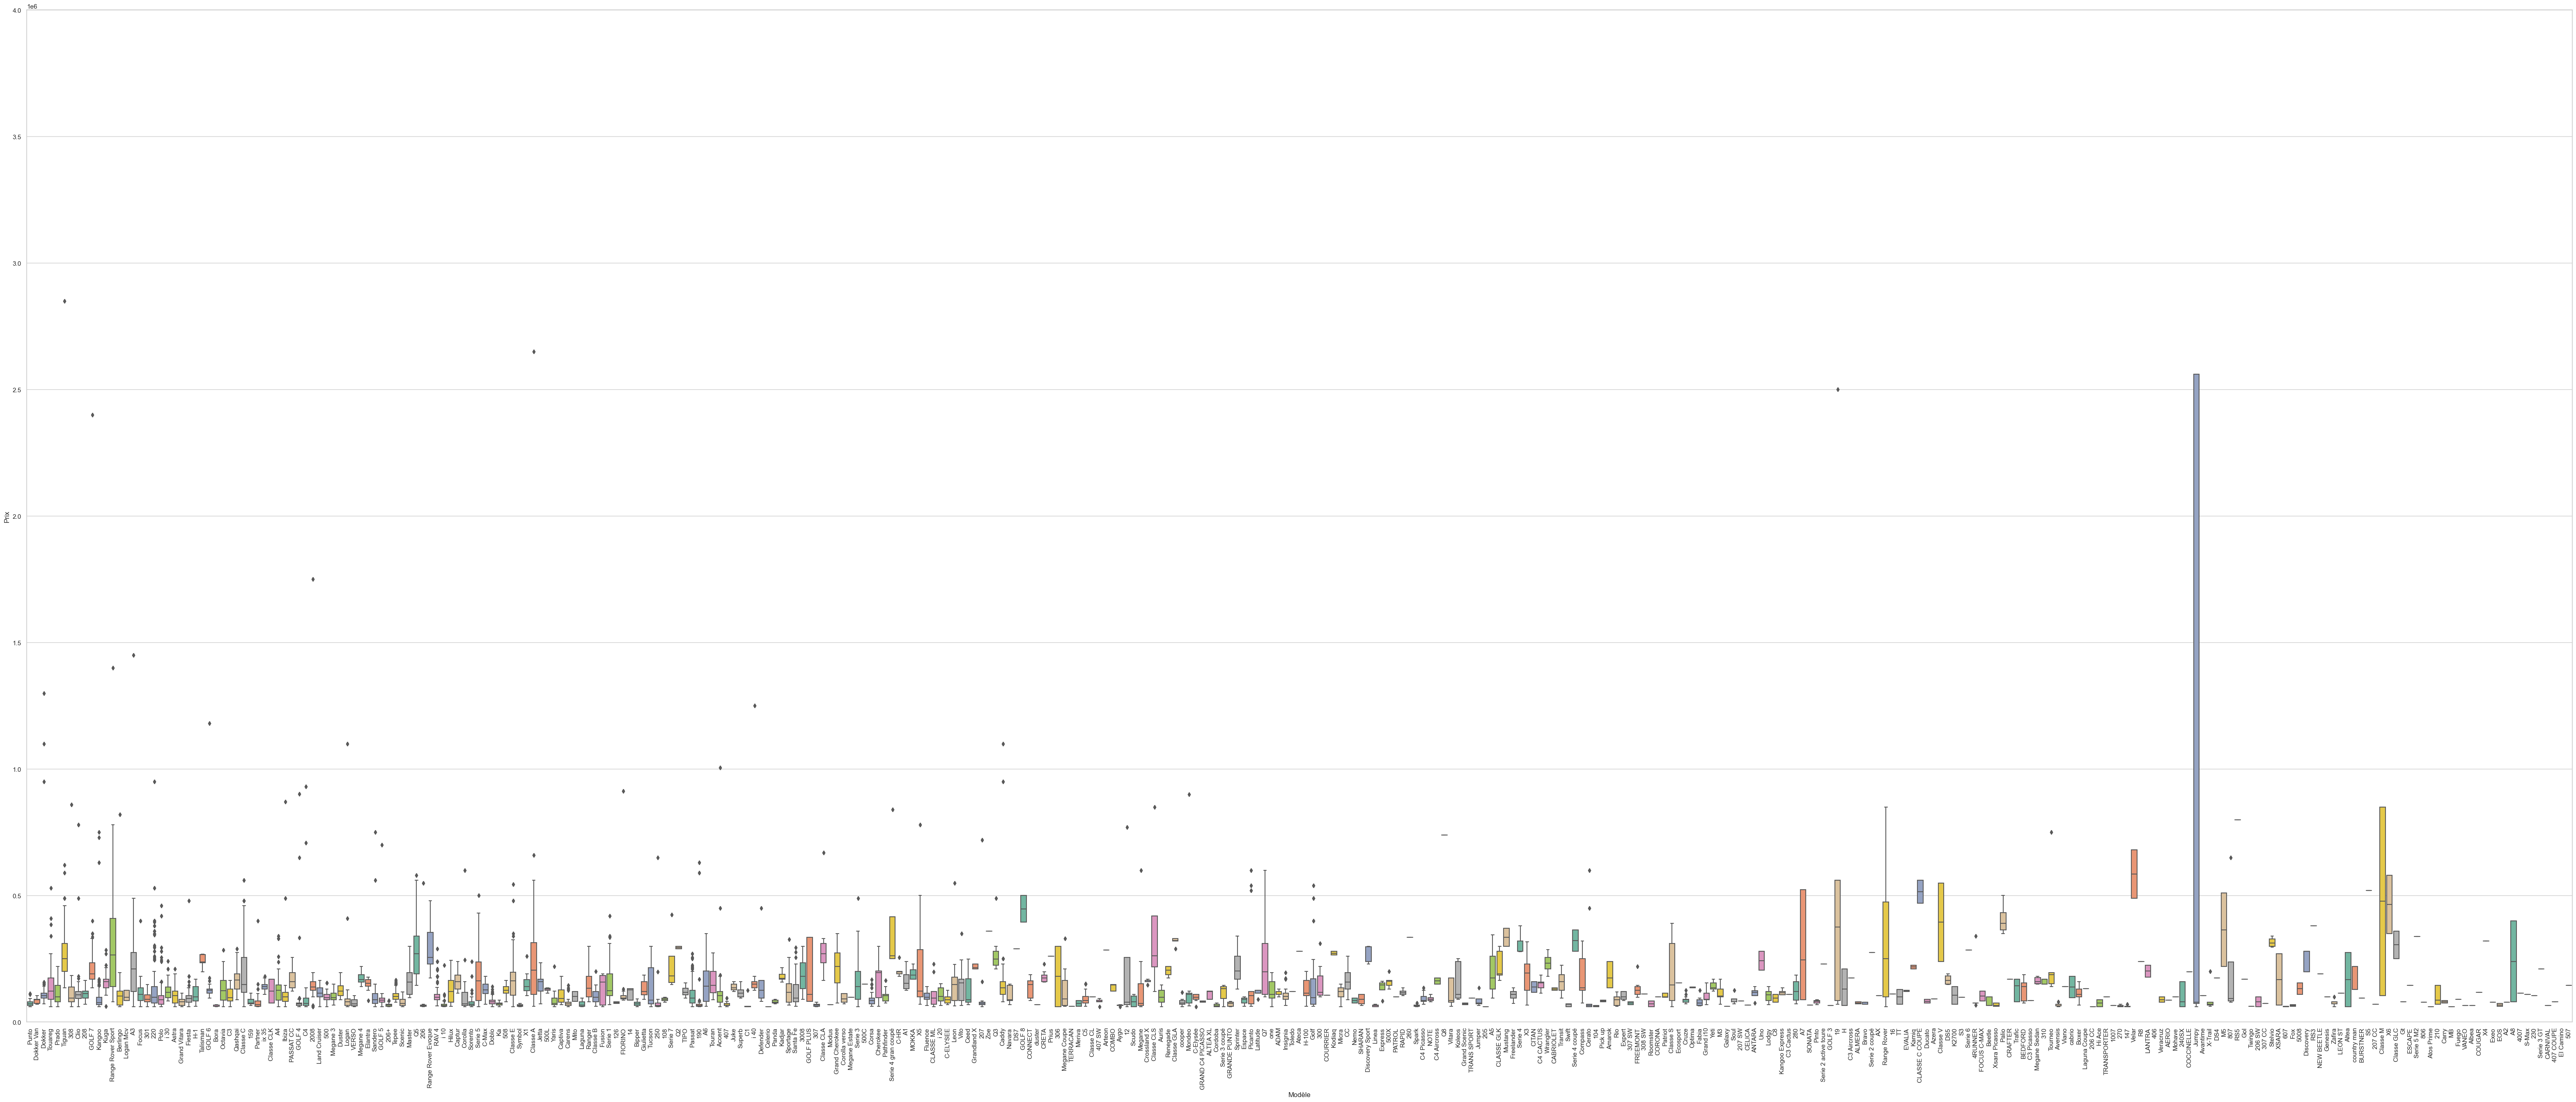

In [242]:
plt.figure(figsize=(80, 32))
sns.boxplot(data=clean_raw_data, x='Modèle', y='Prix', palette='Set2')
plt.xticks(rotation=90)
plt.ylim(0.0, 4e6)

# Save the plot as an image
plt.savefig('price_by_model_boxplot.png')

plt.show()

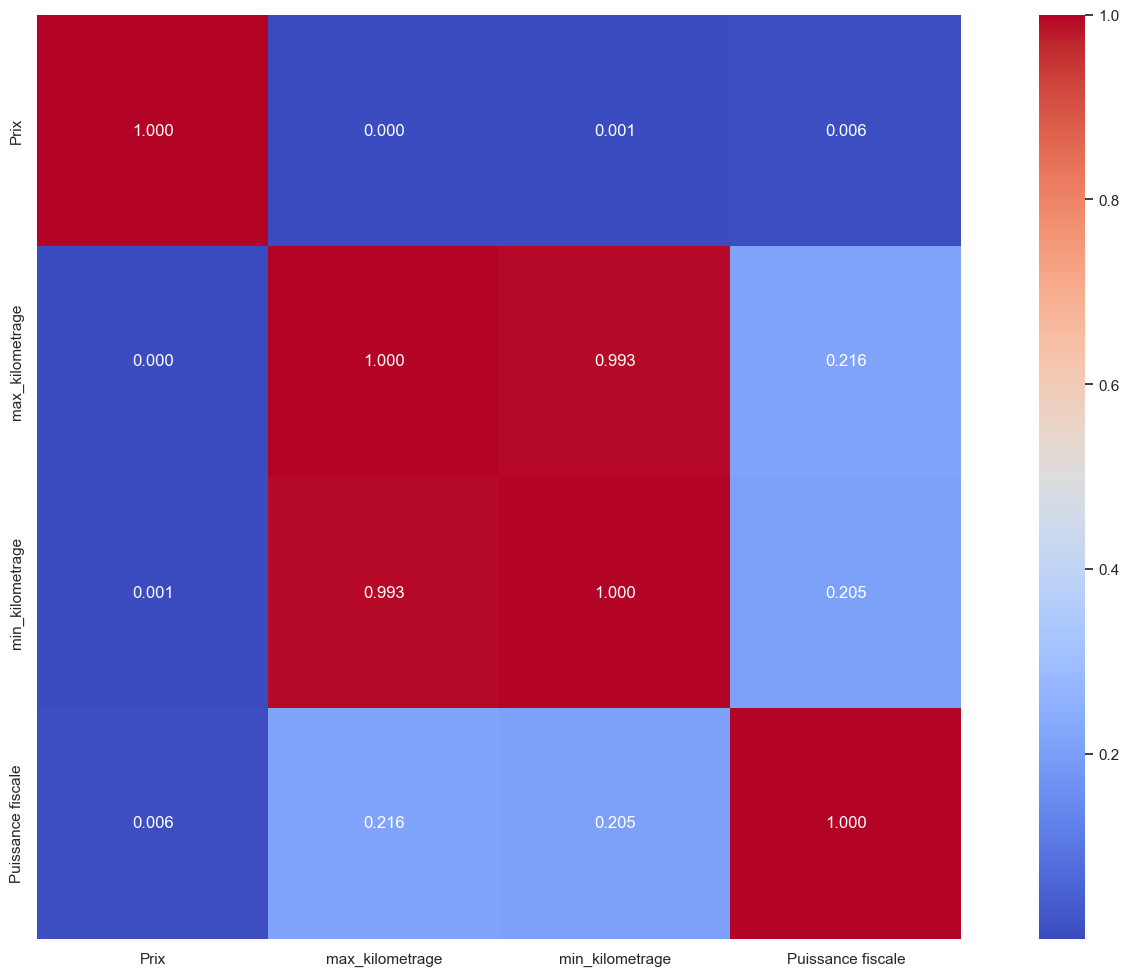

In [245]:
numeric_columns = ['Prix','max_kilometrage','min_kilometrage','Puissance fiscale']
corr_data = clean_raw_data.loc[:, numeric_columns].corr()

plt.figure(figsize=(20,12))
sns.heatmap(corr_data.abs(), annot=True, fmt='.3f',cmap='coolwarm',square=True)
plt.show()

In [244]:
clean_raw_data.columns

Index(['Marque', 'Modèle', 'Année-Modèle', 'Type de carburant',
       'Puissance fiscale', 'Boite de vitesses', 'Première main', 'État',
       'Prix', 'min_kilometrage', 'max_kilometrage'],
      dtype='object')

There is no strong correlation between the variables.

<h1>Data Preparation & Features Enginiring</h1>

In [246]:
clean_data_prepro=clean_raw_data

In [248]:
clean_data_prepro

Marque      Modèle Année-Modèle Type de carburant  \
0            Fiat       Punto         2007            Diesel   
1           Dacia  Dokker Van         2013            Diesel   
2           Dacia      Dokker         2014            Diesel   
3      Volkswagen     Touareg         2005            Diesel   
4          Toyota       Prado         2007            Diesel   
...           ...         ...          ...               ...   
24771        mini      cabrio         2011           Essence   
24772        mini      cooper         2007           Essence   
24773        mini         one         2006           Essence   
24774        mini      cooper         2010           Essence   
24775        mini      cooper         2008           Essence   

       Puissance fiscale Boite de vitesses Première main       État    Prix  \
0                      5          Manuelle           Non   Très bon   60000   
1                      6          Manuelle           Non  Excellent   70000   
2                      6          Manuelle           NaN   Très bon   90000   
3                     10       Automatique           Oui  Excellent   90000   
4                     12          Manuelle           Non  Excellent   97000   
...                  ...               ...           ...        ...     ...   
24771                  9          Manuelle           Oui  Excellent  180000   
24772                  9          Manuelle           Non   Très bon   63000   
24773                  8          Manuelle           Non        NaN   60000   
24774                  9       Automatique           NaN   Très bon   85000   
24775                  9          Manuelle           Non   Très bon   84000   

       min_kilometrage  max_kilometrage  
0               200000           249999  
1               400000           449999  
2               160000           169999  
3                    0             4999  
4               200000           249999  
...                ...              ...  
24771            70000            74999  
24772           190000           199999  
24773            10000            14999  
24774           140000           149999  
24775           180000           189999  

[24776 rows x 11 columns]

In [249]:
clean_data_prepro.isna().sum()

Marque                  0
Modèle                  0
Année-Modèle            0
Type de carburant       0
Puissance fiscale       0
Boite de vitesses       0
Première main        6209
État                 6678
Prix                    0
min_kilometrage         0
max_kilometrage         0
dtype: int64

In [267]:
# Première main 
_df_premier_main=clean_data_prepro.copy()
_df_premier_main['Première main'].isna().sum()

6209

In [255]:
import plotly.graph_objs as go


In [268]:
tr1=go.Box(x=_df_premier_main['Première main'],name='Première main Box Plot',boxmean=True)

fig = go.Figure(data=[tr1])
fig.show()

In [277]:
from sklearn.impute import SimpleImputer


# Create a SimpleImputer object with strategy='most_frequent'
imp = SimpleImputer(strategy='most_frequent')

# Reshape the column to a 2D array
premiere_main_column = _df_premier_main['Première main'].values.reshape(-1, 1)

# Perform imputation
premiere_main_column_imputed = imp.fit_transform(premiere_main_column)

# Convert the imputed array back to a 1D array
premiere_main_column_imputed = premiere_main_column_imputed.ravel()

# Update the 'Première main' column in the dataframe
_df_premier_main['Première main'] = premiere_main_column_imputed

# Check for missing values after imputation
print(_df_premier_main['Première main'].isna().sum())

0


In [278]:
premiere_main_column.shape

(24776, 1)

In [279]:
_df_premier_main['Première main']

0        Non
1        Non
2        Non
3        Oui
4        Non
        ... 
24771    Oui
24772    Non
24773    Non
24774    Non
24775    Non
Name: Première main, Length: 24776, dtype: object

In [280]:
_df_premier_main['Première main'].isna().sum()

0

In [281]:
_df_premier_main

Marque      Modèle Année-Modèle Type de carburant  \
0            Fiat       Punto         2007            Diesel   
1           Dacia  Dokker Van         2013            Diesel   
2           Dacia      Dokker         2014            Diesel   
3      Volkswagen     Touareg         2005            Diesel   
4          Toyota       Prado         2007            Diesel   
...           ...         ...          ...               ...   
24771        mini      cabrio         2011           Essence   
24772        mini      cooper         2007           Essence   
24773        mini         one         2006           Essence   
24774        mini      cooper         2010           Essence   
24775        mini      cooper         2008           Essence   

       Puissance fiscale Boite de vitesses Première main       État    Prix  \
0                      5          Manuelle           Non   Très bon   60000   
1                      6          Manuelle           Non  Excellent   70000   
2                      6          Manuelle           Non   Très bon   90000   
3                     10       Automatique           Oui  Excellent   90000   
4                     12          Manuelle           Non  Excellent   97000   
...                  ...               ...           ...        ...     ...   
24771                  9          Manuelle           Oui  Excellent  180000   
24772                  9          Manuelle           Non   Très bon   63000   
24773                  8          Manuelle           Non        NaN   60000   
24774                  9       Automatique           Non   Très bon   85000   
24775                  9          Manuelle           Non   Très bon   84000   

       min_kilometrage  max_kilometrage  
0               200000           249999  
1               400000           449999  
2               160000           169999  
3                    0             4999  
4               200000           249999  
...                ...              ...  
24771            70000            74999  
24772           190000           199999  
24773            10000            14999  
24774           140000           149999  
24775           180000           189999  

[24776 rows x 11 columns]

In [309]:
# Etat
_df_etat=_df_premier_main.copy(deep=True)
_df_etat['État'].isna().sum()

6678

In [310]:
tr2=go.Box(x=_df_etat['État'],name='État Box Plot',boxmean=True)

fig = go.Figure(data=[tr2])
fig.show()

In [311]:
_df_etat['État'].describe()

count         18098
unique            6
top       Excellent
freq           8761
Name: État, dtype: object

In [312]:
# Create a SimpleImputer object with strategy='most_frequent'
imptSimpler=SimpleImputer(strategy='most_frequent')
etat_col_reshape = _df_etat['État'].values.reshape(-1,1)
etat_col_reshape_imputed = imptSimpler.fit_transform(etat_col_reshape)
_df_etat['État'] = etat_col_reshape_imputed.ravel()
_df_etat['État'].isna().sum()

0

In [313]:
_df_etat.describe()

Puissance fiscale          Prix  min_kilometrage  max_kilometrage
count       24776.000000  2.477600e+04     24776.000000     24776.000000
mean            7.193938  2.169588e+05    124918.267678    141152.132063
std             1.574124  6.749569e+06     82334.053998     96141.126720
min             5.000000  6.000000e+04         0.000000      4999.000000
25%             6.000000  7.500000e+04     60000.000000     64999.000000
50%             7.000000  1.000000e+05    120000.000000    129999.000000
75%             8.000000  1.400000e+05    190000.000000    199999.000000
max            14.000000  6.120372e+08    450000.000000    499999.000000

In [314]:
_df_etat.isna().sum()

Marque               0
Modèle               0
Année-Modèle         0
Type de carburant    0
Puissance fiscale    0
Boite de vitesses    0
Première main        0
État                 0
Prix                 0
min_kilometrage      0
max_kilometrage      0
dtype: int64

In [326]:
# normalise the data
from sklearn.preprocessing import MinMaxScaler
# here i use MinMaxScaler  
from sklearn.preprocessing import StandardScaler


In [316]:
# with normalizing the target 

_df_etat['Prix']

0         60000
1         70000
2         90000
3         90000
4         97000
          ...  
24771    180000
24772     63000
24773     60000
24774     85000
24775     84000
Name: Prix, Length: 24776, dtype: int64

In [327]:
_df=_df_etat.copy(deep=True)

In [328]:
numericals =['Puissance fiscale', 'Prix', 'min_kilometrage', 'max_kilometrage']
transformer = StandardScaler().fit(_df[numericals])

In [329]:
_df_num_cols_trans= transformer.transform(_df[numericals])

In [330]:
_df[numericals]=_df_num_cols_trans

In [331]:
_df.describe()

Puissance fiscale          Prix  min_kilometrage  max_kilometrage
count       2.477600e+04  2.477600e+04     2.477600e+04     2.477600e+04
mean        9.865463e-17  2.115052e-18    -1.175825e-17     2.179579e-17
std         1.000020e+00  1.000020e+00     1.000020e+00     1.000020e+00
min        -1.393780e+00 -2.325511e-02    -1.517243e+00    -1.416208e+00
25%        -7.584929e-01 -2.103270e-02    -7.884900e-01    -7.921133e-01
50%        -1.232061e-01 -1.732869e-02    -5.973673e-02    -1.160103e-01
75%         5.120808e-01 -1.140226e-02     7.904754e-01     6.121007e-01
max         4.323802e+00  9.064765e+01     3.948406e+00     3.732576e+00

i decide to not use normalisation because i have alot of outliers , it wouldn't work

In [333]:
_df_etat.describe()

Puissance fiscale          Prix  min_kilometrage  max_kilometrage
count       24776.000000  2.477600e+04     24776.000000     24776.000000
mean            7.193938  2.169588e+05    124918.267678    141152.132063
std             1.574124  6.749569e+06     82334.053998     96141.126720
min             5.000000  6.000000e+04         0.000000      4999.000000
25%             6.000000  7.500000e+04     60000.000000     64999.000000
50%             7.000000  1.000000e+05    120000.000000    129999.000000
75%             8.000000  1.400000e+05    190000.000000    199999.000000
max            14.000000  6.120372e+08    450000.000000    499999.000000

## Encodage

In [353]:
_df_clean=_df_etat.copy(deep=True)

In [348]:
_df_clean.columns

Index(['Marque', 'Modèle', 'Année-Modèle', 'Type de carburant',
       'Puissance fiscale', 'Boite de vitesses', 'Première main', 'État',
       'Prix', 'min_kilometrage', 'max_kilometrage'],
      dtype='object')

In [349]:
categoricals=['Marque', 'Modèle', 'Année-Modèle', 'Type de carburant','Boite de vitesses', 'Première main', 'État']

In [350]:
for col in categoricals:
    print( f'{col} --------------{_df_clean[col].unique()}') 

Marque --------------['Fiat' 'Dacia' 'Volkswagen' 'Toyota' 'Peugeot' 'Renault' 'Ford'
 'Land Rover' 'Citroen' 'Audi' 'Mercedes-Benz' 'Hyundai' 'Opel' 'Suzuki'
 'Skoda' 'Nissan' 'Alfa Romeo' 'Seat' 'Kia' 'BMW' 'Chevrolet' 'Jeep'
 'mini']
Modèle --------------['Punto' 'Dokker Van' 'Dokker' 'Touareg' 'Prado' 'Tiguan' '308' 'Clio'
 '208' 'GOLF 7' 'Kangoo' 'Kuga' 'Range Rover Sport' 'Berlingo' 'Logan Mcv'
 'A3' 'Focus' '301' '220' 'Polo' 'i 30' 'Astra' 'Grand Vitara' 'Fiesta'
 'H-1' 'Talisman' 'GOLF 6' 'Bora' 'Octavia' 'C3' 'Qashqai' 'Classe C'
 '159' 'Partner' 'ix 35' 'Classe CLK' 'A4' 'Ibiza' 'PASSAT CC' 'GOLF 4'
 'C4' '2008' 'Land Cruiser' '500' 'Megane 3' 'Duster' 'Logan' 'VERSO'
 'Megane 4' 'Elantra' 'Sandero' 'GOLF 5' '206+' 'Tepee' 'Scenic' 'Master'
 'Q5' '206' 'Range Rover Evoque' 'RAV 4' 'i 10' 'Hilux' 'Captur' 'Corolla'
 'Sorento' 'Serie 5' 'C-Max' 'Doblo' 'Ka' '508' 'Classe E' 'Symbol' 'X1'
 'Classe A' 'Jetta' '500L' 'Yaris' 'Captiva' 'Carens' 'Mito' 'Laguna'
 'Ranger' 'Classe B'

In [354]:
# encode the etat col
from sklearn.preprocessing import OrdinalEncoder

# Define the custom mapping dictionary with the correct order
ordinal_mapping = {
    'Endommagé': 0,
    'Pour Pièces': 1,
    'Correct': 2,
    'Bon': 3,
    'Excellent': 5,
    'Très bon': 4
}

# Create an instance of OrdinalEncoder and fit-transform the data
encoder = OrdinalEncoder(categories=[sorted(ordinal_mapping, key=ordinal_mapping.get)])
encoded_values = encoder.fit_transform(_df_clean[['État']])

# Convert encoded values to integers
encoded_values_int = encoded_values.astype(int)

# Add the encoded values back to the DataFrame
_df_clean['État'] = encoded_values_int


In [355]:
_df_clean

Marque      Modèle Année-Modèle Type de carburant  \
0            Fiat       Punto         2007            Diesel   
1           Dacia  Dokker Van         2013            Diesel   
2           Dacia      Dokker         2014            Diesel   
3      Volkswagen     Touareg         2005            Diesel   
4          Toyota       Prado         2007            Diesel   
...           ...         ...          ...               ...   
24771        mini      cabrio         2011           Essence   
24772        mini      cooper         2007           Essence   
24773        mini         one         2006           Essence   
24774        mini      cooper         2010           Essence   
24775        mini      cooper         2008           Essence   

       Puissance fiscale Boite de vitesses Première main  État    Prix  \
0                      5          Manuelle           Non     4   60000   
1                      6          Manuelle           Non     5   70000   
2                      6          Manuelle           Non     4   90000   
3                     10       Automatique           Oui     5   90000   
4                     12          Manuelle           Non     5   97000   
...                  ...               ...           ...   ...     ...   
24771                  9          Manuelle           Oui     5  180000   
24772                  9          Manuelle           Non     4   63000   
24773                  8          Manuelle           Non     5   60000   
24774                  9       Automatique           Non     4   85000   
24775                  9          Manuelle           Non     4   84000   

       min_kilometrage  max_kilometrage  
0               200000           249999  
1               400000           449999  
2               160000           169999  
3                    0             4999  
4               200000           249999  
...                ...              ...  
24771            70000            74999  
24772           190000           199999  
24773            10000            14999  
24774           140000           149999  
24775           180000           189999  

[24776 rows x 11 columns]

In [356]:
_df_clean['Année-Modèle'].unique()

array([2007, 2013, 2014, 2005, 2009, 2021, 2016, 2008, 2018, 2015, 2017,
       1998, 2011, 2019, 2010, 1999, 2006, 2012, 2001, 2004, 2002, 2020,
       1993, 2003, 1991, 1992, 2022, 1997, 2000, 1995, 1996, 1990, 1994],
      dtype=object)

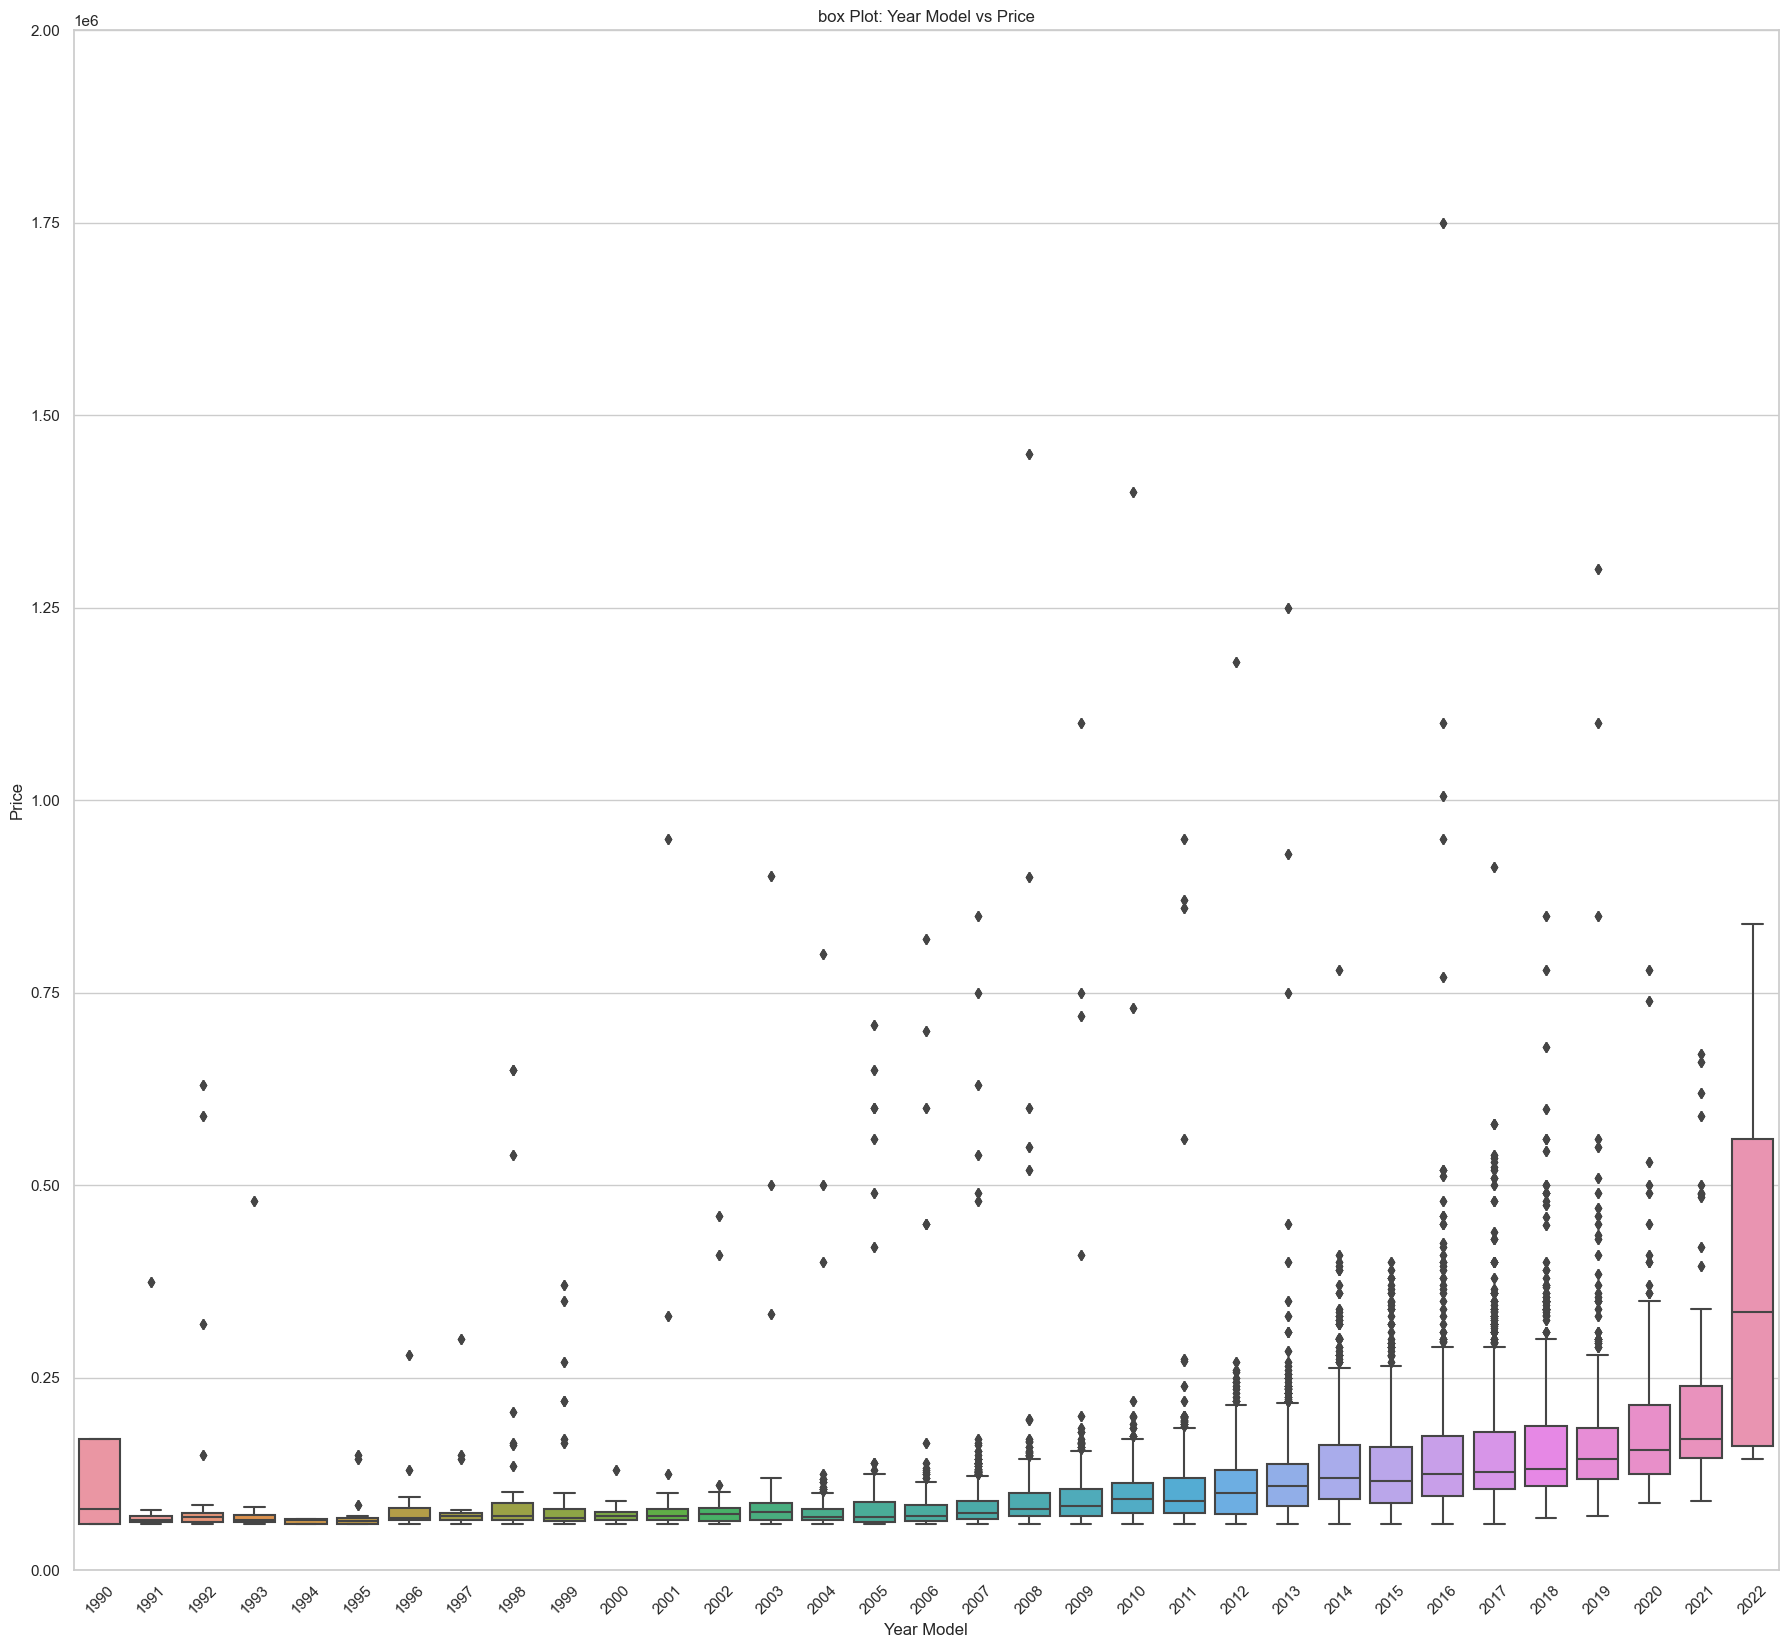

In [362]:
plt.figure(figsize=(22, 20))
sns.boxplot(data=clean_raw_data, x='Année-Modèle', y='Prix')
plt.xlabel('Year Model')
plt.ylabel('Price')
plt.title('box Plot: Year Model vs Price')

plt.xticks( rotation=45)
plt.ylim(-1,2e6)
plt.show()

In [364]:
# encodage of Année-Modèle
_df_clean_2=_df_clean.copy(deep=True)

In [366]:
from sklearn.preprocessing import OrdinalEncoder

# Create an instance of OrdinalEncoder and fit-transform the data
encoder = OrdinalEncoder()
_df_clean_2['Année-Modèle'] = encoder.fit_transform(_df_clean[['Année-Modèle']]).astype(int)
_df_clean_2

Marque      Modèle  Année-Modèle Type de carburant  \
0            Fiat       Punto            17            Diesel   
1           Dacia  Dokker Van            23            Diesel   
2           Dacia      Dokker            24            Diesel   
3      Volkswagen     Touareg            15            Diesel   
4          Toyota       Prado            17            Diesel   
...           ...         ...           ...               ...   
24771        mini      cabrio            21           Essence   
24772        mini      cooper            17           Essence   
24773        mini         one            16           Essence   
24774        mini      cooper            20           Essence   
24775        mini      cooper            18           Essence   

       Puissance fiscale Boite de vitesses Première main  État    Prix  \
0                      5          Manuelle           Non     4   60000   
1                      6          Manuelle           Non     5   70000   
2                      6          Manuelle           Non     4   90000   
3                     10       Automatique           Oui     5   90000   
4                     12          Manuelle           Non     5   97000   
...                  ...               ...           ...   ...     ...   
24771                  9          Manuelle           Oui     5  180000   
24772                  9          Manuelle           Non     4   63000   
24773                  8          Manuelle           Non     5   60000   
24774                  9       Automatique           Non     4   85000   
24775                  9          Manuelle           Non     4   84000   

       min_kilometrage  max_kilometrage  
0               200000           249999  
1               400000           449999  
2               160000           169999  
3                    0             4999  
4               200000           249999  
...                ...              ...  
24771            70000            74999  
24772           190000           199999  
24773            10000            14999  
24774           140000           149999  
24775           180000           189999  

[24776 rows x 11 columns]

In [368]:
_df_clean_2['Type de carburant'].value_counts()

Type de carburant
Diesel        22618
Essence        2122
Hybride          18
Electrique       18
Name: count, dtype: int64

In [378]:
_df_clean_3=_df_clean_2.copy(deep=True)



In [379]:
from sklearn.preprocessing import OneHotEncoder

In [380]:


encoder = OneHotEncoder(drop='first')
carbunat_encoded = encoder.fit_transform(_df_clean_3[['Type de carburant']]).toarray().astype(int)
carbunat_encoded_df=pd.DataFrame(carbunat_encoded,columns=encoder.get_feature_names_out(['Type de carburant']))
_df_encoded=pd.concat([_df_clean_3.reset_index(drop=True),carbunat_encoded_df],axis=1)


In [384]:
_df_encoded.drop('Type de carburant',axis=1)

In [397]:

_df_clean_4=_df_encoded.copy(deep=True)

In [398]:
_df_clean_4.drop('Type de carburant',axis=1)

Marque      Modèle  Année-Modèle  Puissance fiscale  \
0            Fiat       Punto            17                  5   
1           Dacia  Dokker Van            23                  6   
2           Dacia      Dokker            24                  6   
3      Volkswagen     Touareg            15                 10   
4          Toyota       Prado            17                 12   
...           ...         ...           ...                ...   
24771        mini      cabrio            21                  9   
24772        mini      cooper            17                  9   
24773        mini         one            16                  8   
24774        mini      cooper            20                  9   
24775        mini      cooper            18                  9   

      Boite de vitesses Première main  État    Prix  min_kilometrage  \
0              Manuelle           Non     4   60000           200000   
1              Manuelle           Non     5   70000           400000   
2              Manuelle           Non     4   90000           160000   
3           Automatique           Oui     5   90000                0   
4              Manuelle           Non     5   97000           200000   
...                 ...           ...   ...     ...              ...   
24771          Manuelle           Oui     5  180000            70000   
24772          Manuelle           Non     4   63000           190000   
24773          Manuelle           Non     5   60000            10000   
24774       Automatique           Non     4   85000           140000   
24775          Manuelle           Non     4   84000           180000   

       max_kilometrage  Type de carburant_Electrique  \
0               249999                             0   
1               449999                             0   
2               169999                             0   
3                 4999                             0   
4               249999                             0   
...                ...                           ...   
24771            74999                             0   
24772           199999                             0   
24773            14999                             0   
24774           149999                             0   
24775           189999                             0   

       Type de carburant_Essence  Type de carburant_Hybride  
0                              0                          0  
1                              0                          0  
2                              0                          0  
3                              0                          0  
4                              0                          0  
...                          ...                        ...  
24771                          1                          0  
24772                          1                          0  
24773                          1                          0  
24774                          1                          0  
24775                          1                          0  

[24776 rows x 13 columns]

In [390]:
_df_clean_4=_df_clean_4.drop('Type de carburant',axis=1)

In [399]:
# Replace '--' with 'Other' in the 'Boite de vitesses' column
_df_clean_4['Boite de vitesses'] = _df_clean_4['Boite de vitesses'].replace('--', 'Other')
cols=['Boite de vitesses','Première main']
encoder_2=OneHotEncoder(drop='first')
encoded_cols=encoder.fit_transform(_df_clean_4[cols]).toarray().astype(int)
encoded_cols_df=pd.DataFrame(encoded_cols,columns=encoder.get_feature_names_out(cols))
_df_clean_4=pd.concat([_df_clean_4,encoded_cols_df],axis=1)

In [400]:
_df_clean_4

Marque      Modèle  Année-Modèle Type de carburant  \
0            Fiat       Punto            17            Diesel   
1           Dacia  Dokker Van            23            Diesel   
2           Dacia      Dokker            24            Diesel   
3      Volkswagen     Touareg            15            Diesel   
4          Toyota       Prado            17            Diesel   
...           ...         ...           ...               ...   
24771        mini      cabrio            21           Essence   
24772        mini      cooper            17           Essence   
24773        mini         one            16           Essence   
24774        mini      cooper            20           Essence   
24775        mini      cooper            18           Essence   

       Puissance fiscale Boite de vitesses Première main  État    Prix  \
0                      5          Manuelle           Non     4   60000   
1                      6          Manuelle           Non     5   70000   
2                      6          Manuelle           Non     4   90000   
3                     10       Automatique           Oui     5   90000   
4                     12          Manuelle           Non     5   97000   
...                  ...               ...           ...   ...     ...   
24771                  9          Manuelle           Oui     5  180000   
24772                  9          Manuelle           Non     4   63000   
24773                  8          Manuelle           Non     5   60000   
24774                  9       Automatique           Non     4   85000   
24775                  9          Manuelle           Non     4   84000   

       min_kilometrage  max_kilometrage  Type de carburant_Electrique  \
0               200000           249999                             0   
1               400000           449999                             0   
2               160000           169999                             0   
3                    0             4999                             0   
4               200000           249999                             0   
...                ...              ...                           ...   
24771            70000            74999                             0   
24772           190000           199999                             0   
24773            10000            14999                             0   
24774           140000           149999                             0   
24775           180000           189999                             0   

       Type de carburant_Essence  Type de carburant_Hybride  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
...                          ...                        ...   
24771                          1                          0   
24772                          1                          0   
24773                          1                          0   
24774                          1                          0   
24775                          1                          0   

       Boite de vitesses_Manuelle  Boite de vitesses_Other  Première main_Oui  
0                               1                        0                  0  
1                               1                        0                  0  
2                               1                        0                  0  
3                               0                        0                  1  
4                               1                        0                  0  
...                           ...                      ...                ...  
24771                           1                        0                  1  
24772                           1                        0         

In [401]:
_df_clean_4=_df_clean_4.drop(['Boite de vitesses','Première main'],axis=1)

In [404]:
_df_clean_4=_df_clean_4.drop(['Type de carburant'],axis=1)

In [405]:
_df_clean_4

Marque      Modèle  Année-Modèle  Puissance fiscale  État    Prix  \
0            Fiat       Punto            17                  5     4   60000   
1           Dacia  Dokker Van            23                  6     5   70000   
2           Dacia      Dokker            24                  6     4   90000   
3      Volkswagen     Touareg            15                 10     5   90000   
4          Toyota       Prado            17                 12     5   97000   
...           ...         ...           ...                ...   ...     ...   
24771        mini      cabrio            21                  9     5  180000   
24772        mini      cooper            17                  9     4   63000   
24773        mini         one            16                  8     5   60000   
24774        mini      cooper            20                  9     4   85000   
24775        mini      cooper            18                  9     4   84000   

       min_kilometrage  max_kilometrage  Type de carburant_Electrique  \
0               200000           249999                             0   
1               400000           449999                             0   
2               160000           169999                             0   
3                    0             4999                             0   
4               200000           249999                             0   
...                ...              ...                           ...   
24771            70000            74999                             0   
24772           190000           199999                             0   
24773            10000            14999                             0   
24774           140000           149999                             0   
24775           180000           189999                             0   

       Type de carburant_Essence  Type de carburant_Hybride  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
...                          ...                        ...   
24771                          1                          0   
24772                          1                          0   
24773                          1                          0   
24774                          1                          0   
24775                          1                          0   

       Boite de vitesses_Manuelle  Boite de vitesses_Other  Première main_Oui  
0                               1                        0                  0  
1                               1                        0                  0  
2                               1                        0                  0  
3                               0                        0                  1  
4                               1                        0                  0  
...                           ...                      ...                ...  
24771                           1                        0                  1  
24772                           1                        0                  0  
24773                           1                        0                  0  
24774                           0                        0                  0  
24775                           1                        0                  0  

[24776 rows x 14 columns]

In [406]:
_df_clean_4['Marque'].unique()

array(['Fiat', 'Dacia', 'Volkswagen', 'Toyota', 'Peugeot', 'Renault',
       'Ford', 'Land Rover', 'Citroen', 'Audi', 'Mercedes-Benz',
       'Hyundai', 'Opel', 'Suzuki', 'Skoda', 'Nissan', 'Alfa Romeo',
       'Seat', 'Kia', 'BMW', 'Chevrolet', 'Jeep', 'mini'], dtype=object)

In [408]:

# Create an instance of OneHotEncoder
encoder4 = OneHotEncoder()

# Fit-transform the 'Marque' column and convert it to a DataFrame
marque_encoded = encoder4.fit_transform(_df_clean_4[['Marque']]).toarray().astype(int)
marque_encoded_df = pd.DataFrame(marque_encoded, columns=encoder4.get_feature_names_out(['Marque']))

# Concatenate the encoded DataFrame with the original DataFrame _df_clean_4
_df_clean_4_encoded = pd.concat([_df_clean_4.reset_index(drop=True), marque_encoded_df], axis=1)

In [410]:
_df_clean_5=_df_clean_4_encoded.drop('Marque',axis=1)

In [412]:
_df_clean_6=_df_clean_5.copy(deep=True)

In [415]:
# Create an instance of OneHotEncoder
encoder5 = OneHotEncoder()

# Fit-transform the 'Modèle' column and convert it to a DataFrame
marque_encoded = encoder5.fit_transform(_df_clean_6[['Modèle']]).toarray().astype(int)
marque_encoded_df = pd.DataFrame(marque_encoded, columns=encoder5.get_feature_names_out(['Modèle']))

# Concatenate the encoded DataFrame with the original DataFrame _df_clean_6
_df_clean_6_encoded = pd.concat([_df_clean_6.reset_index(drop=True), marque_encoded_df], axis=1)
_df=_df_clean_6_encoded.drop('Modèle',axis=1)

In [416]:
_df

Année-Modèle  Puissance fiscale  État    Prix  min_kilometrage  \
0                17                  5     4   60000           200000   
1                23                  6     5   70000           400000   
2                24                  6     4   90000           160000   
3                15                 10     5   90000                0   
4                17                 12     5   97000           200000   
...             ...                ...   ...     ...              ...   
24771            21                  9     5  180000            70000   
24772            17                  9     4   63000           190000   
24773            16                  8     5   60000            10000   
24774            20                  9     4   85000           140000   
24775            18                  9     4   84000           180000   

       max_kilometrage  Type de carburant_Electrique  \
0               249999                             0   
1               449999                             0   
2               169999                             0   
3                 4999                             0   
4               249999                             0   
...                ...                           ...   
24771            74999                             0   
24772           199999                             0   
24773            14999                             0   
24774           149999                             0   
24775           189999                             0   

       Type de carburant_Essence  Type de carburant_Hybride  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
...                          ...                        ...   
24771                          1                          0   
24772                          1                          0   
24773                          1                          0   
24774                          1                          0   
24775                          1                          0   

       Boite de vitesses_Manuelle  ...  Modèle_cabrio  Modèle_cooper  \
0                               1  ...              0              0   
1                               1  ...              0              0   
2                               1  ...              0              0   
3                               0  ...              0              0   
4                               1  ...              0              0   
...                           ...  ...            ...            ...   
24771                           1  ...              1              0   
24772                           1  ...              0              1   
24773                           1  ...              0              0   
24774                           0  ...              0              1   
24775                           1  ...              0              1   

       Modèle_country man  Modèle_duster  Modèle_i 10  Modèle_i 20  \
0                       0              0            0            0   
1                       0              0            0            0   
2                       0              0            0            0   
3                       0              0            0            0   
4                       0              0            0            0   
...                   ...            ...          ...          ...   
24771                   0              0            0            0   
24772                   0              0            0            0   
24773                   0              0            0            0   
24774                   0              0            0            0   
24775                   0              0            0            

In [419]:
from sklearn.model_selection import train_test_split
y=_df['Prix']
X=_df.drop('Prix',axis=1)

In [421]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2, random_state=0)


Année-Modèle  Puissance fiscale  État  min_kilometrage  \
9943             27                  6     5           100000   
8834             32                  7     5                0   
1013             27                  6     5            35000   
1343             25                  8     5           120000   
393              18                  8     4           250000   
...             ...                ...   ...              ...   
13123            17                  9     3           300000   
19648            21                  9     5           250000   
9845             25                  6     5            95000   
10799            27                  8     4           110000   
2732             26                  5     5           180000   

       max_kilometrage  Type de carburant_Electrique  \
9943            109999                             0   
8834              4999                             0   
1013             39999                             0   
1343            129999                             0   
393             299999                             0   
...                ...                           ...   
13123           349999                             0   
19648           299999                             0   
9845             99999                             0   
10799           119999                             0   
2732            189999                             0   

       Type de carburant_Essence  Type de carburant_Hybride  \
9943                           1                          0   
8834                           0                          1   
1013                           0                          0   
1343                           0                          0   
393                            0                          0   
...                          ...                        ...   
13123                          0                          0   
19648                          0                          0   
9845                           0                          0   
10799                          0                          0   
2732                           0                          0   

       Boite de vitesses_Manuelle  Boite de vitesses_Other  ...  \
9943                            0                        1  ...   
8834                            0                        0  ...   
1013                            0                        0  ...   
1343                            0                        0  ...   
393                             0                        0  ...   
...                           ...                      ...  ...   
13123                           1                        0  ...   
19648                           0                        0  ...   
9845                            1                        0  ...   
10799                           0                        0  ...   
2732                            0                        1  ...   

       Modèle_cabrio  Modèle_cooper  Modèle_country man  Modèle_duster  \
9943               0              0                   0              0   
8834               0              0                   0              0   
1013               0              0                   0              0   
1343               0              0                   0              0   
393                0              0                   0              0   
...              ...            ...                 ...            ...   
13123              0              0                   0              0   
19648              0              0                   0              0   
9845               0              0                   0              0   
10799              0              0                   0              0   
2732               0              0                   0              0   

       Modèle_i 10  Modèle_i 20  Modèle_i 30  Modèle_i 40  Modèle_ix 35  \
9943             1         

In [434]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [435]:
model1=DecisionTreeRegressor()
model1.fit(train_X,train_y)
# Make predictions on the testing data
pred_y=model1.predict(test_X)
# Evaluate the model
mae = mean_absolute_error(test_y, pred_y)
print("Mean Absolute Error:", mae)
mse=mean_squared_error(test_y, pred_y)
print("Mean Squared Error:", mse)
# Calculate R-squared
r2 = r2_score(test_y, pred_y)
print("R-squared:", r2)



Mean Absolute Error: 11825.964122080952
Mean Squared Error: 144133718720.58554
R-squared: -0.8675773486497695


under or overfitting

In [440]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(train_X,train_y)
# Make predictions on the testing data
pred_y=model2.predict(test_X)
# Evaluate the model
mae = mean_absolute_error(test_y, pred_y)
print("Mean Absolute Error:", mae)
mse=mean_squared_error(test_y, pred_y)
print("Mean Squared Error:", mse)
# Calculate R-squared
r2 = r2_score(test_y, pred_y)
print("R-squared:", r2)



Mean Absolute Error: 16942.93311127647
Mean Squared Error: 47472421302.502304
R-squared: 0.3848877313574115


The MAE value suggests that the model's predictions have a relatively large average error.

The MSE value, being quite large, indicates that the model's predictions can be considerably far from the actual values.

The R-squared value of 0.3849 suggests that the model explains a moderate portion of the variance in the target variable. However, it may not capture all the underlying patterns in the data.

In [441]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR()
}

# Iterate through each model, fit, predict, and evaluate
for name, model in models.items():
    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)
    
    mae = mean_absolute_error(test_y, pred_y)
    mse = mean_squared_error(test_y, pred_y)
    r2 = r2_score(test_y, pred_y)
    
    print(f"Model: {name}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}\n")

Model: Linear Regression
Mean Absolute Error: 538573584.1719508
Mean Squared Error: 4.785030309062056e+20
R-squared: -6200085792.339474

Model: Ridge Regression
Mean Absolute Error: 374550.93256613595
Mean Squared Error: 11465873114845.98
R-squared: -147.56624183332346



D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.693e+17, tolerance: 1.128e+14



Model: Lasso Regression
Mean Absolute Error: 381865.7578249164
Mean Squared Error: 12716552195588.545
R-squared: -163.77160961511882

Model: Decision Tree
Mean Absolute Error: 11799.027076076109
Mean Squared Error: 144132138968.76956
R-squared: -0.8675568794026411

Model: Random Forest
Mean Absolute Error: 24169.43606910394
Mean Squared Error: 110207213708.01501
R-squared: -0.42798297168681465

Model: Gradient Boosting
Mean Absolute Error: 47502.79437409481
Mean Squared Error: 29886130940.3227
R-squared: 0.612757780217072

Model: Support Vector Regression
Mean Absolute Error: 58261.495525946135
Mean Squared Error: 78452301224.8385
R-squared: -0.016526472899718758



In [442]:
from sklearn.ensemble import GradientBoostingRegressor
model3=GradientBoostingRegressor()
model3.fit(train_X,train_y)
# Make predictions on the testing data
pred_y=model3.predict(test_X)
# Evaluate the model
mae = mean_absolute_error(test_y, pred_y)
print("Mean Absolute Error:", mae)
mse=mean_squared_error(test_y, pred_y)
print("Mean Squared Error:", mse)
# Calculate R-squared
r2 = r2_score(test_y, pred_y)
print("R-squared:", r2)



Mean Absolute Error: 47503.277942776105
Mean Squared Error: 29886152279.815742
R-squared: 0.6127575037158188


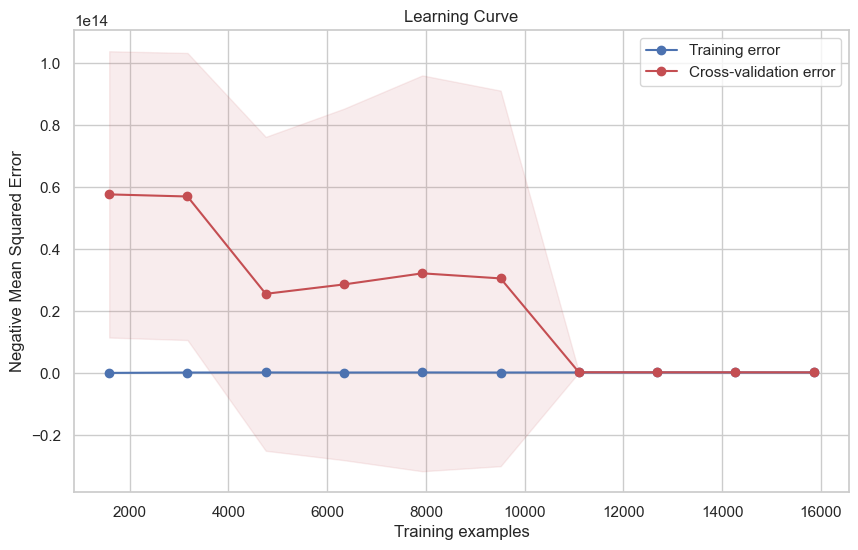

In [443]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Generate a plot of the learning curve for an estimator.
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation error")
    plt.xlabel("Training examples")
    plt.ylabel("Negative Mean Squared Error")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.show()

# Visualize learning curve for GradientBoostingRegressor
plot_learning_curve(model3, train_X, train_y, cv=5)

In [451]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 5, 7]  # Maximum depth of the individual regression estimators
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, cv=5, scoring='r2')

# Perform GridSearch
grid_search.fit(train_X, train_y)

# Get the best parameters and best R-squared score
best_params = grid_search.best_params_
best_r2 = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best R-squared Score:", best_r2)
grid_search

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Best R-squared Score: 0.7798526676382529


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

In [449]:
from sklearn.ensemble import GradientBoostingRegressor
model3=GradientBoostingRegressor(learning_rate= 0.2, max_depth= 5, n_estimators= 150)
model3.fit(train_X,train_y)
# Make predictions on the testing data
pred_y=model3.predict(test_X)
# Evaluate the model
mae = mean_absolute_error(test_y, pred_y)
print("Mean Absolute Error:", mae)
mse=mean_squared_error(test_y, pred_y)
print("Mean Squared Error:", mse)
# Calculate R-squared
r2 = r2_score(test_y, pred_y)
print("R-squared:", r2)



Mean Absolute Error: 33019.067664403025
Mean Squared Error: 61103291123.67688
R-squared: 0.20826907510967274


In [472]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

# Define PCA
pca = PCA(n_components=14)  # Adjust the number of components as needed

# Define GradientBoostingRegressor
model3 = GradientBoostingRegressor()

# Create a pipeline
pipeline = Pipeline(steps=[('pca', pca), ('gb', model3)])

# Fit the pipeline on the training data
pipeline.fit(train_X, train_y)

# Make predictions on the testing data
pred_y = pipeline.predict(test_X)

# Evaluate the model
mae = mean_absolute_error(test_y, pred_y)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(test_y, pred_y)
print("Mean Squared Error:", mse)

r2 = r2_score(test_y, pred_y)
print("R-squared:", r2)


Mean Absolute Error: 48986.70573336078
Mean Squared Error: 44334098650.927124
R-squared: 0.425551778249856


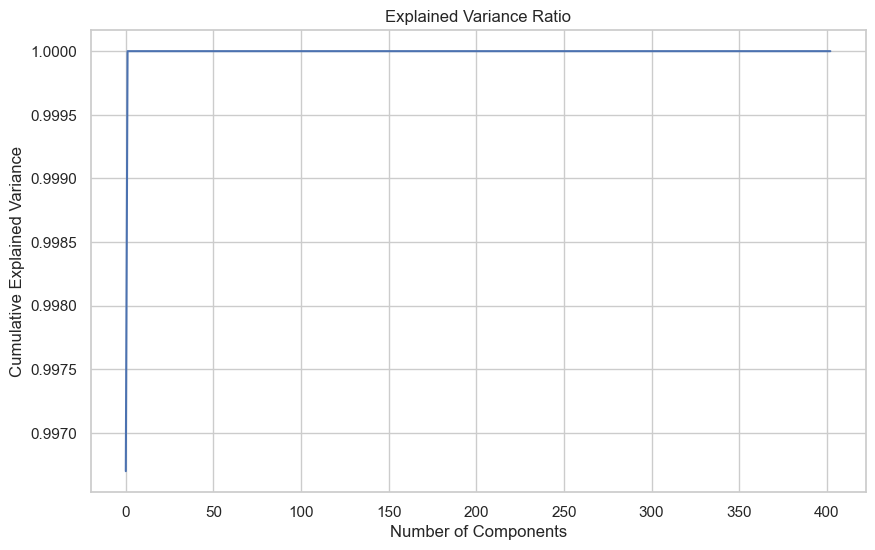

Optimal number of components: 1
Most important features:
min_kilometrage
Première main_Oui
max_kilometrage
Modèle_12
Année-Modèle
Modèle_Vitara
Modèle_GOLF 7
Type de carburant_Essence
Modèle_Jumpy
Puissance fiscale
Modèle_C3
Boite de vitesses_Manuelle
Modèle_406
Modèle_El Camino
Modèle_206
Modèle_Laguna
Modèle_19
Marque_Suzuki
Modèle_Logan
Modèle_Tiguan
Marque_Land Rover
Modèle_301
Boite de vitesses_Other
Marque_Audi
État
Marque_Fiat
Modèle_Q5
Modèle_Classe A
Marque_Mercedes-Benz
Modèle_Mondeo
Modèle_Palio
Modèle_RS5
Modèle_Classe M
Modèle_C4 CACTUS
Modèle_C4 Picasso
Modèle_C5
Modèle_Beetle
Modèle_C4 Aircross
Modèle_CABRIOLET
Modèle_CARNIVAL
Modèle_Auris
Modèle_CC
Modèle_CELICA
Modèle_CITAN
Modèle_CLASSE C COUPE
Modèle_CLASSE GLK
Modèle_CLASSE ML
Modèle_C8
Modèle_C3 Cactus
Modèle_C4
Modèle_C3 Picasso
Modèle_BEDFORD
Modèle_Berlingo
Modèle_Bipper
Modèle_Bora
Modèle_Boxer
Modèle_Bravo
Modèle_C-ELYSEE
Modèle_Azera
Modèle_C-Elysée
Modèle_COCCINELLE
Modèle_C-Max
Modèle_C1
Modèle_Aygo
Modèle_

In [453]:
from sklearn.decomposition import PCA
import numpy as np

# Fit PCA to your data
pca = PCA()
pca.fit(train_X)

# Plot the explained variance ratio
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Identify the optimal number of components
# You can visually inspect the plot or use a threshold to determine the number of components
# For example, you can set a threshold of 0.95 for cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print("Optimal number of components:", n_components)

# Optionally, you can perform feature importance analysis on the original features
# Here's an example using GradientBoostingRegressor for feature importance
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(train_X, train_y)

# Get feature importances
feature_importances = gb.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the names of the most important features
most_important_features = train_X.columns[sorted_indices]

# Print the most important features
print("Most important features:")
for feature in most_important_features:
    print(feature)

In [457]:
_df

Année-Modèle  Puissance fiscale  État    Prix  min_kilometrage  \
0                17                  5     4   60000           200000   
1                23                  6     5   70000           400000   
2                24                  6     4   90000           160000   
3                15                 10     5   90000                0   
4                17                 12     5   97000           200000   
...             ...                ...   ...     ...              ...   
24771            21                  9     5  180000            70000   
24772            17                  9     4   63000           190000   
24773            16                  8     5   60000            10000   
24774            20                  9     4   85000           140000   
24775            18                  9     4   84000           180000   

       max_kilometrage  Type de carburant_Electrique  \
0               249999                             0   
1               449999                             0   
2               169999                             0   
3                 4999                             0   
4               249999                             0   
...                ...                           ...   
24771            74999                             0   
24772           199999                             0   
24773            14999                             0   
24774           149999                             0   
24775           189999                             0   

       Type de carburant_Essence  Type de carburant_Hybride  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
...                          ...                        ...   
24771                          1                          0   
24772                          1                          0   
24773                          1                          0   
24774                          1                          0   
24775                          1                          0   

       Boite de vitesses_Manuelle  ...  Modèle_cabrio  Modèle_cooper  \
0                               1  ...              0              0   
1                               1  ...              0              0   
2                               1  ...              0              0   
3                               0  ...              0              0   
4                               1  ...              0              0   
...                           ...  ...            ...            ...   
24771                           1  ...              1              0   
24772                           1  ...              0              1   
24773                           1  ...              0              0   
24774                           0  ...              0              1   
24775                           1  ...              0              1   

       Modèle_country man  Modèle_duster  Modèle_i 10  Modèle_i 20  \
0                       0              0            0            0   
1                       0              0            0            0   
2                       0              0            0            0   
3                       0              0            0            0   
4                       0              0            0            0   
...                   ...            ...          ...          ...   
24771                   0              0            0            0   
24772                   0              0            0            0   
24773                   0              0            0            0   
24774                   0              0            0            0   
24775                   0              0            0            

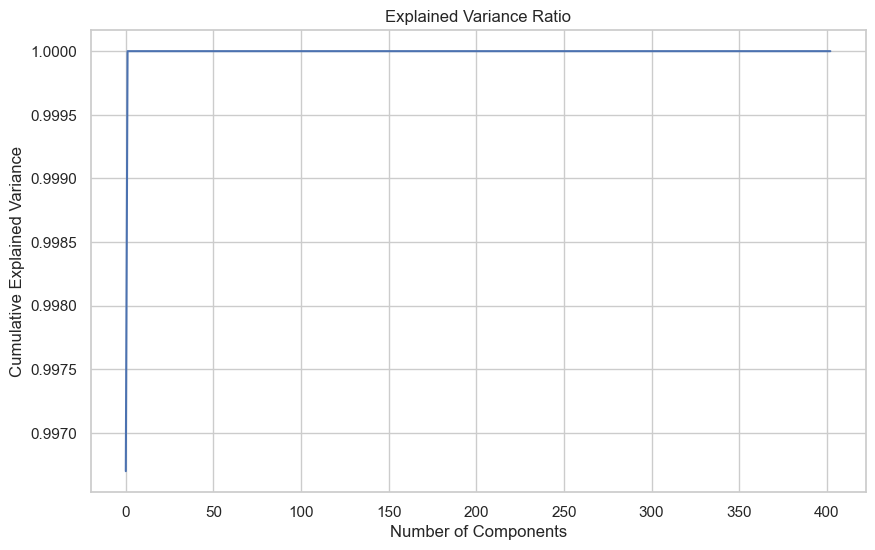

Optimal number of components: 1
[9.96699367e-01 3.30063085e-03 1.55415604e-09 1.38408310e-10
 2.68395482e-11 1.39769551e-11 1.05160589e-11 1.01154495e-11
 8.87385519e-12 7.54111783e-12 5.23771947e-12 5.04200470e-12
 4.67764286e-12 4.42983232e-12 3.91021065e-12 3.28759810e-12
 3.04828670e-12 2.65884381e-12 2.52217537e-12 2.34359378e-12
 2.25017991e-12 2.08758200e-12 1.93289198e-12 1.61573493e-12
 1.57236835e-12 1.50874478e-12 1.41565893e-12 1.40468375e-12
 1.30565821e-12 1.30412009e-12 1.26005121e-12 1.22002756e-12
 1.10546580e-12 9.60566379e-13 9.41102477e-13 8.06503563e-13
 7.74460215e-13 7.69517478e-13 7.36837579e-13 7.12820522e-13
 6.94888560e-13 6.93688084e-13 6.78056485e-13 6.70055951e-13
 6.35842791e-13 6.29301568e-13 6.00342314e-13 5.77048088e-13
 5.52701098e-13 5.42799989e-13 5.17940014e-13 5.01700337e-13
 4.94021219e-13 4.74613035e-13 4.46651639e-13 4.43063389e-13
 4.37657088e-13 4.35303467e-13 4.34170130e-13 4.23059334e-13
 4.15412951e-13 4.12365192e-13 4.08082994e-13 3.98243

In [460]:
from sklearn.decomposition import PCA
import numpy as np

# Fit PCA to your data
pca = PCA()
pca.fit(train_X)

# Plot the explained variance ratio
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Identify the optimal number of components
# You can visually inspect the plot or use a threshold to determine the number of components
# For example, you can set a threshold of 0.95 for cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.91) + 1
print("Optimal number of components:", n_components)

print(pca.explained_variance_ratio_)

In [474]:

# Initialize the GradientBoostingRegressor with the best parameters
best_model = GradientBoostingRegressor()

# Fit the model to the training data
best_model.fit(train_X, train_y)
# Make predictions on the testing data
pred_y = best_model.predict(test_X)

# Evaluate the model
mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 47503.277942776105
Mean Squared Error: 29886152279.815742
R-squared: 0.6127575037158188


In [475]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import GradientBoostingRegressor

# Define the pipeline with feature selection and the regressor
pipeline = Pipeline([
    ('feature_selection', SelectKBest()),  # Feature selection step
    ('regressor', GradientBoostingRegressor())  # Regressor step
])

# Define the parameter grid for feature selection
param_grid = {
    'feature_selection__k': [10, 20, 30]  # Number of features to select
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='r2')

# Perform GridSearchCV
grid_search.fit(train_X, train_y)

# Get the best pipeline and best R-squared score
best_pipeline = grid_search.best_estimator_
best_r2 = grid_search.best_score_

print("Best Pipeline:", best_pipeline)
print("Best R-squared Score:", best_r2)


D:\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [ 42 140 311 316 317 338 344] are constant.

D:\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

divide by zero encountered in divide

D:\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide

D:\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [ 42  57  73 130 140 307 311 317 344 356 396] are constant.

D:\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

divide by zero encountered in divide

D:\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide

D:\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [ 42 

Best Pipeline: Pipeline(steps=[('feature_selection', SelectKBest()),
                ('regressor', GradientBoostingRegressor())])
Best R-squared Score: -0.030649593402571073


In [476]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize the AdaBoostRegressor with the best parameters
ada_model = AdaBoostRegressor()

# Fit the model to the training data
ada_model.fit(train_X, train_y)

# Make predictions on the testing data
pred_y = ada_model.predict(test_X)

# Evaluate the model
mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 111379.66811640718
Mean Squared Error: 406591503131.44604
R-squared: -4.268309789979071


In [478]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the features
train_X_scaled = scaler.fit_transform(train_X)

# Transform the testing data using the same scaler
test_X_scaled = scaler.transform(test_X)

# Initialize and train the model with normalized data
best_model_normalized = GradientBoostingRegressor()
best_model_normalized.fit(train_X_scaled, train_y)

# Make predictions on the normalized testing data
pred_y_normalized = best_model_normalized.predict(test_X_scaled)

# Evaluate the model with normalized data
mae_normalized = mean_absolute_error(test_y, pred_y_normalized)
mse_normalized = mean_squared_error(test_y, pred_y_normalized)
r2_normalized = r2_score(test_y, pred_y_normalized)

# Print evaluation metrics
print("Mean Absolute Error (Normalized):", mae_normalized)
print("Mean Squared Error (Normalized):", mse_normalized)
print("R-squared (Normalized):", r2_normalized)

Mean Absolute Error (Normalized): 47503.277942776105
Mean Squared Error (Normalized): 29886152279.815735
R-squared (Normalized): 0.612757503715819


In [479]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler on the training data and transform the features
train_X_scaled = scaler.fit_transform(train_X)

# Transform the testing data using the same scaler
test_X_scaled = scaler.transform(test_X)

# Initialize and train the model with normalized data
best_model_normalized = GradientBoostingRegressor()
best_model_normalized.fit(train_X_scaled, train_y)

# Make predictions on the normalized testing data
pred_y_normalized = best_model_normalized.predict(test_X_scaled)

# Evaluate the model with normalized data
mae_normalized = mean_absolute_error(test_y, pred_y_normalized)
mse_normalized = mean_squared_error(test_y, pred_y_normalized)
r2_normalized = r2_score(test_y, pred_y_normalized)

# Print evaluation metrics
print("Mean Absolute Error (Normalized):", mae_normalized)
print("Mean Squared Error (Normalized):", mse_normalized)
print("R-squared (Normalized):", r2_normalized)


Mean Absolute Error (Normalized): 47503.28283511357
Mean Squared Error (Normalized): 29886153453.601353
R-squared (Normalized): 0.6127574885067794


In [480]:
_df.head()

Année-Modèle  Puissance fiscale  État   Prix  min_kilometrage  \
0            17                  5     4  60000           200000   
1            23                  6     5  70000           400000   
2            24                  6     4  90000           160000   
3            15                 10     5  90000                0   
4            17                 12     5  97000           200000   

   max_kilometrage  Type de carburant_Electrique  Type de carburant_Essence  \
0           249999                             0                          0   
1           449999                             0                          0   
2           169999                             0                          0   
3             4999                             0                          0   
4           249999                             0                          0   

   Type de carburant_Hybride  Boite de vitesses_Manuelle  ...  Modèle_cabrio  \
0                          0                           1  ...              0   
1                          0                           1  ...              0   
2                          0                           1  ...              0   
3                          0                           0  ...              0   
4                          0                           1  ...              0   

   Modèle_cooper  Modèle_country man  Modèle_duster  Modèle_i 10  Modèle_i 20  \
0              0                   0              0            0            0   
1              0                   0              0            0            0   
2              0                   0              0            0            0   
3              0                   0              0            0            0   
4              0                   0              0            0            0   

   Modèle_i 30  Modèle_i 40  Modèle_ix 35  Modèle_one  
0            0            0             0           0  
1            0            0             0           0  
2            0            0             0           0  
3            0            0             0           0  
4            0            0             0           0  

[5 rows x 404 columns]

In [482]:
#Let's delete the outliers in Prix  and  test again
_df.describe()

Année-Modèle  Puissance fiscale          État          Prix  \
count  24776.000000       24776.000000  24776.000000  2.477600e+04   
mean      21.844244           7.193938      4.540321  2.169588e+05   
std        5.462925           1.574124      0.651869  6.749569e+06   
min        0.000000           5.000000      0.000000  6.000000e+04   
25%       18.000000           6.000000      4.000000  7.500000e+04   
50%       23.000000           7.000000      5.000000  1.000000e+05   
75%       26.000000           8.000000      5.000000  1.400000e+05   
max       32.000000          14.000000      5.000000  6.120372e+08   

       min_kilometrage  max_kilometrage  Type de carburant_Electrique  \
count     24776.000000     24776.000000                  24776.000000   
mean     124918.267678    141152.132063                      0.000727   
std       82334.053998     96141.126720                      0.026945   
min           0.000000      4999.000000                      0.000000   
25%       60000.000000     64999.000000                      0.000000   
50%      120000.000000    129999.000000                      0.000000   
75%      190000.000000    199999.000000                      0.000000   
max      450000.000000    499999.000000                      1.000000   

       Type de carburant_Essence  Type de carburant_Hybride  \
count               24776.000000               24776.000000   
mean                    0.085647                   0.000727   
std                     0.279848                   0.026945   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                     1.000000                   1.000000   

       Boite de vitesses_Manuelle  ...  Modèle_cabrio  Modèle_cooper  \
count                24776.000000  ...   24776.000000   24776.000000   
mean                     0.704391  ...       0.000242       0.002422   
std                      0.456325  ...       0.015560       0.049152   
min                      0.000000  ...       0.000000       0.000000   
25%                      0.000000  ...       0.000000       0.000000   
50%                      1.000000  ...       0.000000       0.000000   
75%                      1.000000  ...       0.000000       0.000000   
max                      1.000000  ...       1.000000       1.000000   

       Modèle_country man  Modèle_duster   Modèle_i 10   Modèle_i 20  \
count        24776.000000   24776.000000  24776.000000  24776.000000   
mean             0.000283       0.000121      0.007871      0.001453   
std              0.016807       0.011003      0.088368      0.038092   
min              0.000000       0.000000      0.000000      0.000000   
25%              0.000000       0.000000      0.000000      0.000000   
50%              0.000000       0.000000      0.000000      0.000000   
75%              0.000000       0.000000      0.000000      0.000000   
max              1.000000       1.000000      1.000000      1.000000   

        Modèle_i 30   Modèle_i 40  Modèle_ix 35    Modèle_one  
count  24776.000000  24776.000000  24776.000000  24776.000000  
mean       0.006095      0.001978      0.006861      0.000605  
std        0.077831      0.044428      0.082551      0.024598  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000  

[8 rows x 404 columns]

In [500]:
# Calculate the IQR for the 'Prix' column
Q1 = _df['Prix'].quantile(0.25)
Q3 = _df['Prix'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Filter the dataset to keep only rows where 'Prix' is within the acceptable range
_df_filtered = _df[(_df['Prix'] >= lower_bound) & (_df['Prix'] <= upper_bound)]



In [491]:
_df_filtered.describe()

Année-Modèle  Puissance fiscale          État           Prix  \
count  22952.000000       22952.000000  22952.000000   22952.000000   
mean      21.561476           7.098074      4.520783  107016.116635   
std        5.411051           1.522438      0.659691   39937.175889   
min        0.000000           5.000000      0.000000   60000.000000   
25%       18.000000           6.000000      4.000000   75000.000000   
50%       22.000000           6.000000      5.000000   97000.000000   
75%       26.000000           8.000000      5.000000  128000.000000   
max       32.000000          14.000000      5.000000  237000.000000   

       min_kilometrage  max_kilometrage  Type de carburant_Electrique  \
count     22952.000000     22952.000000                  22952.000000   
mean     127145.564657    143912.602300                      0.000523   
std       83360.692937     97494.032126                      0.022860   
min           0.000000      4999.000000                      0.000000   
25%       60000.000000     64999.000000                      0.000000   
50%      130000.000000    139999.000000                      0.000000   
75%      190000.000000    199999.000000                      0.000000   
max      450000.000000    499999.000000                      1.000000   

       Type de carburant_Essence  Type de carburant_Hybride  \
count               22952.000000               22952.000000   
mean                    0.088010                   0.000654   
std                     0.283315                   0.025557   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                     1.000000                   1.000000   

       Boite de vitesses_Manuelle  ...  Modèle_cabrio  Modèle_cooper  \
count                22952.000000  ...   22952.000000   22952.000000   
mean                     0.745948  ...       0.000261       0.002614   
std                      0.435336  ...       0.016167       0.051063   
min                      0.000000  ...       0.000000       0.000000   
25%                      0.000000  ...       0.000000       0.000000   
50%                      1.000000  ...       0.000000       0.000000   
75%                      1.000000  ...       0.000000       0.000000   
max                      1.000000  ...       1.000000       1.000000   

       Modèle_country man  Modèle_duster   Modèle_i 10   Modèle_i 20  \
count        22952.000000   22952.000000  22952.000000  22952.000000   
mean             0.000305       0.000131      0.008496      0.001568   
std              0.017462       0.011432      0.091783      0.039574   
min              0.000000       0.000000      0.000000      0.000000   
25%              0.000000       0.000000      0.000000      0.000000   
50%              0.000000       0.000000      0.000000      0.000000   
75%              0.000000       0.000000      0.000000      0.000000   
max              1.000000       1.000000      1.000000      1.000000   

        Modèle_i 30   Modèle_i 40  Modèle_ix 35    Modèle_one  
count  22952.000000  22952.000000  22952.000000  22952.000000  
mean       0.006448      0.002004      0.007407      0.000654  
std        0.080043      0.044724      0.085745      0.025557  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000  

[8 rows x 404 columns]

In [501]:
# traint and split the data 
# Filter the feature matrix and target vector using the same indices
X_filtered = _df_filtered.drop(columns=['Prix'])  # Assuming 'Prix' is the target variable
y_filtered = _df_filtered['Prix']



In [503]:

# Split the filtered data into training and testing sets
X_filtered_train, X_filtered_test, y_filtered_train, y_filtered_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=0)

In [505]:


# Initialize and train the model with filtered price data
gb_filtred= GradientBoostingRegressor()
gb_filtred.fit(X_filtered_train,y_filtered_train)

# Make predictions on the filtered price  testing data
pred_y_filtered = gb_filtred.predict(X_filtered_test)

# Evaluate the model with filtered price  data
mae_filtered = mean_absolute_error(y_filtered_test, pred_y_filtered)
mse_filtered = mean_squared_error(y_filtered_test, pred_y_filtered)
r2_filtered = r2_score(y_filtered_test, pred_y_filtered)

# Print evaluation metrics
print("Mean Absolute Error (filtered ):", mae_filtered)
print("Mean Squared Error (filtered):", mse_filtered)
print("R-squared (filtered):", r2_filtered)


Mean Absolute Error (filtered ): 13819.573126092355
Mean Squared Error (filtered): 337662136.2837712
R-squared (filtered): 0.7770298188830704
